In [1]:
library(Seurat)
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
library(httr)
library(jsonlite)
library(hash)
library(readr)
library(purrr)
library(RColorBrewer)  # For color palettes
library(DESeq2)
library("scales")

library(ggpubr)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


hash-2.2.6.3 provided by Decision P

In [2]:
myeloid <- readRDS("../integrated_data/myeloid_cells_reint_newclassv2.rds")


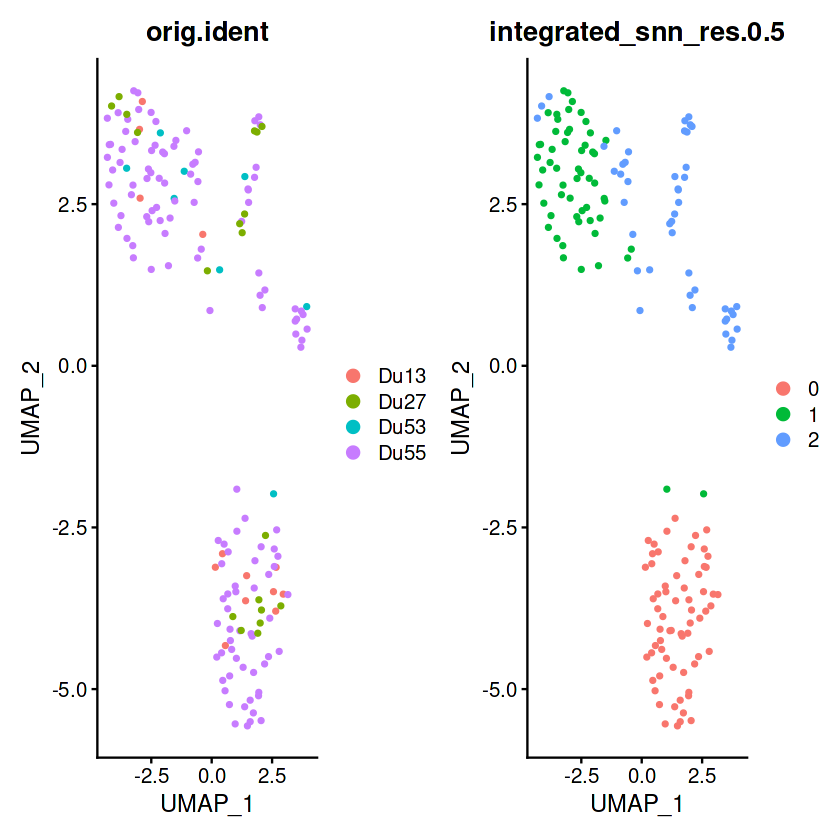

In [3]:
DimPlot(myeloid, group.by = c("orig.ident"
                             , 'integrated_snn_res.0.5'))

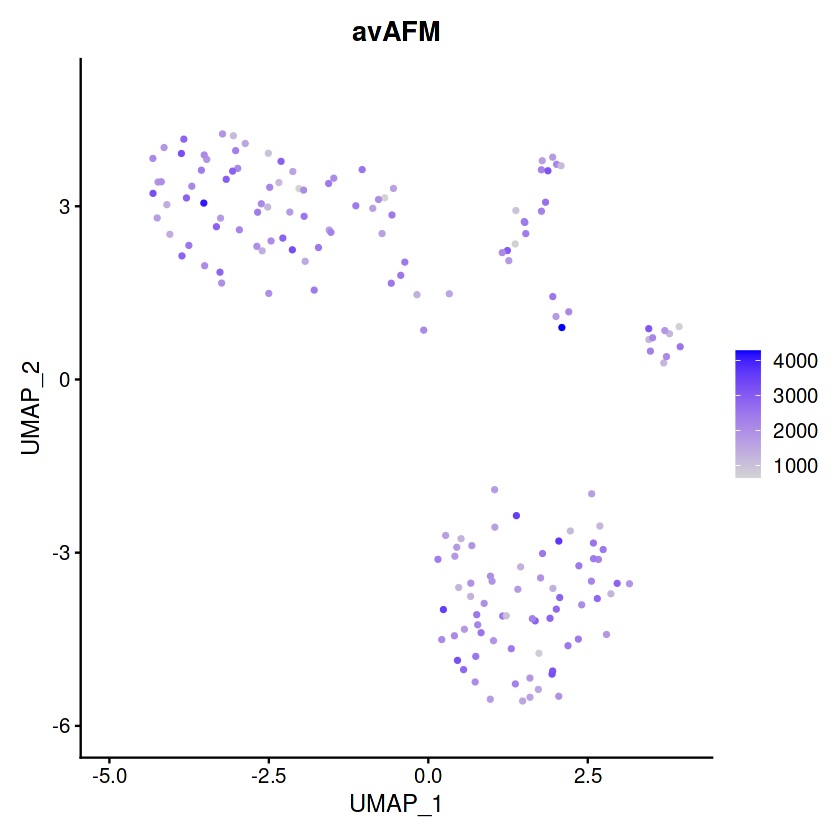

In [4]:
FeaturePlot(myeloid, c("avAFM"))

In [5]:
myeloid@meta.data$avAFM

[1] 1538.1818 2227.5731 1781.4306 2215.2709 2845.8919 2743.3283 2197.3133
  [8] 1781.4306 2143.0997 2346.8799 2436.0113 1323.8414 1792.5700 1713.8864
 [15] 1546.7882  969.3345 1641.8479 1594.5797 4097.2520  713.5150 2393.8900
 [22] 2383.5133 3550.7150 1881.1800 2496.1864 2073.2949 1644.1420 2407.9212
 [29] 1209.6015 1209.6015 4281.3267 2519.0481 2102.1508 1766.7642 3684.9033
 [36] 1209.6015 2458.3063 1676.4636 1759.4000 3550.7150 2101.8267 2148.7916
 [43] 2435.1351 1835.3457 1745.8646 2115.9868 1726.6333 2352.6672 2465.4507
 [50] 3301.4750 1989.1830 2826.6863 2917.2250 2115.9868 2277.0388 2093.8085
 [57] 2093.8085 1272.6356 1278.5400 2443.0141 1222.1429 3242.9450 2458.3063
 [64] 1671.2966 3242.9450 1942.1658 2253.7667 2380.3397 2458.3063 2465.5138
 [71] 1752.9093 1942.1658 2511.9787 2178.8698 2014.5928 2267.4552 1895.5180
 [78] 1541.7012 2277.0388 1872.4673 2159.3680 1365.3776 1954.5480 2413.7913
 [85] 2389.9734 2516.3715 1857.1296 2313.6614 2407.9212 1989.1830 3188.4517
 [92] 1835.3457 2465.5138  779.7013 2519.0481 2989.6186 1546.6589 3087.9767
 [99] 1577.4426 2776.4750 1724.0746 1244.6667 2115.9868 2462.7163 2040.7711
[106] 2471.4698 2422.5250 2043.4647 1497.1197 2595.3010 2892.6047 1995.7100
[113] 2892.6047 2040.7711 2254.0315 3244.5250 2475.7091 3244.5250 2869.6836
[120] 2469.5233 2869.6836 1630.8507 1413.2999 1890.6912  647.7900 1222.1429
[127] 2383.5133 1131.7396 2422.5250 1413.2999 2977.8933 1752.9093  647.7900
[134] 2161.4734 2006.8253 2901.1575 2011.9533 1649.0043 1852.3938 1890.6912
[141]  991.2980 1895.5180 2475.7091 2045.2783 2006.8253 1131.7396 2148.7916
[148] 1704.2309 1640.3694 1366.1274 2839.1384 2839.1384 2839.1384 1127.6900
[155] 1332.2900  696.3810 1127.6900 2752.2050 2253.3642 1250.4256 1774.3361
[162] 2109.0617 2864.7660 1848.2867 3142.6900 1035.5460 2064.5149 1986.2500

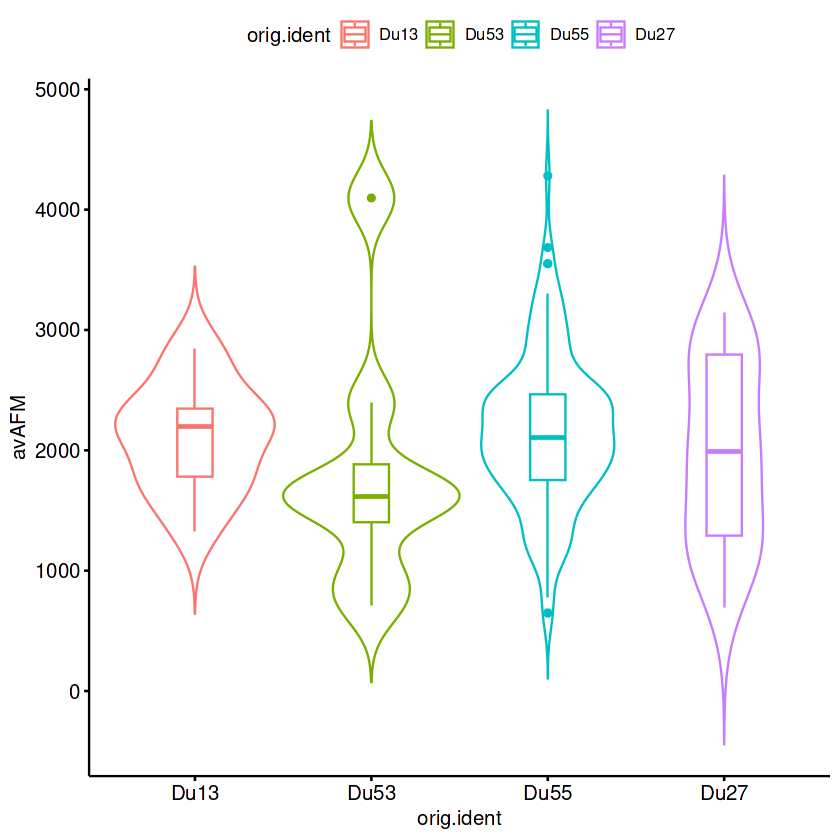

In [6]:
ggviolin(myeloid@meta.data, x = "orig.ident", y = "avAFM",
         add = "boxplot", add.params = list(fill = "white"),
         color = "orig.ident")

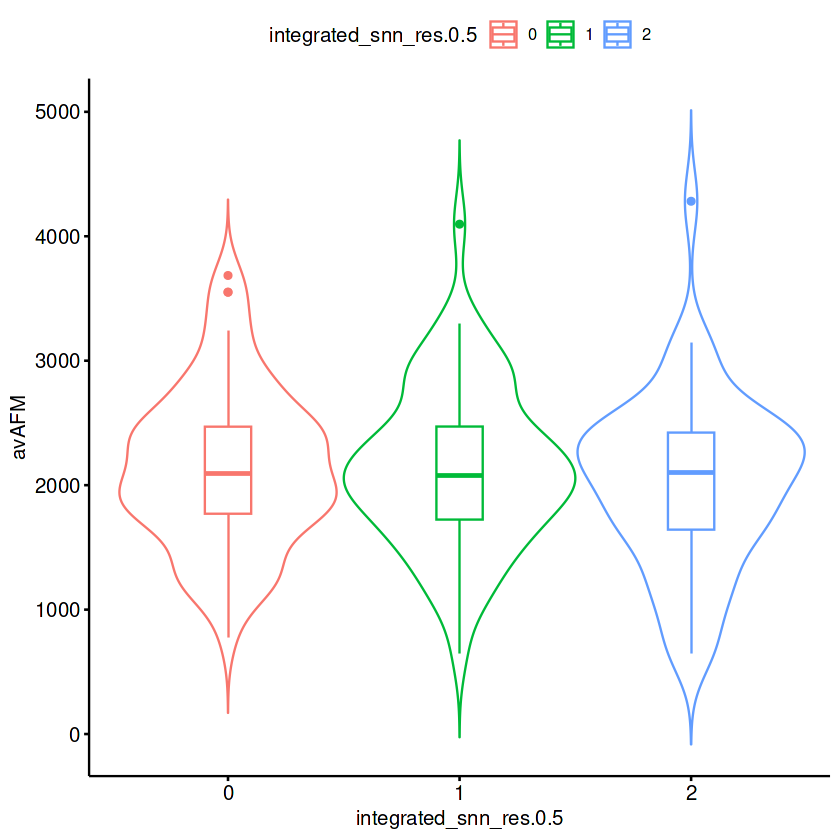

In [7]:
ggviolin(myeloid@meta.data, x = "integrated_snn_res.0.5", y = "avAFM",
         add = "boxplot", add.params = list(fill = "white"),
         color = "integrated_snn_res.0.5")

In [8]:
mye_sigs = read.csv("myeloid.signature.csv")
DefaultAssay(myeloid) <- "RNA"

for(i in 1:ncol(mye_sigs)) {      
    sigs = list(mye_sigs[[i]])

    sigs2 = sigs[[1]]
    sigs = sigs2[!is.na(sigs2)]
    print(colnames(mye_sigs[i])[1])

    myeloid <- AddModuleScore(myeloid,
                      features = list(sigs),
                      name=colnames(mye_sigs[i])[1])
}

[1] "cDC1"


Warning message:
“The following features are not present in the object: WFDC21P, SIGLEC17P, , not searching for symbol synonyms”


[1] "DC2"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Cycling.Myleoid"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "DC3"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Developing.granulocytes.neutrophils"


Warning message:
“The following features are not present in the object: DEFA1, , not searching for symbol synonyms”


[1] "Macrophage.1"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Macrophage.2"


Warning message:
“The following features are not present in the object: CD115, CD206, CD301, DECTIN1, PDL2, FIZZ1, , not searching for symbol synonyms”


[1] "Mast.cells"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Microglia"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Monocytes.MDM"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Langerhans.like.cells"


Warning message:
“The following features are not present in the object: HLA-DQB3, HLA-DRB6, HLA-DRB9, , not searching for symbol synonyms”


[1] "Myeloid.derived.suppressor.cells"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Dendritic.cells"


Warning message:
“The following features are not present in the object: C1ORF54, not searching for symbol synonyms”


[1] "Migratory.DC"


Warning message:
“The following features are not present in the object: SDAD1P1, FCGR2C, , not searching for symbol synonyms”


[1] "Transitional.DC"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "DC.precursor"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Granulocytes"


Warning message:
“The following features are not present in the object: SIGLEC17P, PAGE5, , not searching for symbol synonyms”


[1] "Neutrophils"


Warning message:
“The following features are not present in the object: AC031733.2, , not searching for symbol synonyms”


[1] "Neutrophil.myeloid.progenitor"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Intermediate.macrophages"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


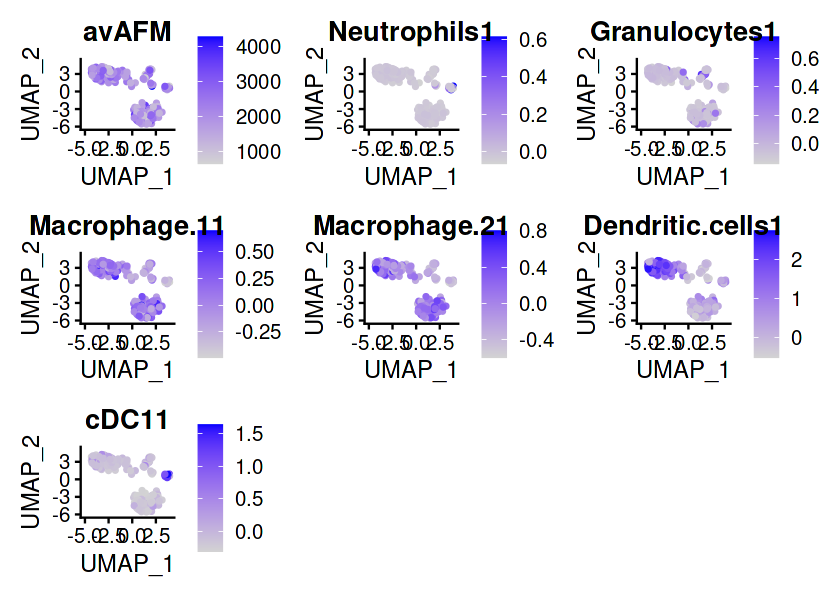

In [24]:
FeaturePlot(myeloid, c("avAFM",
                      'Neutrophils1',
                       'Granulocytes1',
                       'Macrophage.11','Macrophage.21',
                      'Dendritic.cells1','cDC11'
                      ))

In [25]:
myeloid_genes <- subset(read.csv("../NCBI_gene_result.xlsx - Cells.csv"), Cell == 'Myeloid')

In [26]:
myeloid_genes$Gene.ID

[1] "TRPV4"      "PIEZO1"     "IL1beta"    "iNOS"       "Arg1"      
 [6] "TNFbeta"    "NOS2"       "TNF-alpha"  "Arg1"       "IL10"      
[11] "CCL2"       "CCL7"       "IL6"        "IL8"        "TSG6"      
[16] "CSF1"       "CSF2"       "SCF"        "CXCL12"     "TAZ, Wwtr1"

In [27]:
myeloid@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mt 
Du13_CGAGCCAAGGCAGTCA-1 Du13        2750      1529          3.2727273 
Du13_ACTGATGTCGACCAGC-1 Du13        1816      1195          3.5792952 
Du13_AACTCTTTCAGTCCCT-1 Du13        1450       994          7.2413793 
Du13_CCTACACAGAGGTTGC-1 Du13        1268       998          0.4731861 
Du13_ACGATGTTCGCTGATA-1 Du13        1164       795          2.0618557 
Du13_CAGCTAAGTCTCTTTA-1 Du13        1120       791          1.6964286 
Du13_AAGGCAGTCACATGCA-1 Du13        1094       728         10.7861060 
Du13_TCGCGAGAGCCATCGC-1 Du13        1042       795          0.6717850 
Du13_ATGAGGGCACTAGTAC-1 Du13        1025       650         14.3414634 
Du13_ACATCAGAGGACAGCT-1 Du13        1002       749          0.5988024 
Du13_TGCACCTTCCATGAGT-1 Du13         953       649          7.9748164 
Du13_GGAAAGCGTGAGTGAC-1 Du13         822       612          2.1897810 
Du13_CCTAGCTCAGTGAGTG-1 Du13         810       619          0.6172840 
Du53_GCGGGTTGTAGTACCT-1 Du53       14183      4924          2.2703236 
Du53_GTATCTTTCGGTCCGA-1 Du53        4113      2150          0.3160710 
Du53_CGATTGACACGGTAAG-1 Du53        2825      1600          0.8495575 
Du53_CCTCAGTGTCGCGAAA-1 Du53        1131       839          5.8355438 
Du53_ATAGACCCAGTAGAGC-1 Du53        1072       628          5.1305970 
Du53_AGCGTCGCAGACAAAT-1 Du53         973       586          8.1192189 
Du53_ACACCGGTCAACGCTA-1 Du53         856       654          0.4672897 
Du53_GCTTCCAGTCCTCCAT-1 Du53         829       464          9.1676719 
Du55_GGGATGAGTAGGGTAC-1 Du55       38080      7386          4.5877101 
Du55_TTCGGTCCAAGACACG-1 Du55       25652      5867          2.3117106 
Du55_GCTGGGTTCTGTTTGT-1 Du55       22179      5252          0.5049822 
Du55_TTAGGCAGTCTACCTC-1 Du55       21673      6375          1.7164214 
Du55_ATGGGAGCAGGAACGT-1 Du55       17064      4633          1.9338959 
Du55_CACATTTAGTACGCGA-1 Du55       16551      4780          2.2053048 
Du55_CACCTTGGTGTGCCTG-1 Du55       16322      4811          3.6392599 
Du55_GGTATTGCACCAACCG-1 Du55       15508      4019          1.7474852 
Du55_GATCAGTAGGTGTGGT-1 Du55       15371      3730          1.2230824 
⋮                       ⋮          ⋮          ⋮            ⋮          
Du55_TTAGGACAGTCGAGTG-1 Du55        937        442          5.44290288
Du55_GAACCTAGTCTAGGTT-1 Du55        820        294         14.39024390
Du55_GGTGAAGCATGCCTAA-1 Du55        969        550         11.14551084
Du55_GTATCTTCATAGACTC-1 Du55       1073        755          0.65237651
Du55_GATCTAGGTCTTCGTC-1 Du55        836        432         14.47368421
Du55_CTGATCCCATGCCCGA-1 Du55       1109        755          0.00000000
Du55_GTACTCCGTTGGAGGT-1 Du55        869        480          4.37284235
Du55_TGACTTTAGTGCGATG-1 Du55        818        334          8.80195599
Du55_CCTATTAGTATATCCG-1 Du55       1043        749          0.09587728
Du55_GATCTAGTCAGAGGTG-1 Du55        870        358          3.90804598
Du55_ATTGGACTCACTCTTA-1 Du55        891        595          3.03030303
Du27_CAGCAGCTCGGAGGTA-1 Du27       7385       2640          2.35612729
Du27_CTCGAAATCAAACGGG-1 Du27       4890       2397          2.04498978
Du27_AGATCTGCATACTACG-1 Du27       4205       2224          3.04399524
Du27_GGCTGGTAGGTACTCT-1 Du27       3518       1877          1.13700966
Du27_ACATCAGGTTTCCACC-1 Du27       2962       1861          0.87778528
Du27_CAAGTTGAGTACTTGC-1 Du27       2698       1599          2.26093403
Du27_AGCGGTCTCGAGGTAG-1 Du27       2487       1549          0.40209087
Du27_TTAGGACCAGTAACGG-1 Du27       2066       1227          1.98451113
Du27_AGACGTTCACCGAATT-1 Du27       1558       1123          0.77021823
Du27_AGAGTGGTCGTCACGG-1 Du27       1405        977          0.00000000
Du27_TAAACCGAGTAGCCGA-1 Du27       1315        863          7.68060837
Du27_AGGGATGTCTTGTATC-1 Du27       1324       1016          2.41691843
Du27_TTCGAAGTCATATCGG-1 Du27        938        439         10.23454158
Du27_TTGCCGTAGTATCTCG-1 Du27        856        2

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

  No

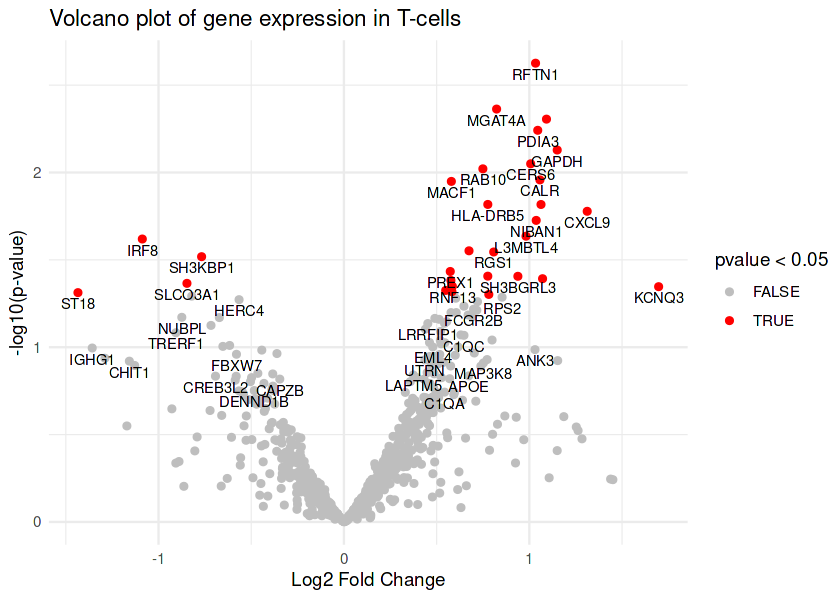

In [28]:
# Extract avAFM data and convert it into a vector
DefaultAssay(myeloid) <- "RNA"
lcv_data <- as.vector(unlist(myeloid@meta.data$avAFM))

# Calculate quartiles and create a factor variable 't_cell_half' to split the data into two groups
quartile_breaks <- quantile(lcv_data, probs = c(0, 0.50, 1), na.rm = TRUE)


myeloid@meta.data$m_cell_half <- cut(lcv_data, 
                                     breaks = quartile_breaks, 
                                     include.lowest = TRUE,
                                     labels = c("Low AFM", "High AFM"))

# Prepare a DESeqDataSet (you need to adjust this part according to your actual count data and experimental setup)
dds <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts, # countData should be your actual counts
                              colData = myeloid@meta.data,
                              design = ~m_cell_half)

keep <- rowSums(counts(dds) >= 10) >= 3
dds <- dds[keep,]

dds <- estimateSizeFactors(dds, type='poscounts')

# Estimate size factors without adding 1 to counts
dds <- DESeq(dds)
# Get results including log fold change and p-values
results_data <- as.data.frame(results(dds))

# Extract significant results and prepare for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)


volcano_plot <- ggplot(results_data, aes(x=log2FoldChange, y=logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.20), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano plot of gene expression in T-cells", x = "Log2 Fold Change", y = "-log10(p-value)")

# Print the plot
print(volcano_plot)


GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_half_inde")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_half_inde_neg")




converting counts to integer mode

factor levels were dropped which had no samples

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local'

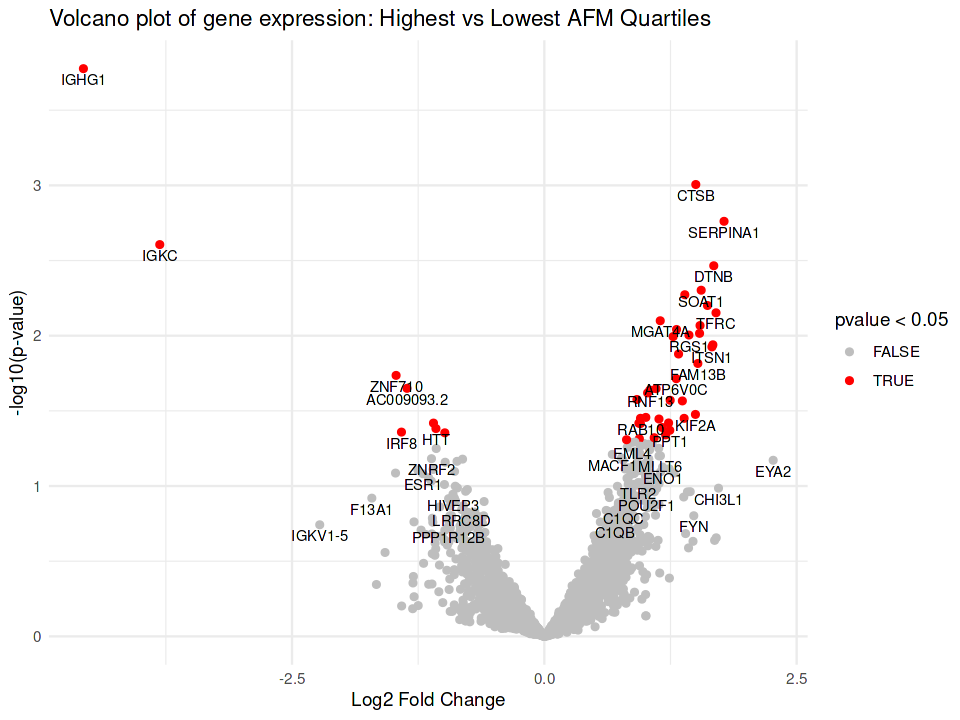

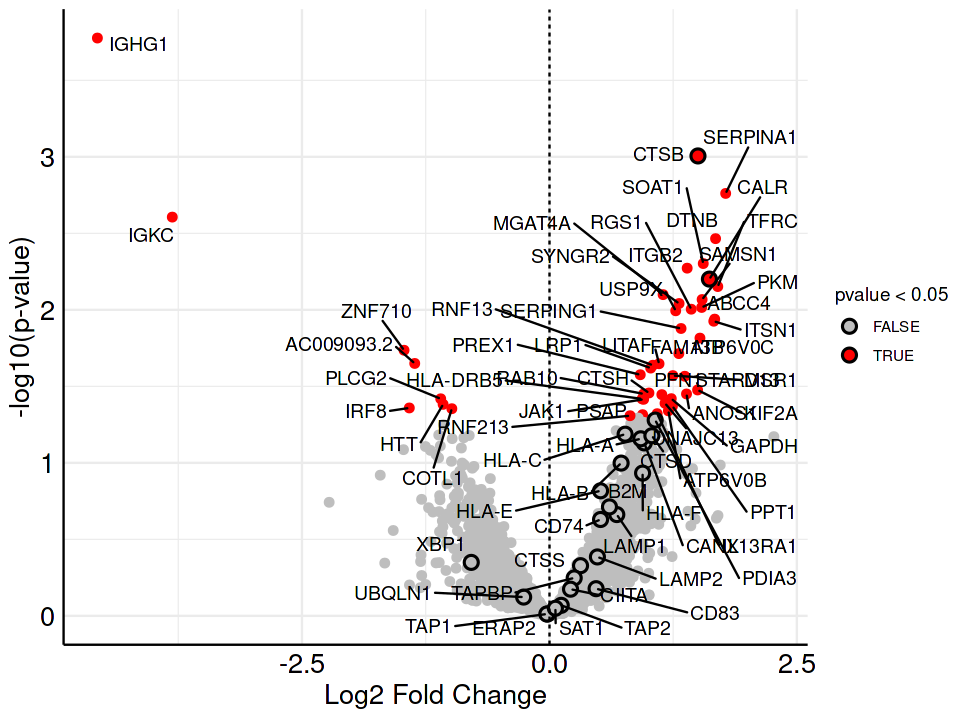

In [49]:
# Extract avAFM data and convert it into a vector
DefaultAssay(myeloid) <- "RNA"
lcv_data <- as.vector(unlist(myeloid@meta.data$avAFM))

# Calculate quartiles and create a factor variable 'm_cell_quartile' to split the data into four quartiles
quartile_breaks <- quantile(lcv_data, probs = c(0, 0.25, 0.75, 1), na.rm = TRUE)

# Assign "Lowest AFM" for the bottom quartile and "Highest AFM" for the top quartile
myeloid@meta.data$m_cell_quartile <- cut(lcv_data, 
                                         breaks = quartile_breaks, 
                                         include.lowest = TRUE,
                                         labels = c("Lowest AFM", "Middle", "Highest AFM"))

# Filter to only include "Lowest AFM" and "Highest AFM" for differential analysis
filtered_data <- subset(myeloid, subset = m_cell_quartile %in% c("Lowest AFM", "Highest AFM"))

# Prepare a DESeqDataSet using only the filtered data for the comparison
dds <- DESeqDataSetFromMatrix(countData = filtered_data@assays$RNA@counts, 
                              colData = filtered_data@meta.data,
                              design = ~m_cell_quartile)

# Filtering and size factor estimation
keep <- rowSums(counts(dds) >= 3) >= 3
dds <- dds[keep,]

dds <- estimateSizeFactors(dds, type='poscounts')

# Run DESeq on the dataset
dds <- DESeq(dds)

# Get differential expression results and convert to data frame
results_data <- as.data.frame(results(dds))

# Prepare for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)

# Create volcano plot
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.20), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano plot of gene expression: Highest vs Lowest AFM Quartiles", x = "Log2 Fold Change", y = "-log10(p-value)")

# Print the plot
print(volcano_plot)


GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_inde")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_inde_neg")


# Load ggrepel for better label positioning
library(ggrepel)

# List of genes to always highlight and label
#highlight_genes <- c("AGR2", "AHR", "SERPINA1", "XBP1", "C3", "PDIA3", "HLA-C", "HLA-B", "CD74", "CALR", "HLA-A", "CANX", "B2M")

# Adjust width and height for plot display
options(repr.plot.width = 8, repr.plot.height = 6)

# Generate volcano plot with specific genes highlighted and outlined
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    # Default points with conditional color based on p-value
    geom_point(aes(color = pvalue < 0.05), size = 2) +
    scale_color_manual(values = c("grey", "red")) +
    # Add black outline around highlighted genes without changing color
    geom_point(data = subset(results_data, gene %in% highlight_genes), 
               shape = 21, color = "black", size = 3, stroke = 1, aes(fill = pvalue < 0.05)) +
    scale_fill_manual(values = c("FALSE" = "grey", "TRUE" = "red")) +
    # Label highlighted genes and significant points
    geom_text_repel(data = subset(results_data, gene %in% highlight_genes | pvalue < 0.05), 
                    aes(label = gene), size = 4, box.padding = 0.4, max.overlaps = Inf) +
    # Add vertical line at x = 0
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),   # increased font size for axis labels
        axis.line = element_line(color = "black")               # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)


In [50]:
genes_r

[1] "IGKC"       "HTT"        "IGHG1"      "ZNF710"     "AC009093.2"
[6] "PLCG2"      "COTL1"      "IRF8"

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x

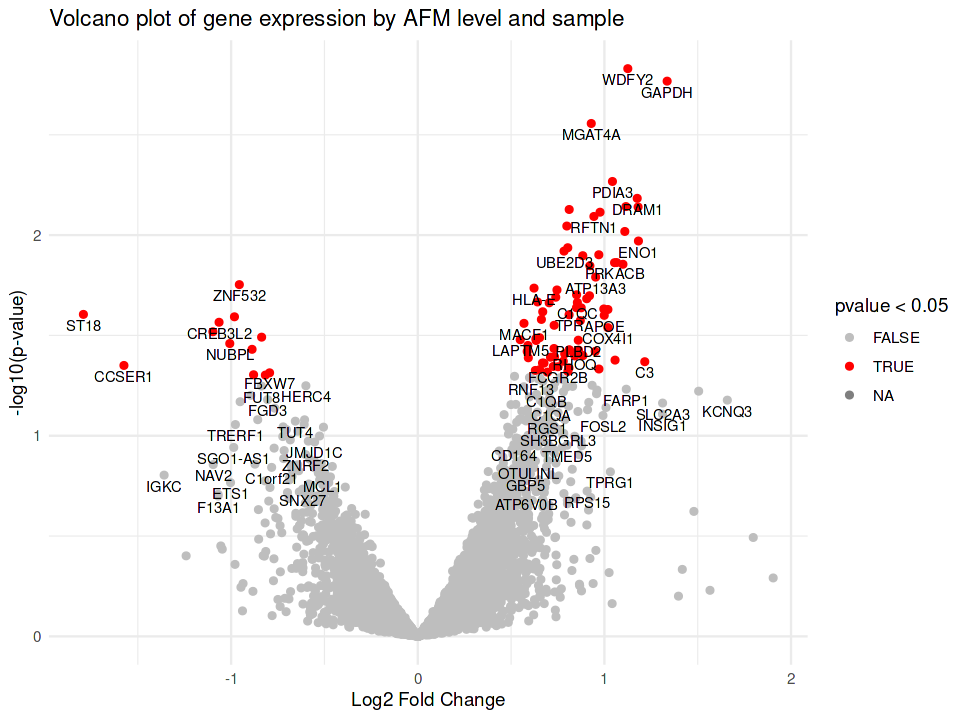

In [51]:
# Set Default Assay
DefaultAssay(myeloid) <- "RNA"

# Extract avAFM data and convert it into a vector
lcv_data <- as.vector(unlist(myeloid@meta.data$avAFM))

# Calculate quartiles and create a factor variable 'm_cell_half' for each sample separately
quartile_breaks <- myeloid@meta.data %>%
    group_by(orig.ident) %>%
    mutate(m_cell_half = cut(avAFM,
                             breaks = quantile(avAFM, probs = c(0, 0.50, 1), na.rm = TRUE),
                             include.lowest = TRUE,
                             labels = c("Low AFM", "High AFM")))

# Add the quartile-based grouping back to metadata
myeloid@meta.data$m_cell_half <- unlist(quartile_breaks$m_cell_half)

# Prepare DESeqDataSet with the design including both orig.ident and m_cell_half
dds <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = myeloid@meta.data,
                              design = ~ orig.ident + m_cell_half)

# Filter out low counts
keep <- rowSums(counts(dds) >= 3) >=3
dds <- dds[keep,]

# Estimate size factors and run DESeq
dds <- estimateSizeFactors(dds, type='poscounts')
dds <- DESeq(dds)

# Get results including log fold change and p-values
results_data <- as.data.frame(results(dds, contrast = c("m_cell_half", "High AFM", "Low AFM")))

# Prepare data for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)

# Generate volcano plot
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.20), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano plot of gene expression by AFM level and sample", x = "Log2 Fold Change", y = "-log10(p-value)")

# Print the plot
print(volcano_plot)



GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene

myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_half_samp")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_half_samp_neg")



converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain ch

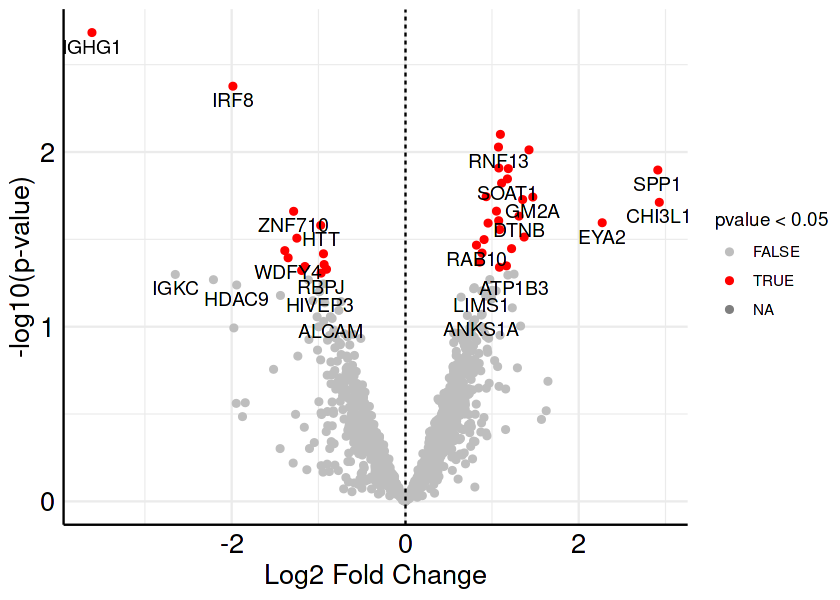

In [64]:
# Set Default Assay
DefaultAssay(myeloid) <- "RNA"

# Extract avAFM data and convert it into a vector
lcv_data <- as.vector(unlist(myeloid@meta.data$avAFM))

# Calculate quartiles and create a factor variable 'm_cell_quartile' for each sample separately
quartile_breaks <- myeloid@meta.data %>%
    group_by(orig.ident) %>%
    mutate(m_cell_quartile = cut(avAFM,
                                 breaks = quantile(avAFM, probs = c(0, 0.25, 0.50, 0.75, 1), na.rm = TRUE),
                                 include.lowest = TRUE,
                                 labels = c("Q1 (Low AFM)", "Q2", "Q3", "Q4 (High AFM)")))

# Add the quartile-based grouping back to metadata
myeloid@meta.data$m_cell_quartile <- unlist(quartile_breaks$m_cell_quartile)

# Prepare DESeqDataSet with the design including both orig.ident and m_cell_quartile
dds <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = myeloid@meta.data,
                              design = ~ orig.ident + m_cell_quartile)

dds_unfilt <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = myeloid@meta.data,
                              design = ~ orig.ident + m_cell_quartile)

# Filter out low counts
#keep <- rowSums(counts(dds) >= 5) >= 5, -0.19147503, 0.07304503
param_1 = 5
param_2 = 5


keep <- rowSums(counts(dds_unfilt) >= param_1) >= param_2
dds <- dds_unfilt[keep,]


# Filter out low counts
# keep <- rowSums(counts(dds) >= 9) >= 4, p.valie <0.05
keep <- rowSums(counts(dds) >= 5) >= 5

dds <- dds[keep,]

# Estimate size factors and run DESeq
dds <- estimateSizeFactors(dds, type='poscounts')
dds <- DESeq(dds)

# Get results for a specific quartile comparison, for example, Q4 (High AFM) vs Q1 (Low AFM)
results_data <- as.data.frame(results(dds, contrast = c("m_cell_quartile", "Q4 (High AFM)", "Q1 (Low AFM)")))

# Prepare data for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)


options(repr.plot.width = 7, repr.plot.height = 5)  # Adjust width and height as needed

# Generate volcano plot
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.10), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 4, check_overlap = TRUE) + # increased text size
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") + # vertical line at x = 0
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),    # increased font size for axis labels
        axis.line = element_line(color = "black")                # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)




Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


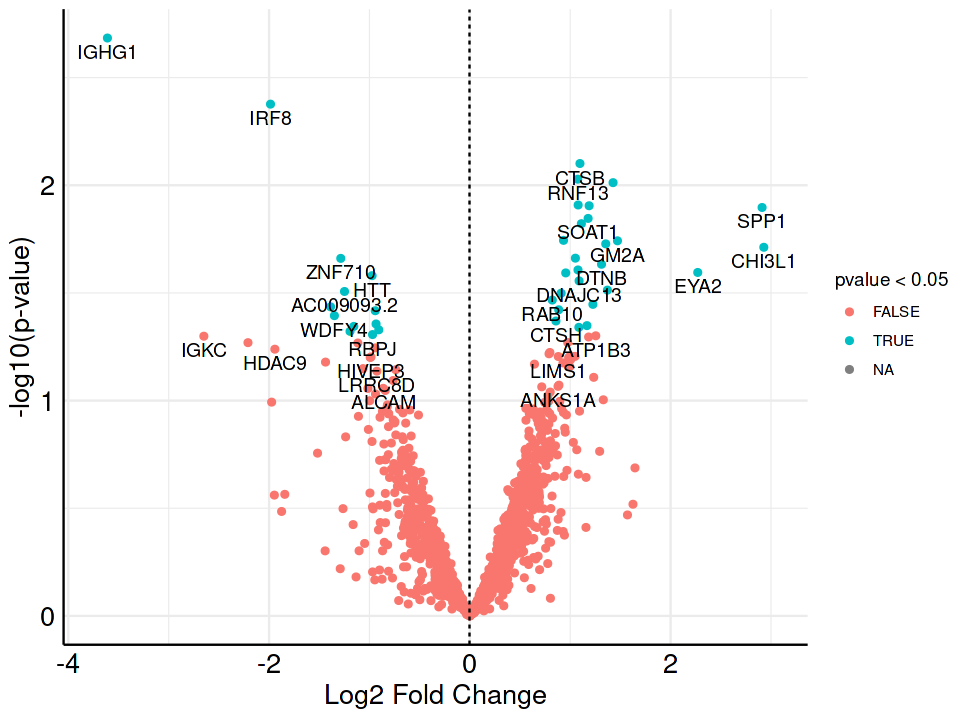

In [53]:
options(repr.plot.width = 8, repr.plot.height = 6)  # Adjust width and height as needed

# Generate volcano plot with added padding
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    geom_text(data = subset(results_data, pvalue < 0.10), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 4, check_overlap = TRUE) + # increased text size
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") + # vertical line at x = 0
    coord_cartesian(xlim = c(min(results_data$log2FoldChange) - 0.1, max(results_data$log2FoldChange) + 0.1), 
                    ylim = c(min(results_data$logp) - 0.1, max(results_data$logp) + 0.1)) + # add padding
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),    # increased font size for axis labels
        axis.line = element_line(color = "black")                # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)

In [54]:
genes_f

[1] "ENO1"     "C1QC"     "LAPTM5"   "SDC3"     "MACF1"    "PRKACB"  
 [7] "FCGR2B"   "SOAT1"    "NIBAN1"   "TPR"      "RAB10"    "RHOQ"    
[13] "MGAT4A"   "LIMS1"    "MGAT5"    "SRGAP3"   "RFTN1"    "GNAI2"   
[19] "DNAJC13"  "ATP13A3"  "RASGEF1B" "UBE2D3"   "TLR2"     "TNPO1"   
[25] "FCHO2"    "CANX"     "RNF130"   "HLA-A"    "HLA-E"    "HLA-C"   
[31] "HLA-DRA"  "HLA-DRB5" "HLA-DRB1" "HLA-DQB1" "HLA-DPA1" "FKBP5"   
[37] "RNASET2"  "CTSB"     "MSR1"     "PLEC"     "CTSL"     "REEP3"   
[43] "PSAP"     "CTSD"     "SERPING1" "GSTP1"    "CTSC"     "IL18"    
[49] "GAPDH"    "ARHGDIB"  "CD63"     "CPM"      "PPP1R12A" "DRAM1"   
[55] "PLBD2"    "WDFY2"    "NFKBIA"   "LGALS3"   "PCNX1"    "SERPINA1"
[61] "PDIA3"    "CTSH"     "RPS2"     "ATP6V0C"  "COX4I1"   "PFN1"    
[67] "ADAP2"    "MLLT6"    "C3"       "MYO1F"    "CALR"     "APOE"    
[73] "SIRPA"    "PREX1"    "ANOS1"    "USP9X"

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


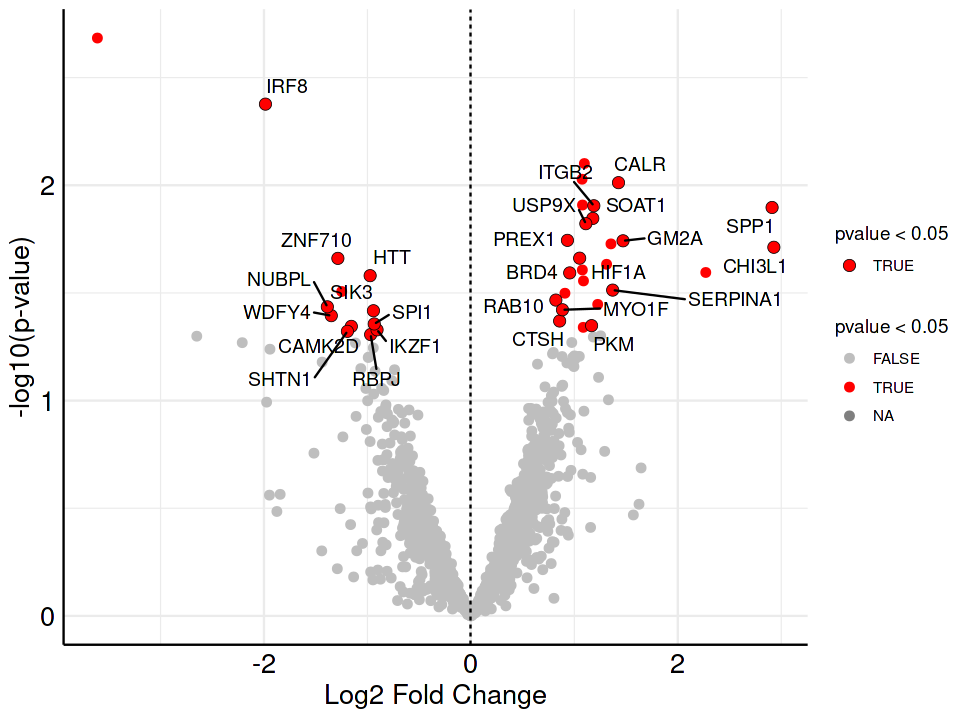

In [132]:
# Load ggrepel for better label positioning
library(ggrepel)

# List of genes to always highlight and label




highlight_genes <- c("AGR2", "AHR", 
                     "TSPAN13", "GPI","SPINT2", "H3F3A","PERP", "PITPNC1", "RICTOR", "LAMC1", "GDI2",
                     "SERPINA1", "XBP1", "C3", "PDIA3", "HLA-C", "HLA-B", "CD74", "CALR", "HLA-A", "CANX", "B2M")

highlight_genes <- c("SOAT1", "CHI3L1", "RAB10", "SPP1", "GM2A", 
                    "HIF1A", "SERPINA1", "PKM", "CTSH", 
                     "MYO1F", "CALR", "BRD4", 
                    "PREX1", "ITGB2", "USP9X", 
                    "HTT", "RBPJ", "CAMK2D", "IKZF1", "WDFY4", 
                    "SHTN1", "SPI1", "SIK3", "NUBPL", 
                    "ZNF710", "IRF8"
                    
                    )


# Adjust width and height for plot display
options(repr.plot.width = 8, repr.plot.height = 6)

# Generate volcano plot with specific genes highlighted and outlined
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    # Default points with conditional color based on p-value
    geom_point(aes(color = pvalue < 0.05), size = 2) +
    scale_color_manual(values = c("grey", "red")) +
    # Add black outline around highlighted genes without changing color
    geom_point(data = subset(results_data, gene %in% highlight_genes), 
               shape = 21, color = "black", size = 3, stroke = 0.25, aes(fill = pvalue < 0.05)) +
    scale_fill_manual(values = c("FALSE" = "grey", "TRUE" = "red")) +
    # Label highlighted genes and significant points
    geom_text_repel(data = subset(results_data, gene %in% highlight_genes), 
                    aes(label = gene), size = 4, box.padding = 0.4, max.overlaps = Inf) +
    # Add vertical line at x = 0
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),   # increased font size for axis labels
        axis.line = element_line(color = "black")               # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)

GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene


GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene


In [133]:
genes_f

[1] "SOAT1"    "CHI3L1"   "DTNB"     "RAB10"    "MGAT4A"   "RFTN1"   
 [7] "DNAJC13"  "RNF13"    "SPP1"     "GM2A"     "CTSB"     "GAPDH"   
[13] "HIF1A"    "SERPINA1" "PKM"      "CTSH"     "ATP6V0C"  "LITAF"   
[19] "MYO1F"    "CALR"     "BRD4"     "EYA2"     "PREX1"    "SAMSN1"  
[25] "ITGB2"    "USP9X"

In [134]:
genes_r

[1] "HTT"        "RBPJ"       "CAMK2D"     "IKZF1"      "WDFY4"     
 [6] "SHTN1"      "SPI1"       "SIK3"       "NUBPL"      "IGHG1"     
[11] "ZNF710"     "AC009093.2" "IRF8"

In [135]:
# Save the volcano plot to a PDF file
pdf_file <- "volcano_plot.pdf"

# Adjust dimensions (in inches) as per your needs
ggsave(filename = pdf_file, 
       plot = volcano_plot, 
       device = "pdf", 
       width = 8, 
       height = 6)

# Confirm save location
cat("Volcano plot saved to", pdf_file, "\n")


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


Volcano plot saved to volcano_plot.pdf 


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


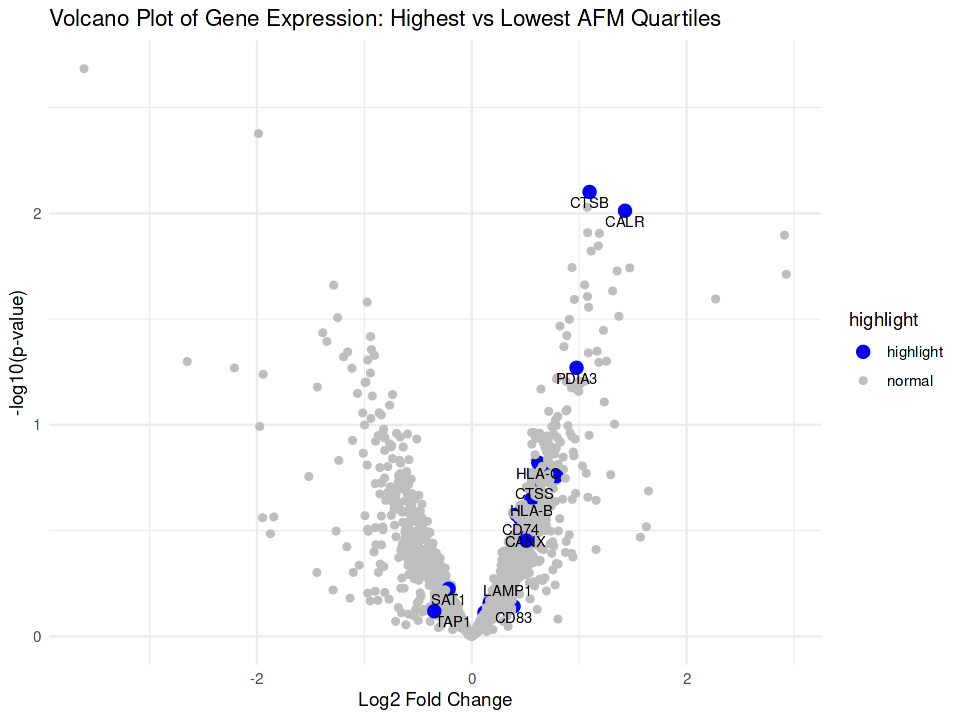

In [80]:
# Assuming you have a dataframe `expr_data` containing gene expression data
# and a column in your metadata for the grouping (e.g., "m_cell_quartile")
# Genes related to antigen presentation
antigen_presentation_genes <- c("HLA-A", "HLA-B", "HLA-C", "TAP1", "TAP2", "CIITA", "PSMB8", "PSMB9", "CD74", 
                                "HLA-E", "HLA-G", "HLA-F", "CD1A", "CD1B", "CD1C", "CD1D", "CD1E",
                                "LAMP1", "LAMP2", "CTSS", "CTSB", "CTSD", "CD40", "CD83", "CD209")

# Extended list of genes related to MHC Class I (MHCI) pathway
mhcI_genes <- c("HLA-A", "HLA-B", "HLA-C", "B2M", "TAP1", "TAP2", "TAPBP", "PSMB8", "PSMB9", 
                "ERAP1", "ERAP2", "LMP2", "LMP7", "HLA-E", "HLA-F", "HLA-G", 
                "SEC61A1", "CALR", "CANX", "PDIA3", "UBQLN1", "UBQLN2", "XBP1", "SAT1")



# List of specific genes to highlight
highlight_genes <- c(antigen_presentation_genes,mhcI_genes) # replace or add more genes as needed

# Flag genes in the results data to identify those for highlighting
results_data$highlight <- ifelse(results_data$gene %in% highlight_genes, "highlight", "normal")

# Create updated volcano plot with labeled and highlighted genes
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = -log10(pvalue))) +
    geom_point(aes(color = highlight, size = highlight)) +
    scale_color_manual(values = c("normal" = "grey", "highlight" = "blue")) + # "blue" for highlighted genes
    scale_size_manual(values = c("normal" = 1.5, "highlight" = 3)) + # Increase size for highlighted genes
    geom_text(data = subset(results_data, highlight == "highlight"), 
              aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano Plot of Gene Expression: Highest vs Lowest AFM Quartiles", 
         x = "Log2 Fold Change", 
         y = "-log10(p-value)")

# Print the updated plot
print(volcano_plot)



In [93]:
GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.10)
genes_f <- GOI$gene


GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.10)
genes_r <- GOI$gene


genes <- genes_f

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go
#print(mut_enr$Term)

mut_enr_total <- mut_enr
mut_enr_filt <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore > 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1


Sys.sleep(3)

genes <- genes_r

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go

mut_enr_total_neg <- mut_enr
mut_enr_filt <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore > 1)
#print(mut_enr_total_neg$Term)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]



                              

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [94]:
mut_enr_total$Term

[1] "Positive Regulation Of Epithelial Cell Migration (GO:0010634)"                                                                       
  [2] "Regulation Of Epithelial Cell Migration (GO:0010632)"                                                                                
  [3] "Positive Regulation Of Angiogenesis (GO:0045766)"                                                                                    
  [4] "Peptide Antigen Assembly With MHC Protein Complex (GO:0002501)"                                                                      
  [5] "Negative Regulation Of Peptidase Activity (GO:0010466)"                                                                              
  [6] "Positive Regulation Of Intracellular Signal Transduction (GO:1902533)"                                                               
  [7] "Plasma Membrane Invagination (GO:0099024)"                                                                                           
  [8] "Phagocytosis, Engulfment (GO:0006911)"                                                                                               
  [9] "Positive Regulation Of Vasculature Development (GO:1904018)"                                                                         
 [10] "Protein Stabilization (GO:0050821)"                                                                                                  
 [11] "Positive Regulation Of NIK/NF-kappaB Signaling (GO:1901224)"                                                                         
 [12] "Cellular Response To Thyroid Hormone Stimulus (GO:0097067)"                                                                          
 [13] "Response To Thyroid Hormone (GO:0097066)"                                                                                            
 [14] "Positive Regulation Of Signal Transduction (GO:0009967)"                                                                             
 [15] "Negative Regulation Of Endopeptidase Activity (GO:0010951)"                                                                          
 [16] "Regulation Of Endopeptidase Activity (GO:0052548)"                                                                                   
 [17] "Phagocytosis (GO:0006909)"                                                                                                           
 [18] "Antigen Processing And Presentation Of Peptide Antigen Via MHC Class I (GO:0002474)"                                                 
 [19] "Proteolysis Involved In Protein Catabolic Process (GO:0051603)"                                                                      
 [20] "Positive Regulation Of Cytokine Production (GO:0001819)"                                                                             
 [21] "Regulation Of NIK/NF-kappaB Signaling (GO:1901222)"                                                                                  
 [22] "Positive Regulation Of Endothelial Cell Migration (GO:0010595)"                                                                      
 [23] "Protein Localization To Membrane (GO:0072657)"                                                                                       
 [24] "Regulation Of Angiogenesis (GO:0045765)"                                                                                             
 [25] "Regulation Of Peptidase Activity (GO:0052547)"                                                                                       
 [26] "Glycolytic Process (GO:0006096)"                                                                                                     
 [27] "Membrane Protein Proteolysis (GO:0033619)"                                                                                           
 [28] "Receptor-Mediated Endocytosis (GO:0006898)"                                                                                          
 [29] "Positive Regulation Of Substrate Adhesion-Depen

In [95]:
mut_enr_total_neg$Term

[1] "B Cell Receptor Signaling Pathway (GO:0050853)"                                                                                      
  [2] "Plasma Membrane Bounded Cell Projection Morphogenesis (GO:0120039)"                                                                  
  [3] "Neuron Projection Morphogenesis (GO:0048812)"                                                                                        
  [4] "Lymphocyte Differentiation (GO:0030098)"                                                                                             
  [5] "Negative Regulation Of Multicellular Organismal Process (GO:0051241)"                                                                
  [6] "Negative Regulation Of Nucleic Acid-Templated Transcription (GO:1903507)"                                                            
  [7] "Mononuclear Cell Differentiation (GO:1903131)"                                                                                       
  [8] "Negative Regulation Of NIK/NF-kappaB Signaling (GO:1901223)"                                                                         
  [9] "Regulation Of Calcium-Mediated Signaling (GO:0050848)"                                                                               
 [10] "Antigen Receptor-Mediated Signaling Pathway (GO:0050851)"                                                                            
 [11] "Regulation Of DNA-templated Transcription (GO:0006355)"                                                                              
 [12] "Regulation Of Transcription By RNA Polymerase II (GO:0006357)"                                                                       
 [13] "Regulation Of Cytokine Production (GO:0001817)"                                                                                      
 [14] "Negative Regulation Of Cold-Induced Thermogenesis (GO:0120163)"                                                                      
 [15] "Regulation Of Interleukin-2 Production (GO:0032663)"                                                                                 
 [16] "Retrograde Vesicle-Mediated Transport, Golgi To Endoplasmic Reticulum (GO:0006890)"                                                  
 [17] "Neuron Projection Development (GO:0031175)"                                                                                          
 [18] "Negative Regulation Of Metabolic Process (GO:0009892)"                                                                               
 [19] "Golgi Vesicle Transport (GO:0048193)"                                                                                                
 [20] "Negative Regulation Of DNA-templated Transcription (GO:0045892)"                                                                     
 [21] "Myeloid Cell Differentiation (GO:0030099)"                                                                                           
 [22] "Positive Regulation Of Phagocytosis (GO:0050766)"                                                                                    
 [23] "Positive Regulation Of Macroautophagy (GO:0016239)"                                                                                  
 [24] "B Cell Differentiation (GO:0030183)"                                                                                                 
 [25] "Cellular Response To Calcium Ion (GO:0071277)"                                                                                       
 [26] "Myeloid Leukocyte Differentiation (GO:0002573)"                                                                                      
 [27] "Positive Regulation Of Gene Expression (GO:0010628)"                                                                                 
 [28] "Epigenetic Regulation Of Gene Expression (GO:0040029)"                                                                               
 [29] "Regulation Of NIK/NF-kappaB Signaling (GO:19012

In [96]:
genes_f

[1] "SOAT1"    "CHI3L1"   "DTNB"     "RAB10"    "MGAT4A"   "LIMS1"   
 [7] "RFTN1"    "ULK4"     "CD86"     "DNAJC13"  "ATP1B3"   "RNF13"   
[13] "RSRC1"    "ATP13A3"  "ANTXR2"   "SPP1"     "GM2A"     "HLA-DRB5"
[19] "ANKS1A"   "SASH1"    "CTSB"     "MSR1"     "SERPING1" "GAPDH"   
[25] "RESF1"    "ANKRD10"  "HIF1A"    "SERPINA1" "PDIA3"    "PKM"     
[31] "PEAK1"    "CTSH"     "ATP6V0C"  "LITAF"    "PFN1"     "SPAG9"   
[37] "RNF213"   "MYO1F"    "CALR"     "BRD4"     "EYA2"     "PREX1"   
[43] "SAMSN1"   "ITSN1"    "ITGB2"    "MYH9"     "ANOS1"    "USP9X"

In [97]:
genes_r

[1] "HIVEP3"     "LRRC8D"     "IGKC"       "ALCAM"      "HTT"       
 [6] "RBPJ"       "CCSER1"     "CAMK2D"     "IL15"       "TRIO"      
[11] "TRERF1"     "HDAC9"      "ZNRF2"      "IKZF1"      "WDFY4"     
[16] "SHTN1"      "SPI1"       "FCHSD2"     "UVRAG"      "SIK3"      
[21] "NUBPL"      "IGHG1"      "ZNF710"     "SLCO3A1"    "AC009093.2"
[26] "PLCG2"      "IRF8"       "GAS7"       "TRAPPC10"

In [98]:
#"""
#Group 1/2 TAMs: Promote growth, survival, structural remodeling, and nutrient support in a stable and growth-promoting environment.
#Group 3/4 TAMs: Engage in immune responses, stress adaptation, and potentially hypoxia management in an inflamed, immune-reactive, or hypoxic environment.
#"""

In [124]:
# Group 1/2 TAMs: Growth, Survival, Structural Remodeling, and Nutrient Support

# Group 3/4 TAMs: Immune Response, Stress Adaptation, and Hypoxia Management

group_2_tams = c(
  "Positive Regulation Of Cytokine Production (GO:0001819)",
  #"Regulation Of Peptidase Activity (GO:0052547)",
  #"Positive Regulation Of Epithelial Cell Migration (GO:0010634)",
  #"Regulation Of Angiogenesis (GO:0045765)",
  #"Positive Regulation Of Endothelial Cell Migration (GO:0010595)",
  #"Positive Regulation Of Cytoplasmic Translation (GO:2000767)",
  #"Regulation Of Stress-Activated Protein Kinase Signaling Cascade (GO:0070302)",
  "Response To Interleukin-1 (GO:0070555)",
  #"Regulation Of Inflammatory Response (GO:0050727)",
  #"Positive Regulation Of Reactive Oxygen Species Metabolic Process (GO:2000379)",
  #"Regulation Of Cytokine Production Involved In Inflammatory Response (GO:1900015)",
  #"Positive Regulation Of Growth (GO:0045927)",
  #"Positive Regulation Of MAPK Cascade (GO:0043410)",
  #"Extracellular Matrix Organization (GO:0030198)",
  "Positive Regulation Of Wnt Signaling Pathway (GO:0030177)",
  "Positive Regulation Of Hydrolase Activity (GO:0051345)",
  "Positive Regulation Of Signal Transduction (GO:0009967)",
  "Positive Regulation Of Vasculature Development (GO:1904018)",


  "Regulation Of Focal Adhesion Assembly (GO:0051893)",
  "Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)"
  #"Regulation Of Cytokine-Mediated Signaling Pathway (GO:0019221)"



)

group_4_tams = c(
  "Mononuclear Cell Differentiation (GO:1903131)",
  "Myeloid Cell Differentiation (GO:0030099)",
  #"Negative Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002887)",
  #"Positive Regulation Of Transcription From RNA Polymerase II Promoter Involved In Cellular Response To Chemical Stimulus (GO:1901522)",
  #"Negative Regulation Of Protein Localization To Chromatin (GO:0120186)",
  #"Regulation Of Histone Deacetylase Activity (GO:1901725)",
  #"Positive Regulation Of B Cell Differentiation (GO:0045579)",
  "Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)",
  "Defense Response To Tumor Cell (GO:0002357)",
  "Positive Regulation Of Innate Immune Response (GO:0045089)",
  "T Cell Differentiation (GO:0030217)",
  "Regulation Of Type I Interferon Production (GO:0032479)",
  #"Positive Regulation Of Transmembrane Receptor Protein Serine/Threonine Kinase Signaling Pathway (GO:0090100)",
  #"Regulation Of BMP Signaling Pathway (GO:0030510)",
  #"Regulation Of Gene Expression (GO:0010468)",
  #"Positive Regulation Of Cell Population Proliferation (GO:0008284)",
  #"Regulation Of Nucleic Acid-Templated Transcription (GO:1903506)",
  #"Positive Regulation Of Autophagy (GO:0010508)",
  "Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088)"
  #"Positive Regulation Of Stress-Activated MAPK Cascade (GO:0032874)"


)

all_pathways = c(group_2_tams,group_4_tams)
all_pathways

tmut_enr_total <- (mut_enr_total[mut_enr_total$Term %in% all_pathways,])
rownames(tmut_enr_total) <- tmut_enr_total$Term
tmut_enr_total <- tmut_enr_total[all_pathways,]
temp <- tmut_enr_total[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
tmut_enr_total <- tmut_enr_total[,c()]
tmut_enr_total$p.val.pos <- temp$Adjusted.P.value
tmut_enr_total$q.score.pos <- temp$qscore
rownames(tmut_enr_total) <- all_pathways
tmut_enr_total$p.val.pos <- ifelse(is.na(tmut_enr_total$p.val.pos), 1, tmut_enr_total$p.val.pos)
tmut_enr_total$q.score.pos <- ifelse(is.na(tmut_enr_total$q.score.pos), 0, tmut_enr_total$q.score.pos)

tmut_enr_total_neg <- (mut_enr_total_neg[mut_enr_total_neg$Term %in% all_pathways,])
rownames(tmut_enr_total_neg) <- tmut_enr_total_neg$Term
tmut_enr_total_neg <- tmut_enr_total_neg[all_pathways,]
temp <- tmut_enr_total_neg[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
tmut_enr_total_neg <- tmut_enr_total_neg[,c()]
tmut_enr_total_neg$p.val.neg <- temp$Adjusted.P.value
tmut_enr_total_neg$q.score.neg <- temp$qscore
rownames(tmut_enr_total_neg) <- all_pathways
# Fill p-values and q-scores with NA handling
tmut_enr_total_neg$p.val.neg <- ifelse(is.na(tmut_enr_total_neg$p.val.neg), 1, tmut_enr_total_neg$p.val.neg)
tmut_enr_total_neg$q.score.neg <- ifelse(is.na(tmut_enr_total_neg$q.score.neg), 0, tmut_enr_total_neg$q.score.neg)

tmut_enr_total_neg


tmut_enr_total_neg$q.score.neg <- rescale(tmut_enr_total_neg$q.score.neg, to=c(0,1))
tmut_enr_total$p.val.neg <- rescale(tmut_enr_total$p.val.neg, to=c(0,1))



[1] "Positive Regulation Of Cytokine Production (GO:0001819)"                    
 [2] "Response To Interleukin-1 (GO:0070555)"                                     
 [3] "Positive Regulation Of Wnt Signaling Pathway (GO:0030177)"                  
 [4] "Positive Regulation Of Hydrolase Activity (GO:0051345)"                     
 [5] "Positive Regulation Of Signal Transduction (GO:0009967)"                    
 [6] "Positive Regulation Of Vasculature Development (GO:1904018)"                
 [7] "Regulation Of Focal Adhesion Assembly (GO:0051893)"                         
 [8] "Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)"    
 [9] "Mononuclear Cell Differentiation (GO:1903131)"                              
[10] "Myeloid Cell Differentiation (GO:0030099)"                                  
[11] "Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)"    
[12] "Defense Response To Tumor Cell (GO:0002357)"                                
[13] "Positive Regulation Of Innate Immune Response (GO:0045089)"                 
[14] "T Cell Differentiation (GO:0030217)"                                        
[15] "Regulation Of Type I Interferon Production (GO:0032479)"                    
[16] "Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088)"

p.val.neg 
Positive Regulation Of Cytokine Production (GO:0001819)                     0.11396589
Response To Interleukin-1 (GO:0070555)                                      1.00000000
Positive Regulation Of Wnt Signaling Pathway (GO:0030177)                   1.00000000
Positive Regulation Of Hydrolase Activity (GO:0051345)                      1.00000000
Positive Regulation Of Signal Transduction (GO:0009967)                     0.09654881
Positive Regulation Of Vasculature Development (GO:1904018)                 1.00000000
Regulation Of Focal Adhesion Assembly (GO:0051893)                          1.00000000
Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)     1.00000000
Mononuclear Cell Differentiation (GO:1903131)                               0.03845174
Myeloid Cell Differentiation (GO:0030099)                                   0.07070209
Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)     0.07155641
Defense Response To Tumor Cell (GO:0002357)                                 0.07155641
Positive Regulation Of Innate Immune Response (GO:0045089)                  0.10301119
T Cell Differentiation (GO:0030217)                                         0.10350787
Regulation Of Type I Interferon Production (GO:0032479)                     0.11771993
Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088) 0.14030692
                                                                            q.score.neg
Positive Regulation Of Cytokine Production (GO:0001819)                     0.9432251  
Response To Interleukin-1 (GO:0070555)                                      0.0000000  
Positive Regulation Of Wnt Signaling Pathway (GO:0030177)                   0.0000000  
Positive Regulation Of Hydrolase Activity (GO:0051345)                      0.0000000  
Positive Regulation Of Signal Transduction (GO:0009967)                     1.0152531  
Positive Regulation Of Vasculature Development (GO:1904018)                 0.0000000  
Regulation Of Focal Adhesion Assembly (GO:0051893)                          0.0000000  
Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)     0.0000000  
Mononuclear Cell Differentiation (GO:1903131)                               1.4150840  
Myeloid Cell Differentiation (GO:0030099)                                   1.1505677  
Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)     1.1453514  
Defense Response To Tumor Cell (GO:0002357)                                 1.1453514  
Positive Regulation Of Innate Immune Response (GO:0045089)                  0.9871156  
T Cell Differentiation (GO:0030217)                                         0.9850266  
Regulation Of Type I Interferon Production (GO:0032479)                     0.9291500  
Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088) 0.8529209

In [125]:
tmut_enr_total

p.val.pos  
Positive Regulation Of Cytokine Production (GO:0001819)                     0.031345430
Response To Interleukin-1 (GO:0070555)                                      0.118986633
Positive Regulation Of Wnt Signaling Pathway (GO:0030177)                   0.266308897
Positive Regulation Of Hydrolase Activity (GO:0051345)                      0.111980688
Positive Regulation Of Signal Transduction (GO:0009967)                     0.019447508
Positive Regulation Of Vasculature Development (GO:1904018)                 0.007918648
Regulation Of Focal Adhesion Assembly (GO:0051893)                          0.107242335
Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)     0.111980688
Mononuclear Cell Differentiation (GO:1903131)                               0.134281475
Myeloid Cell Differentiation (GO:0030099)                                   1.000000000
Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)     0.119212760
Defense Response To Tumor Cell (GO:0002357)                                 1.000000000
Positive Regulation Of Innate Immune Response (GO:0045089)                  1.000000000
T Cell Differentiation (GO:0030217)                                         1.000000000
Regulation Of Type I Interferon Production (GO:0032479)                     0.189983128
Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088) 1.000000000
                                                                            q.score.pos
Positive Regulation Of Cytokine Production (GO:0001819)                     1.5038258  
Response To Interleukin-1 (GO:0070555)                                      0.9245018  
Positive Regulation Of Wnt Signaling Pathway (GO:0030177)                   0.5746143  
Positive Regulation Of Hydrolase Activity (GO:0051345)                      0.9508569  
Positive Regulation Of Signal Transduction (GO:0009967)                     1.7111360  
Positive Regulation Of Vasculature Development (GO:1904018)                 2.1013490  
Regulation Of Focal Adhesion Assembly (GO:0051893)                          0.9696337  
Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)     0.9508569  
Mononuclear Cell Differentiation (GO:1903131)                               0.8719839  
Myeloid Cell Differentiation (GO:0030099)                                   0.0000000  
Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)     0.9236773  
Defense Response To Tumor Cell (GO:0002357)                                 0.0000000  
Positive Regulation Of Innate Immune Response (GO:0045089)                  0.0000000  
T Cell Differentiation (GO:0030217)                                         0.0000000  
Regulation Of Type I Interferon Production (GO:0032479)                     0.7212850  
Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088) 0.0000000

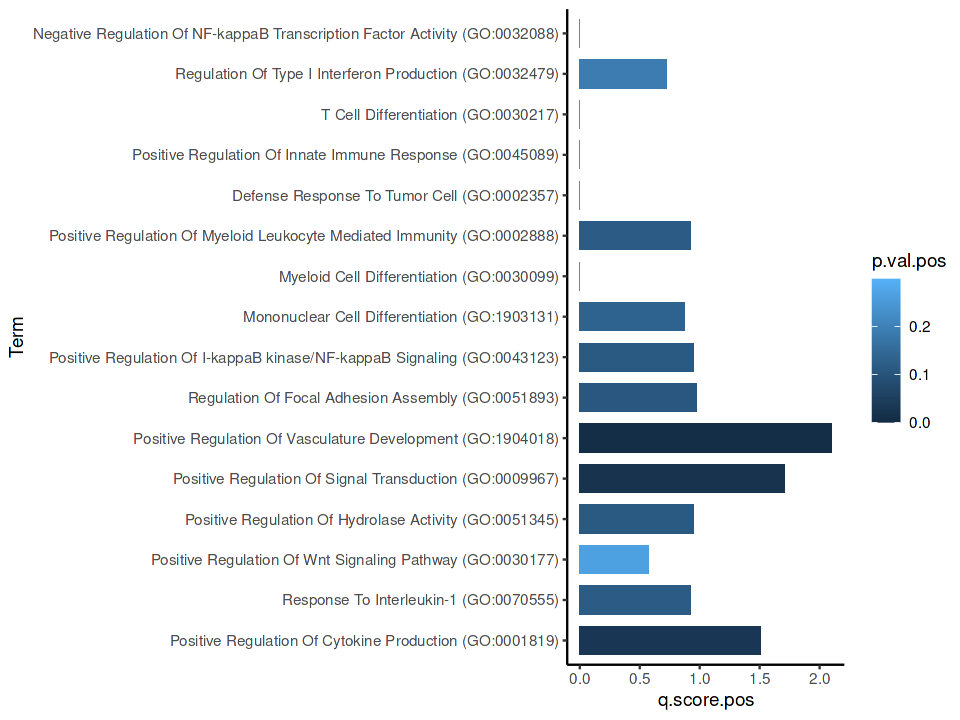

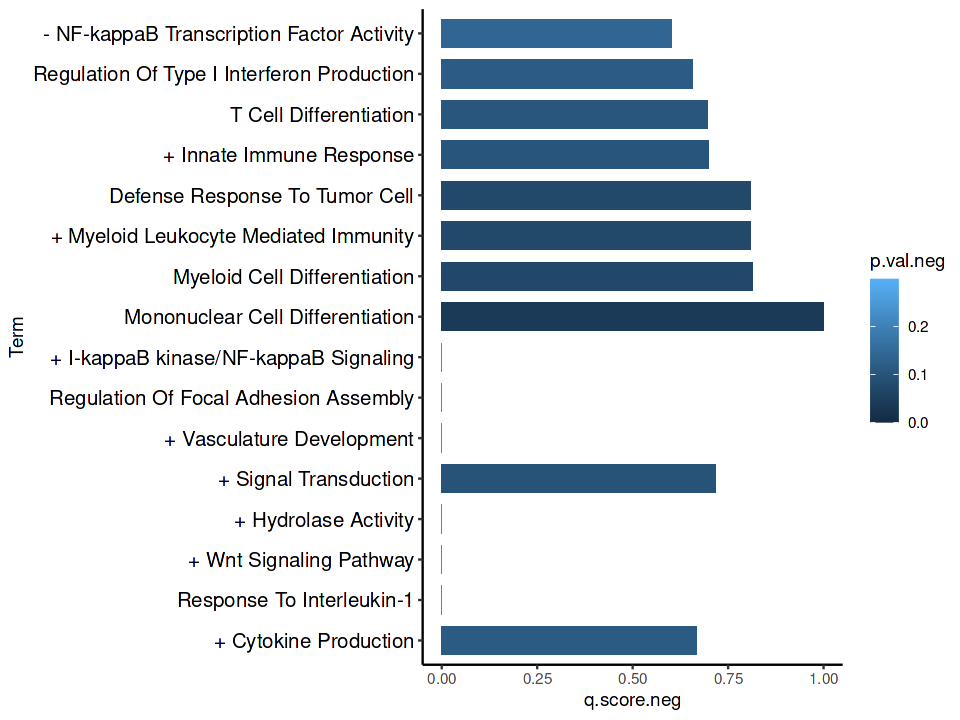

In [126]:
tmut_enr_total$Term <- rownames(tmut_enr_total)
tmut_enr_total$Term <- factor(tmut_enr_total$Term, levels = tmut_enr_total$Term)

ggplot(tmut_enr_total, aes(x = Term , y =  q.score.pos, 
                                  fill=p.val.pos)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
scale_fill_gradient( limits = c(0, 0.3)) +
theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))

tmut_enr_total_neg$Term <- rownames(tmut_enr_total_neg)

tmut_enr_total_neg$Term <- gsub(" \\(GO:.*$", "", rownames(tmut_enr_total_neg))
tmut_enr_total_neg$Term <- gsub("positive regulation of ", "+ ", tmut_enr_total_neg$Term, ignore.case = TRUE)
tmut_enr_total_neg$Term <- gsub("negative regulation of ", "- ", tmut_enr_total_neg$Term, ignore.case = TRUE)

tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)


tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)

ggplot(tmut_enr_total_neg, aes(x = Term , y =  q.score.neg, 
                                  fill=p.val.neg)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
      scale_fill_gradient( limits = c(0, 0.3)) +
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
           axis.text.y = element_text(size = 12, color = "black") # Increase font size for y-axis tick labels
)



In [128]:
pdf("pairwisecomparisions_plots.pdf", width = 8, height = 6)  # Adjust width and height as needed


tmut_enr_total$Term <- rownames(tmut_enr_total)
tmut_enr_total$Term <- factor(tmut_enr_total$Term, levels = tmut_enr_total$Term)

ggplot(tmut_enr_total, aes(x = Term , y =  q.score.pos, 
                                  fill=p.val.pos)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))

tmut_enr_total_neg$Term <- rownames(tmut_enr_total_neg)

tmut_enr_total_neg$Term <- gsub(" \\(GO:.*$", "", rownames(tmut_enr_total_neg))
tmut_enr_total_neg$Term <- gsub("positive regulation of ", "+ ", tmut_enr_total_neg$Term, ignore.case = TRUE)
tmut_enr_total_neg$Term <- gsub("negative regulation of ", "- ", tmut_enr_total_neg$Term, ignore.case = TRUE)

tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)


tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)

ggplot(tmut_enr_total_neg, aes(x = Term , y =  q.score.neg, 
                                  fill=p.val.neg)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
           axis.text.y = element_text(size = 12, color = "black") # Increase font size for y-axis tick labels
)
dev.off()


png 
  2

In [129]:
(mut_enr_total_neg[mut_enr_total_neg$Term %in% all_pathways,])

Term                                                                       
7   Mononuclear Cell Differentiation (GO:1903131)                              
21  Myeloid Cell Differentiation (GO:0030099)                                  
108 Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)    
115 Defense Response To Tumor Cell (GO:0002357)                                
287 Positive Regulation Of Signal Transduction (GO:0009967)                    
301 Positive Regulation Of Innate Immune Response (GO:0045089)                 
302 T Cell Differentiation (GO:0030217)                                        
334 Positive Regulation Of Cytokine Production (GO:0001819)                    
342 Regulation Of Type I Interferon Production (GO:0032479)                    
388 Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088)
    Overlap P.value      Adjusted.P.value Old.P.value Old.Adjusted.P.value
7   2/24    0.0005493106 0.03845174       0           0                   
21  2/57    0.0030837416 0.07070209       0           0                   
108 1/12    0.0172664743 0.07155641       0           0                   
115 1/12    0.0172664743 0.07155641       0           0                   
287 2/266   0.0565500173 0.09654881       0           0                   
301 1/45    0.0632783022 0.10301119       0           0                   
302 1/46    0.0646396087 0.10350787       0           0                   
334 2/320   0.0780948620 0.11396589       0           0                   
342 1/59    0.0821637040 0.11771993       0           0                   
388 1/81    0.1111001729 0.14030692       0           0                   
    Odds.Ratio Combined.Score Genes      qscore   
7   67.168350  504.22249      IRF8;IKZF1 1.4150840
21  26.822896  155.07956      SPI1;IKZF1 1.1505677
108 64.805195  263.04354      SPI1       1.1453514
115 64.805195  263.04354      SPI1       1.1453514
287  5.529461   15.88410      HTT;RBPJ   1.0152531
301 16.174513   44.64510      SPI1       0.9871156
302 15.814286   43.31419      SPI1       0.9850266
334  4.577918   11.67292      IL15;PLCG2 0.9432251
342 12.261700   30.64250      IRF8       0.9291500
388  8.879911   19.51203      SPI1       0.8529209

In [72]:
# Required libraries
library(ggplot2)

# Select relevant columns
columns_to_analyze <- c("myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1",
                        "Macrophage.11", "Macrophage.21")

# Subset the dataframe to include only these columns
myeloid_subset <- myeloid@meta.data[, columns_to_analyze]

# Remove cells with Macrophage.11 or Macrophage.21 expression < 0
myeloid_subset <- myeloid_subset[myeloid_subset$Macrophage.11 > 0 & myeloid_subset$Macrophage.21 > 0, ]

# Compute correlation matrix
correlation_matrix <- cor(myeloid_subset, use = "complete.obs")

# Extract correlations with Macrophage.11 and Macrophage.21
cor_with_macrophage <- correlation_matrix[c("Macrophage.11", "Macrophage.21"),
                                          c("myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1")]

# Print the correlation matrix for verification
print(cor_with_macrophage)

# Scatter plots with line of best fit and confidence interval
# Scatter plot for Macrophage.11 vs myeloid_signature_quart_samp1
plot1 <- ggplot(myeloid_subset, aes(x = myeloid_signature_quart_samp1, y = Macrophage.11)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Macrophage.11 vs Myeloid Signature Quart Samp1", x = "Myeloid Signature Quart Samp1", y = "Macrophage.11")

# Scatter plot for Macrophage.11 vs myeloid_signature_quart_samp_neg1
plot2 <- ggplot(myeloid_subset, aes(x = myeloid_signature_quart_samp_neg1, y = Macrophage.11)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Macrophage.11 vs Myeloid Signature Quart Samp Neg1", x = "Myeloid Signature Quart Samp Neg1", y = "Macrophage.11")

# Scatter plot for Macrophage.21 vs myeloid_signature_quart_samp1
plot3 <- ggplot(myeloid_subset, aes(x = myeloid_signature_quart_samp1, y = Macrophage.21)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Macrophage.21 vs Myeloid Signature Quart Samp1", x = "Myeloid Signature Quart Samp1", y = "Macrophage.21")

# Scatter plot for Macrophage.21 vs myeloid_signature_quart_samp_neg1
plot4 <- ggplot(myeloid_subset, aes(x = myeloid_signature_quart_samp_neg1, y = Macrophage.21)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Macrophage.21 vs Myeloid Signature Quart Samp Neg1", x = "Myeloid Signature Quart Samp Neg1", y = "Macrophage.21")

# Display the plots
library(gridExtra)
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)


ERROR: Error in `[.data.frame`(myeloid@meta.data, , columns_to_analyze): undefined columns selected


In [ ]:
# Initialize variables to store optimal parameters and correlations
optimal_param1 <- 1
optimal_param2 <- 1
lowest_correlation_with_Macrophage11 <- Inf
highest_correlation_with_Macrophage21 <- -Inf

# Loop through possible combinations of param_1 and param_2
for (param_1 in 1:12) {
  for (param_2 in 1:12) {
    
    # Apply filtering based on the current parameters
    keep <- rowSums(counts(dds_unfilt) >= param_1) >= param_2
    dds <- dds_unfilt[keep, ]
    
    # Estimate size factors and run DESeq
    dds <- estimateSizeFactors(dds, type = 'poscounts')
    dds <- DESeq(dds)
    
    # Get results for the quartile comparison
    results_data <- as.data.frame(results(dds, contrast = c("m_cell_quartile", "Q4 (High AFM)", "Q1 (Low AFM)")))
    
    # Identify genes of interest for positive and negative log2 fold changes
    GOI_pos <- subset(results_data, log2FoldChange > 0 & pvalue < 0.05)$gene
    GOI_neg <- subset(results_data, log2FoldChange < 0 & pvalue < 0.05)$gene
    
    if (length(GOI_pos)>1 && length(GOI_neg)>1){
        # Add module scores to the myeloid object
        myeloid <- AddModuleScore(myeloid, features = list(GOI_pos), name = "myeloid_signature_quart_samp")
        myeloid <- AddModuleScore(myeloid, features = list(GOI_neg), name = "myeloid_signature_quart_samp_neg")
        
        # Select relevant columns
        columns_to_analyze <- c("myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1",
                                "Macrophage.11", "Macrophage.21")
        
        # Subset the dataframe
        myeloid_subset <- myeloid@meta.data[, columns_to_analyze]
        
        # Compute the correlation matrix
        correlation_matrix <- cor(myeloid_subset, use = "complete.obs")
        
        # Extract correlations with Macrophage.11 and Macrophage.21
        cor_Macrophage11 <- correlation_matrix["Macrophage.11", "myeloid_signature_quart_samp1"]
        cor_Macrophage21 <- correlation_matrix["Macrophage.21", "myeloid_signature_quart_samp1"]
        
        # Check if this combination yields the desired correlations
        if (cor_Macrophage11 < lowest_correlation_with_Macrophage11 && cor_Macrophage21 > highest_correlation_with_Macrophage21) {
          lowest_correlation_with_Macrophage11 <- cor_Macrophage11
          highest_correlation_with_Macrophage21 <- cor_Macrophage21
          optimal_param1 <- param_1
          optimal_param2 <- param_2
        }
    }

  }
}

# Display the optimal parameters and their correlation values
cat("Optimal param_1:", optimal_param1, "\n")
cat("Optimal param_2:", optimal_param2, "\n")
cat("Lowest correlation with Macrophage.11:", lowest_correlation_with_Macrophage11, "\n")
cat("Highest correlation with Macrophage.21:", highest_correlation_with_Macrophage21, "\n")




  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

  Note: lev

In [80]:
GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_afm_corr")

In [34]:
myeloid

An object of class Seurat 
34796 features across 333 samples within 2 assays 
Active assay: RNA (32796 features, 0 variable features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [81]:
GOI_f <- subset(results_data, log2FoldChange > 0)
GOI_f <- subset(GOI_f, pvalue < 0.10)
GOI_f


GOI_r <- subset(results_data, log2FoldChange < 0)
GOI_r <- subset(GOI_r, pvalue < 0.20)
GOI_r

baseMean  log2FoldChange lfcSE     stat     pvalue     padj     
RICTOR  0.7096479 0.7187340      0.3451571 2.082339 0.03731154 0.9995496
PARP8   0.5291845 0.8457031      0.4864008 1.738696 0.08208826 0.9995496
ASCC3   0.7634959 0.6474257      0.3386140 1.911988 0.05587779 0.9995496
VPS13B  1.4622577 0.5936024      0.3123693 1.900323 0.05739081 0.9995496
GRHL2   0.7576366 0.7018393      0.3462161 2.027171 0.04264488 0.9995496
MLLT10  0.5215788 0.6211176      0.3526924 1.761075 0.07822579 0.9995496
TACC2   0.7228546 0.6049760      0.3657301 1.654160 0.09809502 0.9995496
SNX29   0.6059531 0.5790093      0.3493993 1.657157 0.09748782 0.9995496
ANKRD11 1.7571318 0.6489752      0.2683477 2.418412 0.01558841 0.9995496
        gene    logp    
RICTOR  RICTOR  1.428157
PARP8   PARP8   1.085719
ASCC3   ASCC3   1.252761
VPS13B  VPS13B  1.241158
GRHL2   GRHL2   1.370133
MLLT10  MLLT10  1.106650
TACC2   TACC2   1.008353
SNX29   SNX29   1.011050
ANKRD11 ANKRD11 1.807198

baseMean  log2FoldChange lfcSE     stat      pvalue      padj     
NRDC     0.6601036 -0.4769174     0.2742885 -1.738743 0.08207992  0.9995496
S100A6   2.9885488 -0.4664658     0.3601821 -1.295083 0.19529158  0.9995496
S100A14  0.5931168 -0.4287667     0.3156414 -1.358398 0.17433741  0.9995496
MUC1     1.6418321 -0.4077499     0.2574547 -1.583773 0.11324530  0.9995496
ASH1L    1.1602634 -0.4773026     0.2767089 -1.724927 0.08454061  0.9995496
LMNA     0.6604457 -0.4758769     0.3356280 -1.417870 0.15622864  0.9995496
ATP1B1   1.1973082 -0.4107262     0.3105277 -1.322672 0.18594463  0.9995496
KIF26B   0.4565500 -1.3103056     0.6246228 -2.097755 0.03592681  0.9995496
PDIA6    0.8010539 -0.5518758     0.2805641 -1.967022 0.04918068  0.9995496
EXOC6B   0.4933760 -0.6725934     0.4056683 -1.657988 0.09731980  0.9995496
EIF2AK3  0.2962288 -0.6649237     0.5079579 -1.309013 0.19052978  0.9995496
TMEM131  0.6300307 -0.5136325     0.3016847 -1.702547 0.08865279  0.9995496
GIGYF2   0.6864293 -0.8129270     0.3453175 -2.354144 0.01856543  0.9995496
RPL15    0.5915408 -0.6281523     0.3235667 -1.941338 0.05221733  0.9995496
GOLGA4   0.7469294 -0.5862231     0.3016760 -1.943221 0.05198946  0.9995496
NKTR     0.3129089 -0.5786215     0.4295743 -1.346965 0.17799158  0.9995496
CP       1.8344818 -0.5188452     0.3342055 -1.552474 0.12054888  0.9995496
TSC22D2  0.5141869 -0.6127843     0.3831934 -1.599151 0.10978696  0.9995496
SERP1    0.4675525 -0.4452869     0.3372168 -1.320476 0.18667599  0.9995496
SSR3     0.4315281 -0.6435923     0.3663690 -1.756678 0.07897271  0.9995496
DLG1     0.6211751 -0.5071455     0.3536110 -1.434191 0.15151791  0.9995496
LIMCH1   1.9209914 -0.6307786     0.3017753 -2.090226 0.03659748  0.9995496
ATP8A1   1.0566180 -0.5954645     0.3474034 -1.714043 0.08652075  0.9995496
TMEM165  1.0307020 -0.7342157     0.3395858 -2.162092 0.03061106  0.9995496
SEC31A   0.6890464 -0.4614927     0.3228400 -1.429478 0.15286688  0.9995496
AFF1     1.2575158 -0.3950332     0.2873726 -1.374638 0.16924377  0.9995496
FAM13A   0.8718174 -0.6103963     0.3542430 -1.723101 0.08487034  0.9995496
NFKB1    0.4812930 -0.5875379     0.3719175 -1.579754 0.11416332  0.9995496
SEC24D   0.6560911 -0.5204373     0.3897519 -1.335304 0.18177677  0.9995496
SLC10A7  0.4087822 -0.6820443     0.4182864 -1.630568 0.10298157  0.9995496
⋮        ⋮         ⋮              ⋮         ⋮         ⋮           ⋮        
ERO1A    1.2774707 -0.6536206     0.3242413 -2.015846 0.043816059 0.9995496
ZFP36L1  0.9775244 -0.5794169     0.3538767 -1.637341 0.101559182 0.9995496
SERPINA1 1.4269957 -0.8161287     0.3414271 -2.390346 0.016832521 0.9995496
PDIA3    1.2040250 -0.3806455     0.2574431 -1.478562 0.139257497 0.9995496
TCF12    1.1635773 -0.6495883     0.3209027 -2.024253 0.042944135 0.9995496
VPS13C   0.7359206 -0.4791501     0.2785054 -1.720434 0.085353639 0.9995496
ABHD2    0.8634790 -0.8324697     0.3141810 -2.649650 0.008057528 0.9995496
ALDOA    0.8665094 -0.5500834     0.3509625 -1.567356 0.117031400 0.9995496
FUS      0.8362974 -0.4872990     0.3147873 -1.548026 0.121616003 0.9995496
RPL13    2.6268859 -0.3548964     0.2249462 -1.577695 0.114635768 0.9995496
UBB      0.3554025 -0.5829600     0.4043526 -1.441712 0.149383577 0.9995496
WSB1     0.6005209 -0.5025197     0.3800584 -1.322217 0.186095840 0.9995496
KRT19    1.5341620 -0.6947035     0.2933634 -2.368065 0.017881397 0.9995496
NPEPPS   0.7378977 -0.5399361     0.3131080 -1.724441 0.084628350 0.9995496
DDX5     1.3136293 -0.4015109     0.2482951 -1.617071 0.105862865 0.9995496
H3F3B    1.0446213 -0.5448328     0.2819520 -1.932360 0.053315068 0.9995496
P4HB     1.2478713 -0.3023178     0.2202656 -1.372514 0.169903347 0.9995496
PTPRM    1.5499015 -0.5153041     0.3848691 -1.338907 0.180600803 0.9995496
LMAN1    0.4684384 -0.4724470     0.3485830 -1.355336 0.175310663 0.9995496
C3       1.2058790 -0.8030880     0.3300304 -2.433376 0.014958762 0.9995496
ANGPTL4  1.1168396 -0.4585090     0.3387342 -1.353595 0.1

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


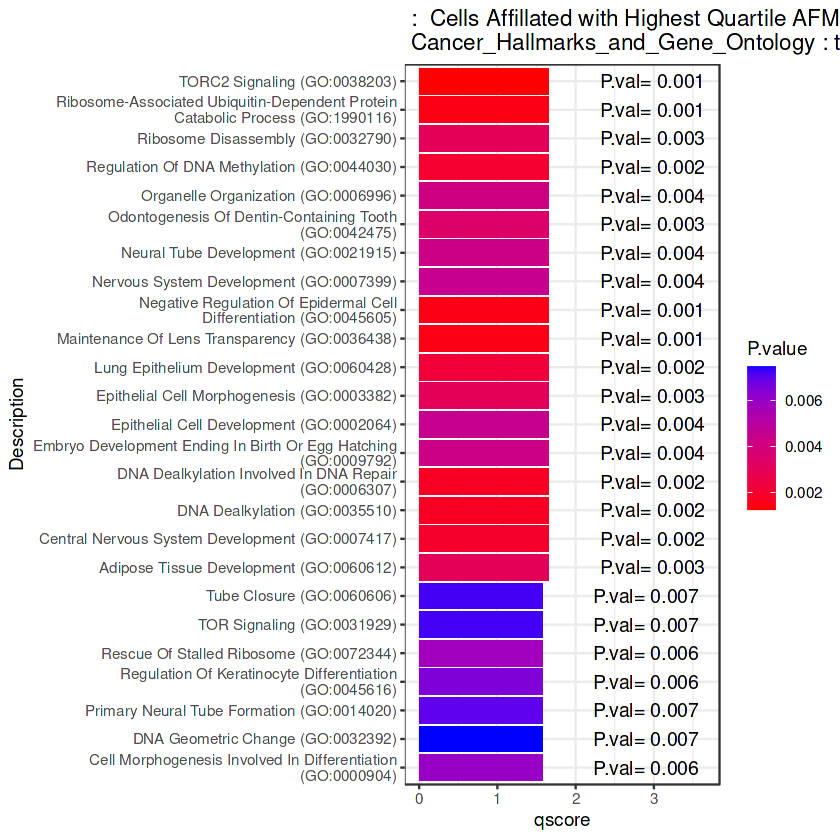

In [32]:
genes <- genes_f

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go
mut_enr <- subset(mut_enr,Adjusted.P.value	 < 0.15 & qscore > 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
print(myggp)


In [33]:
mut_enr$Term

[1] "TORC2 Signaling (GO:0038203)"                                                  
 [2] "Negative Regulation Of Epidermal Cell Differentiation (GO:0045605)"            
 [3] "Ribosome-Associated Ubiquitin-Dependent Protein Catabolic Process (GO:1990116)"
 [4] "Maintenance Of Lens Transparency (GO:0036438)"                                 
 [5] "DNA Dealkylation (GO:0035510)"                                                 
 [6] "DNA Dealkylation Involved In DNA Repair (GO:0006307)"                          
 [7] "Central Nervous System Development (GO:0007417)"                               
 [8] "Regulation Of DNA Methylation (GO:0044030)"                                    
 [9] "Lung Epithelium Development (GO:0060428)"                                      
[10] "Epithelial Cell Morphogenesis (GO:0003382)"                                    
[11] "Ribosome Disassembly (GO:0032790)"                                             
[12] "Adipose Tissue Development (GO:0060612)"                                       
[13] "Odontogenesis Of Dentin-Containing Tooth (GO:0042475)"                         
[14] "Organelle Organization (GO:0006996)"                                           
[15] "Neural Tube Development (GO:0021915)"                                          
[16] "Embryo Development Ending In Birth Or Egg Hatching (GO:0009792)"               
[17] "Nervous System Development (GO:0007399)"                                       
[18] "Epithelial Cell Development (GO:0002064)"                                      
[19] "Rescue Of Stalled Ribosome (GO:0072344)"                                       
[20] "Cell Morphogenesis Involved In Differentiation (GO:0000904)"                   
[21] "Regulation Of Keratinocyte Differentiation (GO:0045616)"                       
[22] "Primary Neural Tube Formation (GO:0014020)"                                    
[23] "Tube Closure (GO:0060606)"                                                     
[24] "TOR Signaling (GO:0031929)"                                                    
[25] "DNA Geometric Change (GO:0032392)"                                             
[26] "Neural Tube Closure (GO:0001843)"                                              
[27] "Positive Regulation Of Telomerase Activity (GO:0051973)"                       
[28] "Response To Nutrient Levels (GO:0031667)"                                      
[29] "Connective Tissue Development (GO:0061448)"                                    
[30] "Odontogenesis (GO:0042476)"                                                    
[31] "DNA Duplex Unwinding (GO:0032508)"                                             
[32] "Translational Elongation (GO:0006414)"                                         
[33] "Skeletal System Morphogenesis (GO:0048705)"                                    
[34] "Regulation Of Telomerase Activity (GO:0051972)"                                
[35] "Positive Regulation Of TOR Signaling (GO:0032008)"                             
[36] "Bicellular Tight Junction Assembly (GO:0070830)"                               
[37] "Actin Cytoskeleton Reorganization (GO:0031532)"                                
[38] "Tight Junction Assembly (GO:0120192)"                                          
[39] "Apical Junction Assembly (GO:0043297)"                                         
[40] "Organelle Disassembly (GO:1903008)"                                            
[41] "Chordate Embryonic Development (GO:0043009)"                                   
[42] "Cell Junction Organization (GO:0034330)"                                       
[43] "Endocytic Recycling (GO:0032456)"                                              
[44] "Positive Regulation Of DNA Biosynthetic Process (GO:2000573)"                  
[45] "Regulation Of Actin Filament-Based Process (GO:0032970)"                       
[46] "Cellular Response To Nutrient Levels (GO:0031669)"                             
[47] "Regulation Of TOR Signaling (GO:0032006

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
                                                                                                                                   Term
1                                                                                Negative Regulation Of Peptidase Activity (GO:0010466)
2                                                                            Negative Regulation Of Endopeptidase Activity (GO:0010951)
3                                                                                     Regulation Of Endopeptidase Activity (GO:0052548)
4                                                                               Positive Regulation Of Cytokine Production (GO:0001819)
5                                                                             Cellular Response To Organonitrogen Compound (GO:0071417)
6                                   

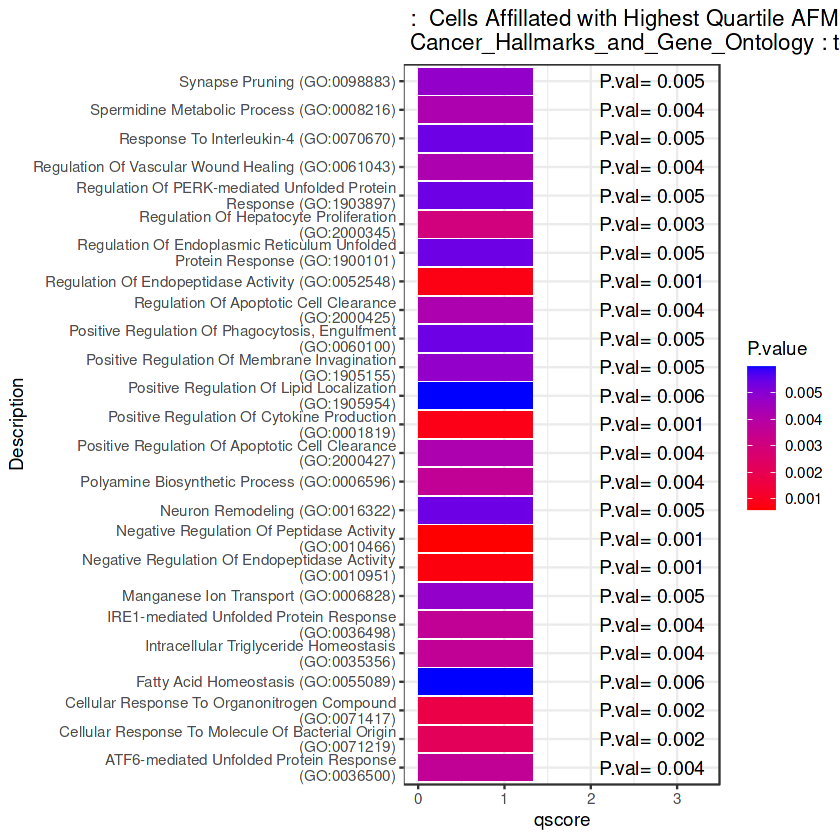

In [30]:
genes <- genes_r

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go
mut_enr <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore >= 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""

print(mut_enr)
h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
print(myggp)


In [31]:
mut_enr$Term

[1] "Negative Regulation Of Peptidase Activity (GO:0010466)"                                                                              
 [2] "Negative Regulation Of Endopeptidase Activity (GO:0010951)"                                                                          
 [3] "Regulation Of Endopeptidase Activity (GO:0052548)"                                                                                   
 [4] "Positive Regulation Of Cytokine Production (GO:0001819)"                                                                             
 [5] "Cellular Response To Organonitrogen Compound (GO:0071417)"                                                                           
 [6] "Cellular Response To Molecule Of Bacterial Origin (GO:0071219)"                                                                      
 [7] "Regulation Of Hepatocyte Proliferation (GO:2000345)"                                                                                 
 [8] "ATF6-mediated Unfolded Protein Response (GO:0036500)"                                                                                
 [9] "IRE1-mediated Unfolded Protein Response (GO:0036498)"                                                                                
[10] "Polyamine Biosynthetic Process (GO:0006596)"                                                                                         
[11] "Intracellular Triglyceride Homeostasis (GO:0035356)"                                                                                 
[12] "Spermidine Metabolic Process (GO:0008216)"                                                                                           
[13] "Regulation Of Vascular Wound Healing (GO:0061043)"                                                                                   
[14] "Positive Regulation Of Apoptotic Cell Clearance (GO:2000427)"                                                                        
[15] "Regulation Of Apoptotic Cell Clearance (GO:2000425)"                                                                                 
[16] "Manganese Ion Transport (GO:0006828)"                                                                                                
[17] "Synapse Pruning (GO:0098883)"                                                                                                        
[18] "Positive Regulation Of Membrane Invagination (GO:1905155)"                                                                           
[19] "Regulation Of Endoplasmic Reticulum Unfolded Protein Response (GO:1900101)"                                                          
[20] "Positive Regulation Of Phagocytosis, Engulfment (GO:0060100)"                                                                        
[21] "Regulation Of PERK-mediated Unfolded Protein Response (GO:1903897)"                                                                  
[22] "Response To Interleukin-4 (GO:0070670)"                                                                                              
[23] "Neuron Remodeling (GO:0016322)"                                                                                                      
[24] "Fatty Acid Homeostasis (GO:0055089)"                                                                                                 
[25] "Positive Regulation Of Lipid Localization (GO:1905954)"                                                                              
[26] "Cellular Response To Forskolin (GO:1904322)"                                                                                         
[27] "Positive Regulation Of B Cell Differentiation (GO:0045579)"                                                                          
[28] "Positive Regulation Of MHC Class II Biosynthetic Process (GO:0045348)"                                                               
[29] "Response To Forskolin (GO:1904321)"                                        

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: AGAT”
Warning message in FeaturePlot(myeloid, c("avAFM", "ARG1", "NOS1", "NOS2", "NOS3", :
“All cells have the same value (0) of ARG1.”
Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: AGAT, ADC”
Warning message in FeaturePlot(myeloid, c("avAFM", "ARG1", "ARG2", "NOS1", "NOS2", :
“All cells have the same value (0) of ARG1.”


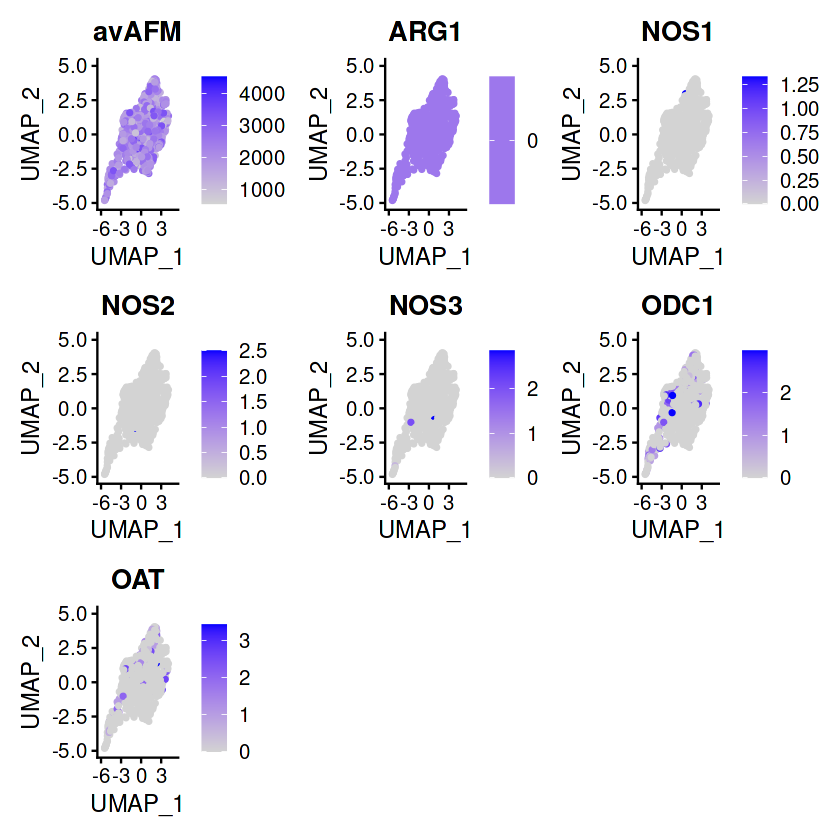

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: PYCRL”


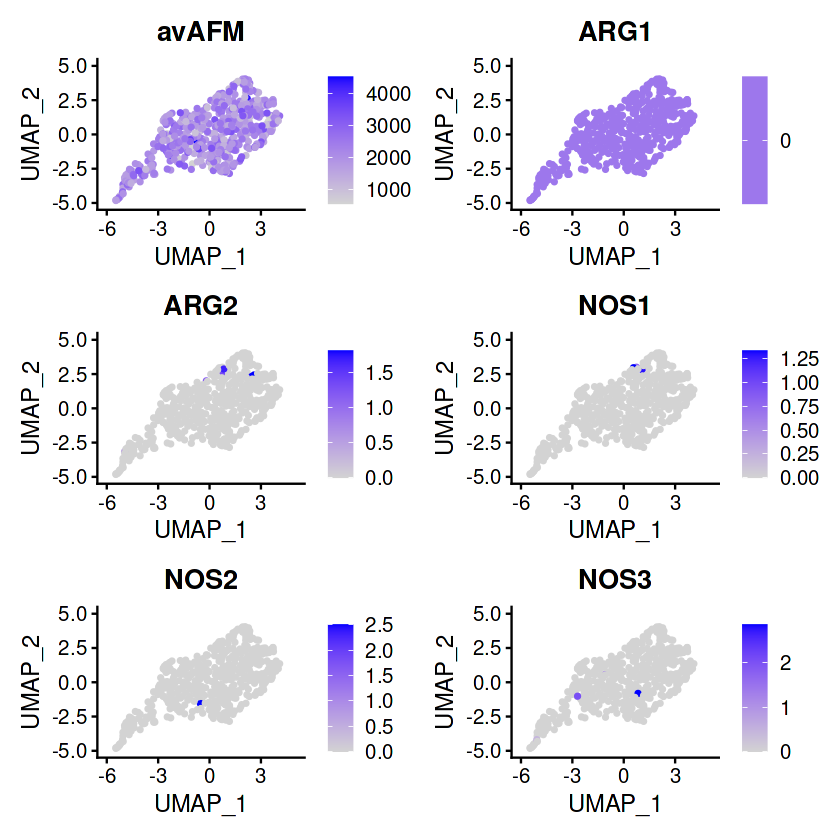

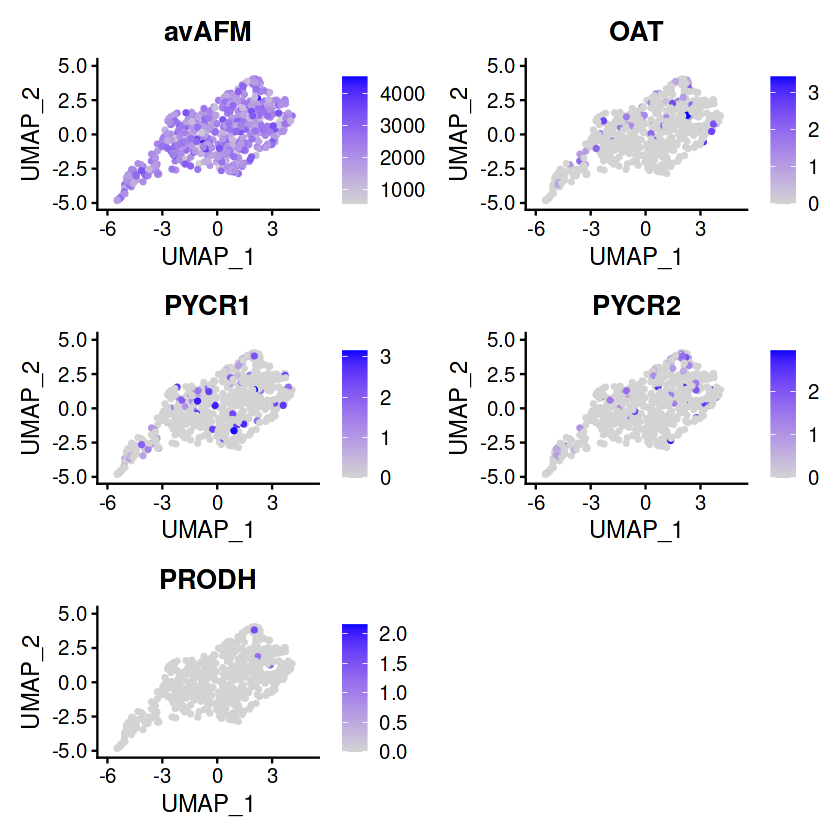

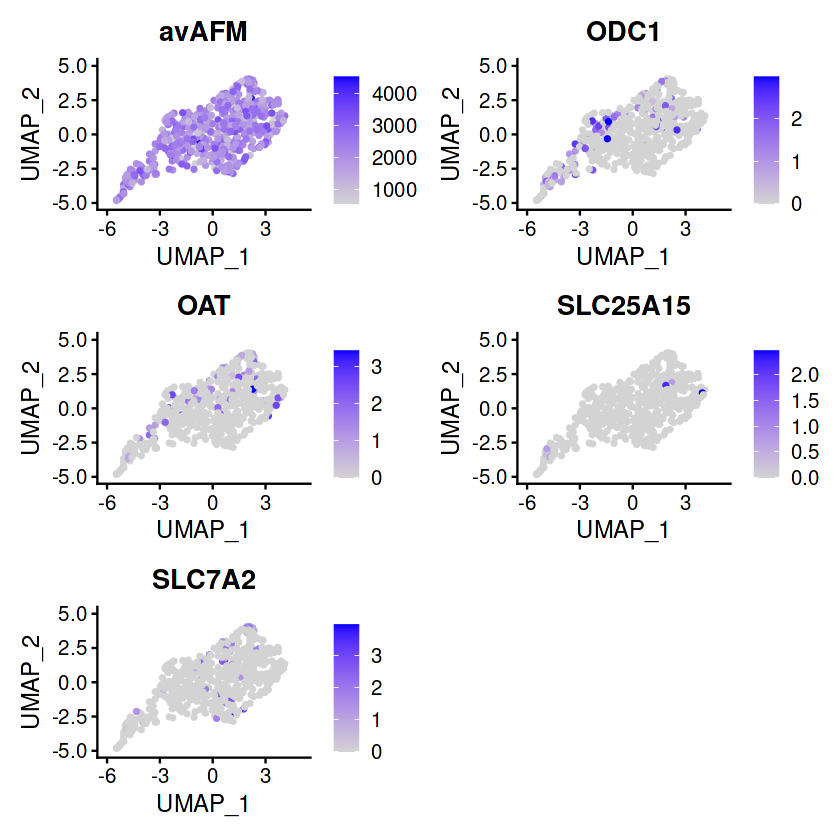

In [23]:
genes = c("ARG1", "NOS1", "NOS2", "NOS3", "ODC1", "OAT", "AGAT")

arginine_metabolism_genes = c("ARG1", "ARG2", "NOS1", "NOS2", "NOS3", "AGAT", "ADC")

# Proline Metabolism Pathway
proline_metabolism_genes = c("OAT", "PYCR1", "PYCR2", "PYCRL", "PRODH")

# Ornithine Metabolism Pathway
ornithine_metabolism_genes = c("ODC1", "OAT", "SLC25A15", "SLC7A2")



FeaturePlot(myeloid, c("avAFM", "ARG1", "NOS1", "NOS2", "NOS3", "ODC1", "OAT", "AGAT"))
FeaturePlot(myeloid, c("avAFM", "ARG1", "ARG2", "NOS1", "NOS2", "NOS3", "AGAT", "ADC"))
FeaturePlot(myeloid, c("avAFM", "OAT", "PYCR1", "PYCR2", "PYCRL", "PRODH"))
FeaturePlot(myeloid, c("avAFM", "ODC1", "OAT", "SLC25A15", "SLC7A2"))


In [24]:
intersect(results_data$gene, ornithine_metabolism_genes)


character(0)

In [25]:
results_data

baseMean    log2FoldChange lfcSE     stat        pvalue    
ERRFI1     1.2314516   -0.09793477    0.2796526 -0.35020156 0.72618744
RERE       1.1144153    0.22410254    0.2244785  0.99832503 0.31812177
ENO1       1.2836831    0.10218868    0.1637897  0.62390183 0.53269206
PGD        0.8496032    0.23501434    0.2015572  1.16599302 0.24361727
KAZN       1.0103050    0.40837515    0.5580176  0.73183203 0.46427109
HP1BP3     0.4135257   -0.14014396    0.2205780 -0.63534866 0.52520105
EIF4G3     0.5345963   -0.17438105    0.2408217 -0.72410858 0.46899908
USP48      0.2562441   -0.08873944    0.3301766 -0.26876356 0.78811164
MACF1      1.4072304    0.23569147    0.2014810  1.16979497 0.24208349
SMAP2      0.2757938   -0.55525633    0.4379220 -1.26793444 0.20482136
SCMH1      0.3945266    0.23127003    0.2735073  0.84557177 0.39779168
RPS8       0.5663205   -0.09517240    0.2161699 -0.44026662 0.65974402
FAF1       0.7390950    0.35821595    0.2576425  1.39036038 0.16441947
EPS15      0.3873514   -0.01163723    0.2845681 -0.04089437 0.96738011
JUN        0.5922886    0.39398593    0.3210106  1.22733002 0.21969858
NFIA       0.6922562    0.43029289    0.2678153  1.60667795 0.10812503
PATJ       0.7031925    0.53803240    0.2679840  2.00770344 0.04467482
JAK1       0.6807470    0.13827031    0.2034275  0.67970310 0.49669247
SRSF11     0.3914876   -0.06543633    0.2398558 -0.27281527 0.78499522
DIPK1A     0.1681689    0.01166294    0.5478127  0.02129001 0.98301431
DPYD       0.6630084    0.60196008    0.4301591  1.39938956 0.16169620
RAP1A      0.2688841   -0.34400687    0.3351704 -1.02636421 0.30471994
MAGI3      0.7221272    0.27432537    0.2867769  0.95658101 0.33877878
ATP1A1     0.8965803    0.13782729    0.1893234  0.72799919 0.46661408
TENT5C     0.1667910   -0.33508438    0.7077547 -0.47344703 0.63589428
TXNIP      0.5539466    0.01784930    0.3061747  0.05829775 0.95351146
LINC01138  0.2792733   -0.02404708    0.3351525 -0.07174968 0.94280112
AC245297.3 0.4538462    0.08473469    0.3066189  0.27635178 0.78227789
MCL1       0.5135126   -0.11592216    0.2319019 -0.49987587 0.61716249
S100A10    1.3789819    0.19647281    0.1910430  1.02842213 0.30375130
⋮          ⋮           ⋮              ⋮         ⋮           ⋮         
FAAH2       0.56981479  0.112377945   0.3036151  0.37013288 0.7112835 
OPHN1       0.46851376  0.365080630   0.3707290  0.98476427 0.3247399 
OGT         0.32825939 -0.108999668   0.2969093 -0.36711436 0.7135337 
RPS4X       0.51385815 -0.055111052   0.2330802 -0.23644674 0.8130860 
HDAC8       0.39251949  0.082857754   0.2938374  0.28198502 0.7779550 
XIST        0.92022504  0.413843813   0.4079620  1.01441767 0.3103835 
FTX         1.35408298  0.394865680   0.2449644  1.61193055 0.1069771 
ATRX        0.45415897  0.023288346   0.2549900  0.09133043 0.9272300 
DIAPH2      0.25340514  0.263447048   0.3684843  0.71494790 0.4746412 
DANT2       0.52431073  0.284753760   0.3446869  0.82612294 0.4087344 
AL008633.1  0.53819993 -0.067652630   0.4470973 -0.15131521 0.8797271 
SMARCA1     0.31294592 -0.164164128   0.3638214 -0.45122177 0.6518297 
IGSF1       0.28150723  0.050625609   0.4392253  0.11526115 0.9082381 
FGF13       0.47487935  0.547479033   0.4345820  1.25978295 0.2077477 
FLNA        0.38194813 -0.006456485   0.3128513 -0.02063755 0.9835348 
RPL10       0.88402686  0.061014752   0.1976901  0.30863836 0.7575966 
MT-ND1      8.82258734 -0.068615828   0.1437026 -0.47748499 0.6330168 
MT-ND2      6.82547842 -0.205701770   0.1556839 -1.32127869 0.1864085 
MT-CO1     31.09669170 -0.007178179   0.1293790 -0.05548177 0.9557547 
MT-CO2     14.78916786  0.186216350   0.1384316  1.34518671 0.1785649 
MT-ATP8     6.45594516  0.127323794   0.1612069  0.78981586 0.4296353 
MT-ATP6     3.85871699  0.009614563   0.1420332  0.06769234 0.9460305 
MT-CO3     10.06488235  0.123984670   0.1412769  0.87760038 0.3801606 
MT-ND3      1.07871580  0.383630430   0.2264068  1.69442950 0.0901837 
MT-ND4L    17.52057470  0.147620324

Centering and scaling data matrix



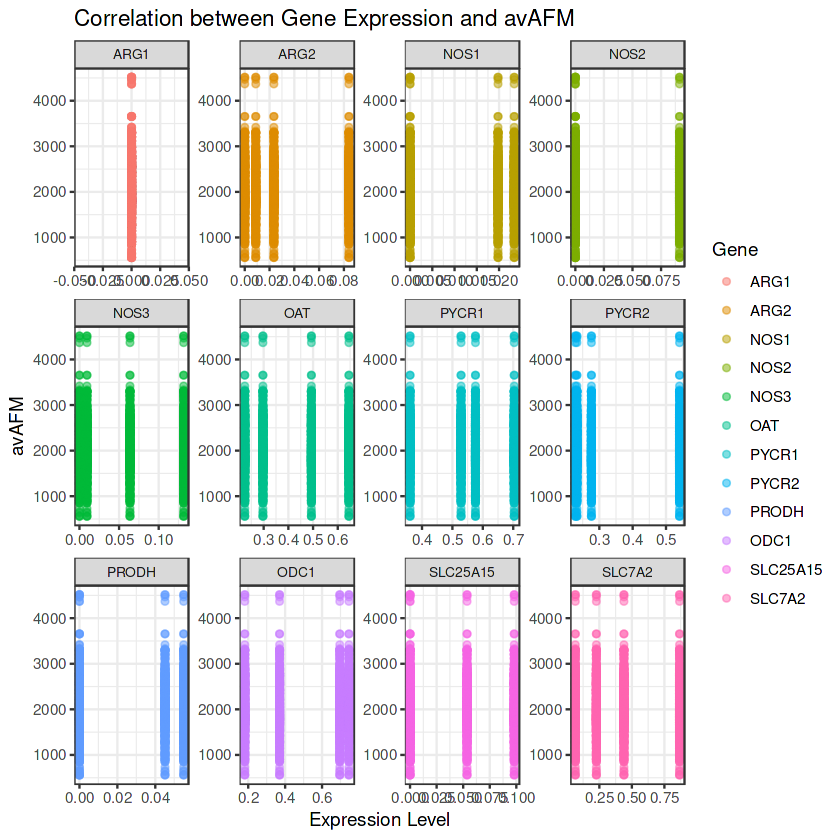

In [26]:
all_genes <- c("ARG1", "ARG2", "NOS1", "NOS2", "NOS3", "AGAT", "ADC",
               "OAT", "PYCR1", "PYCR2", "PYCRL", "PRODH",
               "ODC1", "SLC25A15", "SLC7A2")

# Subset Seurat object to only include the necessary genes
data_subset <- subset(myeloid, features = all_genes)

# Calculate average expression of each gene across all cells
avg_expression <- AverageExpression(data_subset, return.seurat = TRUE)

# Melt the data to long format for easier plotting with ggplot
library(reshape2)
expression_melted <- melt(avg_expression@assays$RNA@data, varnames = c("gene", "cell"), value.name = "expression")

# Merge with metadata to include the avAFM column
expression_merged <- merge(expression_melted, myeloid@meta.data)

# Create a scatter plot for each gene's expression vs avAFM
p <- ggplot(expression_merged, aes(x = expression, y = avAFM, color = gene)) +
  geom_point(alpha = 0.5) +
  facet_wrap(~ gene, scales = "free") +
  theme_bw() +
  labs(title = "Correlation between Gene Expression and avAFM",
       x = "Expression Level",
       y = "avAFM",
       color = "Gene") +
  theme(strip.text.x = element_text(size = 8))

# Print the plot
print(p)


In [27]:
myeloid

An object of class Seurat 
66054 features across 504 samples within 3 assays 
Active assay: RNA (32796 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

In [28]:
mut_enr

Term                                                     Overlap
1  Protein Secretion                                        3/96   
2  Androgen Response                                        3/100  
23 Establishment Of Apical/Basal Cell Polarity (GO:0035089) 2/14   
   P.value      Adjusted.P.value Old.P.value Old.Adjusted.P.value Odds.Ratio
1  0.0002015988 0.00250180       0           0                     30.54224 
2  0.0002274364 0.00250180       0           0                     29.27688 
23 0.0001244809 0.03410778       0           0                    151.24242 
   Combined.Score Genes               qscore  
1   259.8910      TPD52;RPS6KA3;KRT18 2.601747
2   245.5932      TPD52;RPS6KA3;KRT8  2.601747
23 1359.8748      PATJ;EZR            1.467147

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


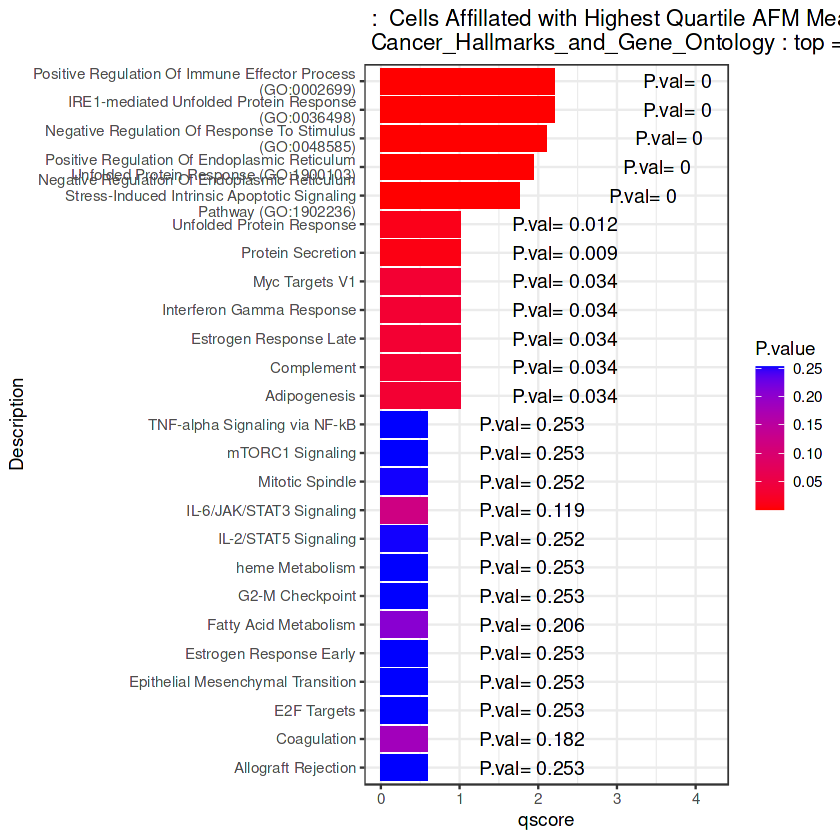

In [53]:
genes <- GOI_r$gene

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
#mut_enr <- subset(mut_enr, P.value	 < 0.05 & qscore > 2.5)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
print(myggp)


In [30]:
write.csv(myeloid@meta.data, "myeloid_meta_data.csv")

In [31]:
h_mut_enr$Term

character(0)

In [33]:
mye_sigs = read.csv("myeloid.signature.csv")
for(i in 1:ncol(mye_sigs)) {      
    sigs = list(mye_sigs[[i]])

    sigs2 = sigs[[1]]
    sigs = sigs2[!is.na(sigs2)]
    print(colnames(mye_sigs[i])[1])

    myeloid <- AddModuleScore(myeloid,
                      features = list(sigs),
                      name=colnames(mye_sigs[i])[1])
}

[1] "cDC1"


Warning message:
“The following features are not present in the object: WFDC21P, SIGLEC17P, , not searching for symbol synonyms”


[1] "DC2"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Cycling.Myleoid"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "DC3"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Developing.granulocytes.neutrophils"


Warning message:
“The following features are not present in the object: DEFA1, , not searching for symbol synonyms”


[1] "Macrophage.1"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Macrophage.2"


Warning message:
“The following features are not present in the object: CD115, CD206, CD301, DECTIN1, PDL2, FIZZ1, , not searching for symbol synonyms”


[1] "Mast.cells"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Microglia"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Monocytes.MDM"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Langerhans.like.cells"


Warning message:
“The following features are not present in the object: HLA-DQB3, HLA-DRB6, HLA-DRB9, , not searching for symbol synonyms”


[1] "Myeloid.derived.suppressor.cells"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Dendritic.cells"


Warning message:
“The following features are not present in the object: C1ORF54, not searching for symbol synonyms”


[1] "Migratory.DC"


Warning message:
“The following features are not present in the object: SDAD1P1, FCGR2C, , not searching for symbol synonyms”


[1] "Transitional.DC"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "DC.precursor"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Granulocytes"


Warning message:
“The following features are not present in the object: SIGLEC17P, PAGE5, , not searching for symbol synonyms”


[1] "Neutrophils"


Warning message:
“The following features are not present in the object: AC031733.2, , not searching for symbol synonyms”


[1] "Neutrophil.myeloid.progenitor"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Intermediate.macrophages"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


In [34]:
myeloid

An object of class Seurat 
66054 features across 504 samples within 3 assays 
Active assay: RNA (32796 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

In [35]:
colnames(myeloid@meta.data)

[1] "orig.ident"                                                                                    
  [2] "nCount_RNA"                                                                                    
  [3] "nFeature_RNA"                                                                                  
  [4] "percent.mt"                                                                                    
  [5] "percent.rps"                                                                                   
  [6] "percent.rpl"                                                                                   
  [7] "percent.rp"                                                                                    
  [8] "predicted_doublets"                                                                            
  [9] "doublet_scores"                                                                                
 [10] "nCount_SCT"                                                                                    
 [11] "nFeature_SCT"                                                                                  
 [12] "SCT_snn_res.0.3"                                                                               
 [13] "seurat_clusters"                                                                               
 [14] "celltype_bped_main"                                                                            
 [15] "celltype_bped_fine"                                                                            
 [16] "malignant_nonmalignant"                                                                        
 [17] "integrated_snn_res.0.5"                                                                        
 [18] "Curated_celltypes_fine"                                                                        
 [19] "Curated_celltypes_major"                                                                       
 [20] "Treatment_Arm"                                                                                 
 [21] "EGFR_Status"                                                                                   
 [22] "Percent_Tumor_PDL1_Expression"                                                                 
 [23] "Path_Response_Classification"                                                                  
 [24] "Most_Recent_Disease_Status"                                                                    
 [25] "Recurrence"                                                                                    
 [26] "Malignant_NonMalignant_v2"                                                                     
 [27] "MajorGroups_v2"                                                                                
 [28] "compartment_opt"                                                                               
 [29] "clone_opt"                                                                                     
 [30] "clone"                                                                                         
 [31] "CellName"                                                                                      
 [32] "avAFM"                                                                                         
 [33] "Epithelial.Mesenchymal.Transition1"                                                            
 [34] "Mechanosenstive_Signature1"                                                                    
 [35] "ZWV16_signature1"                                                                              
 [36] "ZWV08_spatial_signature1"                                                                      
 [37] "Apical.Junction1"                                                                              
 [38] "TNF.alpha.Signaling.via.NF.kB1"                                                                
 [39] "Myogenesis1"                                                                     

[1] "Correlation between Macrophage.11 and avAFM: 0.124209136376483"
[1] "Correlation between Macrophage.21 and avAFM: -0.0578344746844403"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


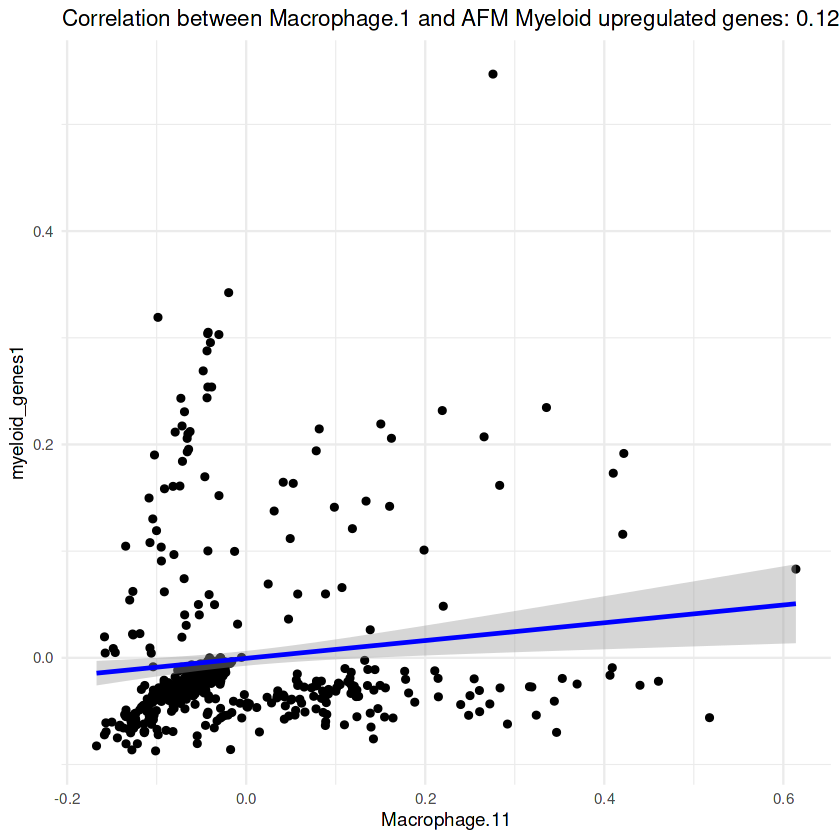

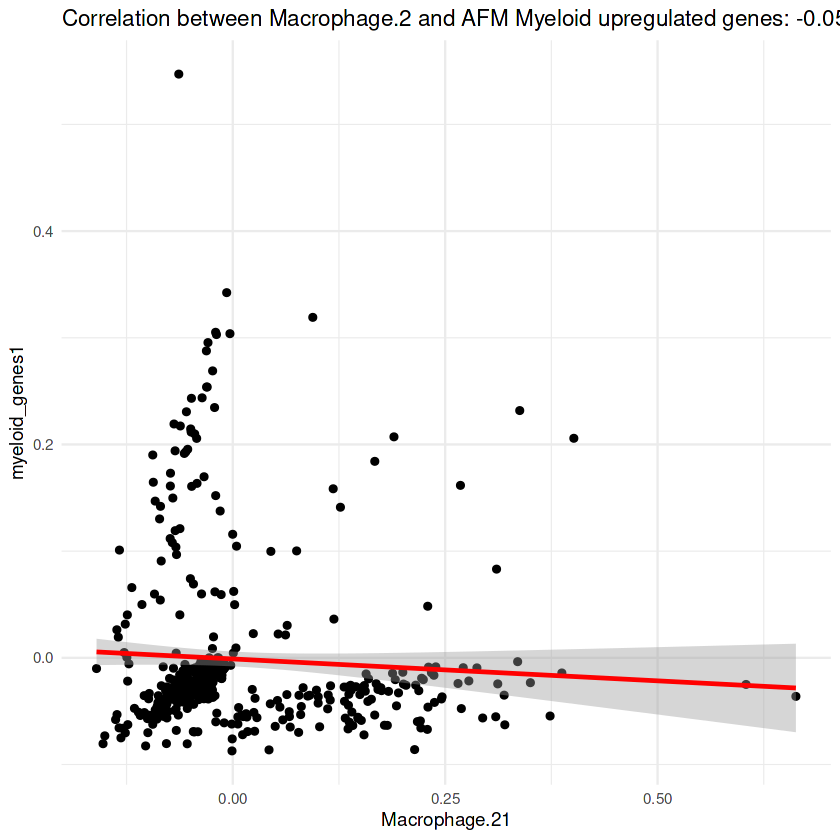

In [36]:
# Assuming your Seurat object is called 'seurat_obj'

# Extracting the relevant metadata columns
metadata <- myeloid@meta.data[, c("Macrophage.11", "Macrophage.21", "myeloid_genes1")]

# Calculating correlations
cor_mac11 <- cor(metadata$Macrophage.11, metadata$myeloid_genes1, use = "complete.obs")
cor_mac21 <- cor(metadata$Macrophage.21, metadata$myeloid_genes1, use = "complete.obs")

# Print correlations
print(paste("Correlation between Macrophage.11 and avAFM:", cor_mac11))
print(paste("Correlation between Macrophage.21 and avAFM:", cor_mac21))

# Plotting the correlations
library(ggplot2)

# Plot for Macrophage.11 vs avAFM
plot_mac11 <- ggplot(metadata, aes(x = Macrophage.11, y = myeloid_genes1)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  ggtitle(paste("Correlation between Macrophage.1 and AFM Myeloid upregulated genes:", round(cor_mac11, 3))) +
  theme_minimal()

# Plot for Macrophage.21 vs avAFM
plot_mac21 <- ggplot(metadata, aes(x = Macrophage.21, y = myeloid_genes1)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  ggtitle(paste("Correlation between Macrophage.2 and AFM Myeloid upregulated genes:", round(cor_mac21, 3))) +
  theme_minimal()

# Display the plots
print(plot_mac11)
print(plot_mac21)


Centering and scaling data matrix

PC_ 1 
Positive:  CEP128, ELMO1, IFNG-AS1, ARHGAP15, MAN1A1, DIAPH3, VOPP1, ST6GAL1, DOCK8, PLCG2 
	   MZB1, SETBP1, IKZF1, DOCK2, CD38, MEF2C, FLI1, TENT5C, TSHR, TCF4 
	   CYTIP, WNT5B, ADAM19, GLCCI1, POU2AF1, SMCHD1, SMAP2, CENPP, RIC1, PTPRC 
Negative:  MUC4, CEACAM6, IGFBP3, S100P, FGG, LRP5, S100A9, ERO1A, AKAP12, LGALS3BP 
	   NDRG1, AKR1B10, GCLC, CDH3, CPLX2, SFTPB, MUC16, PLOD2, RNASE1, PTGR1 
	   PHLDA2, EFNA1, AQP1, IGF2, TUBB3, CDH17, TNC, CXCL14, EGFR, CA2 
PC_ 2 
Positive:  GNGT1, GPC6, LINC02163, SRGAP1, FOXP2, AC079160.1, KYNU, AC138305.1, LINC01876, GRIP1 
	   POU6F2, MAML3, LAMA3, SLC7A11, MYO1E, CNTN1, DUXAP8, GRAMD1B, LINC01414, EXT1 
	   SYT1, IGSF1, ME1, LINC00534, PTPRM, AC099520.1, ST8SIA6, AC016831.7, CSGALNACT1, AC106799.2 
Negative:  HLA-B, TMSB4X, HLA-A, HLA-C, VIM, IGHG1, HLA-DRB5, B2M, IGKC, PTPRC 
	   APOE, IGKV1-5, IGHV4-39, CYBA, HLA-DQA1, LCP1, ARHGDIB, CD44, DOCK8, IGKV3-20 
	   CEACAM6, IGHV3-43, CXCL14, LAPTM5, C

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 504
Number of edges: 12457

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8610
Number of communities: 5
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:15:06 UMAP embedding parameters a = 0.9922 b = 1.112

15:15:06 Read 504 rows and found 10 numeric columns

15:15:06 Using Annoy for neighbor search, n_neighbors = 30

15:15:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:15:06 Writing NN index file to temp file /tmp/RtmpAnOTef/file4592e9cfae2

15:15:06 Searching Annoy index using 1 thread, search_k = 3000

15:15:06 Annoy recall = 100%

15:15:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 3

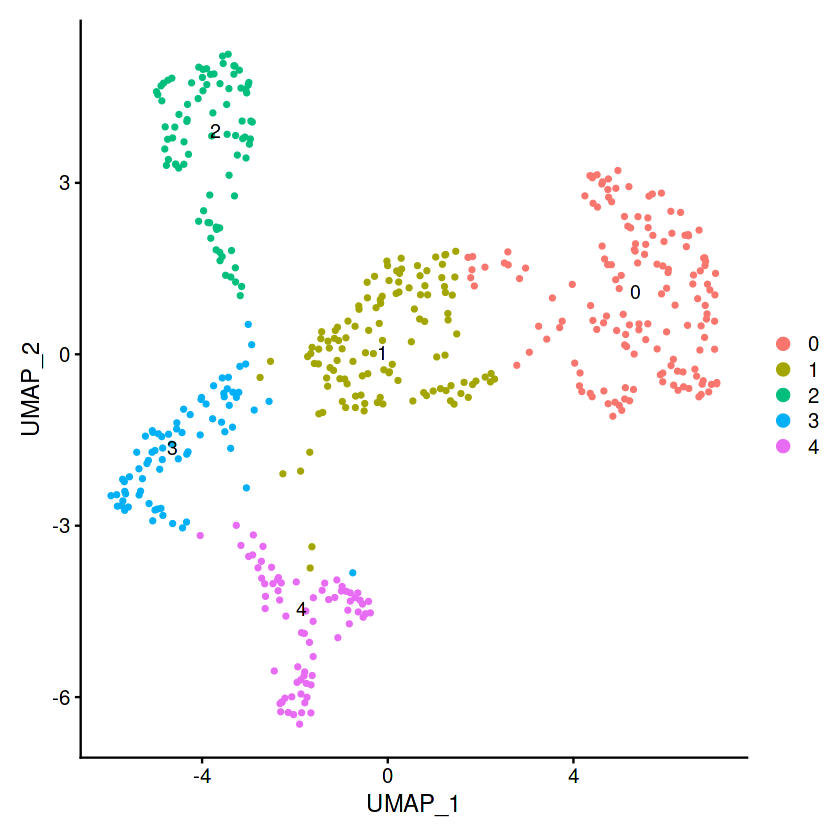

In [37]:
myeloid <- NormalizeData(myeloid)
myeloid <- FindVariableFeatures(myeloid)
myeloid <- ScaleData(myeloid)
myeloid <- RunPCA(myeloid)
myeloid <- FindNeighbors(myeloid, dims = 1:10)
myeloid <- FindClusters(myeloid, resolution = 0.5)
myeloid <- RunUMAP(myeloid, dims = 1:10)
DimPlot(myeloid, reduction = "umap", label = TRUE)


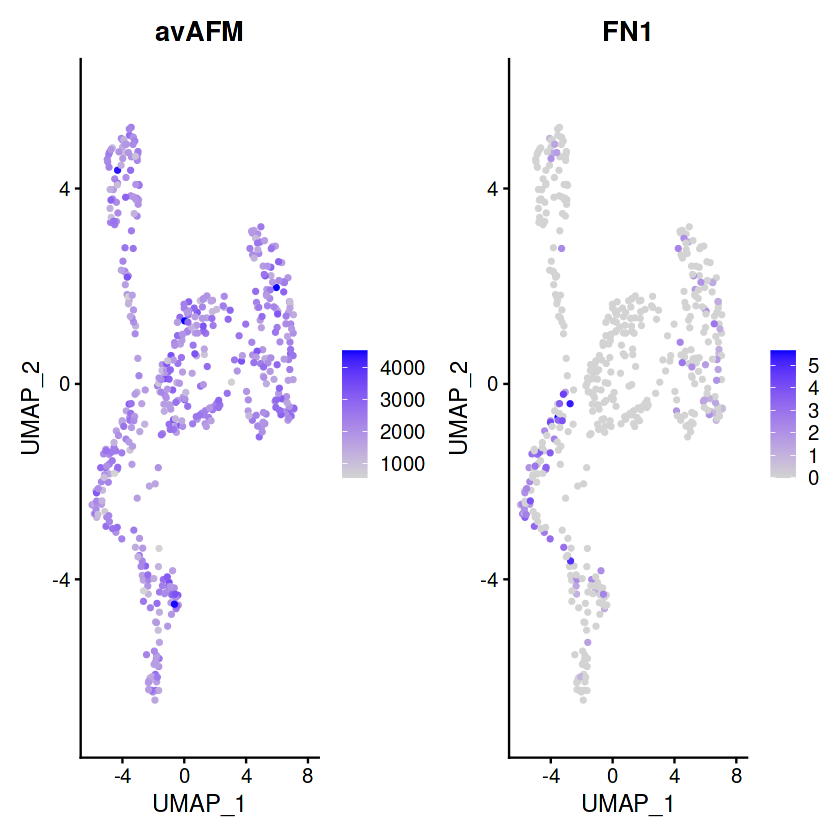

In [38]:
FeaturePlot(myeloid, c("avAFM",  "FN1"))

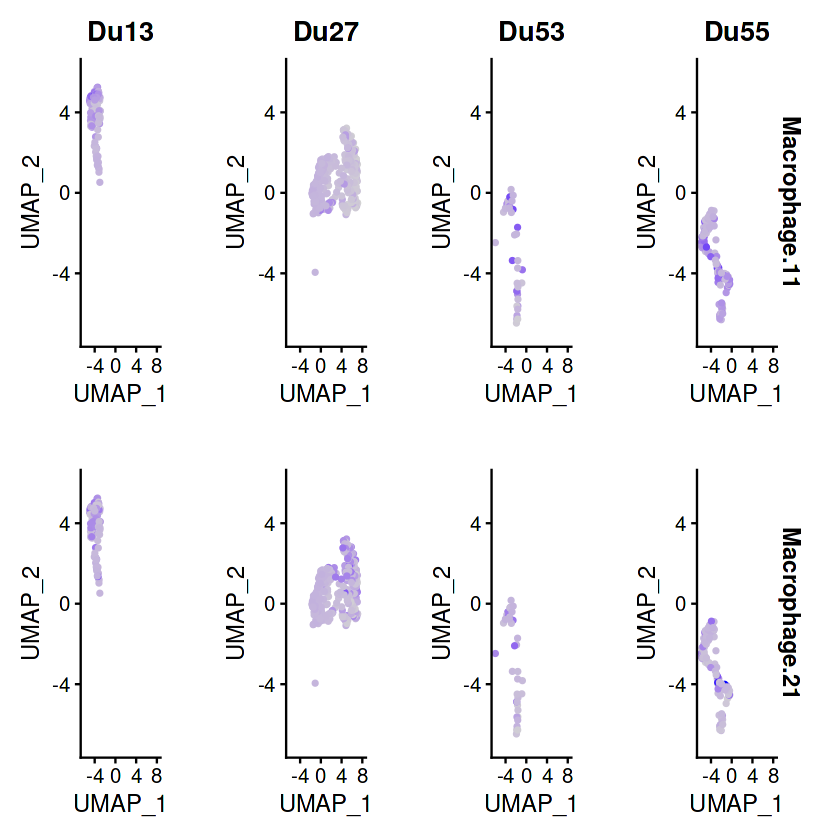

In [39]:
FeaturePlot(myeloid, c('Macrophage.11', 'Macrophage.21'), split.by = 'orig.ident')

Warning message in `[[.Seurat`(object, group.by):
“Cannot find the following bits of meta data: Quartile”


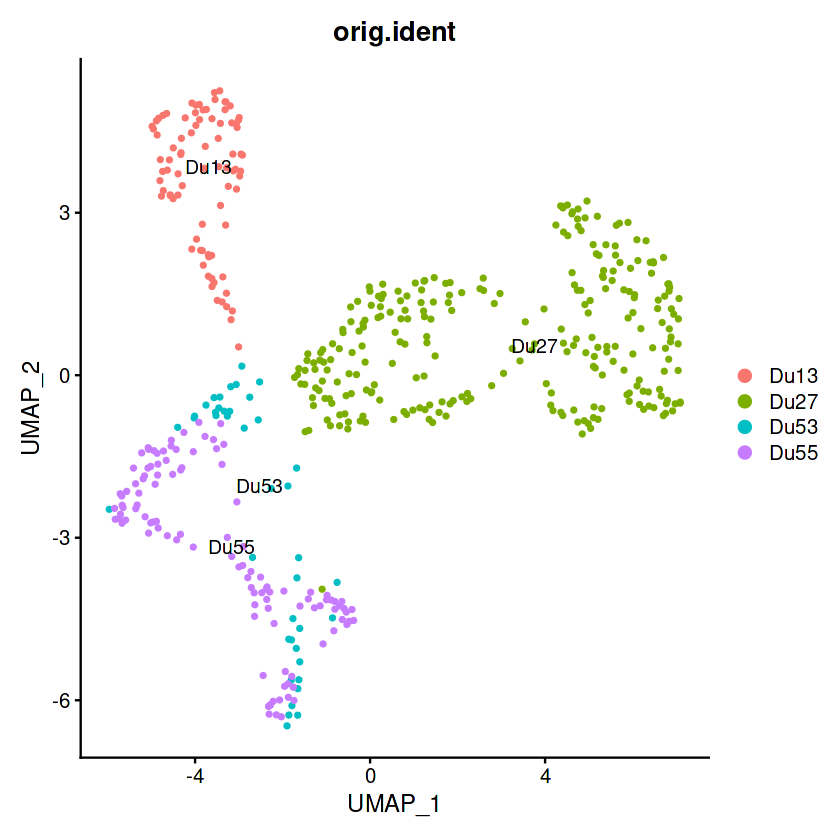

In [40]:
DimPlot(myeloid, reduction = "umap", label = TRUE, group.by = c('orig.ident', 'Quartile') )


orig.ident nCount_RNA nFeature_RNA percent.mt
Du13_AAGGAGCGTTGGTGGA-1 Du13       10405      3860         2.767900  
Du13_GATGCTAGTACCGCTG-1 Du13        9018      3709         5.489022  
Du13_TGACAACAGAGTGAGA-1 Du13        8499      3598         5.247676  
Du13_TCAGCTCGTATAATGG-1 Du13        8262      3445         4.829339  
Du13_GTGCAGCGTCCAACTA-1 Du13        8148      3670         2.822779  
Du13_CACACTCCATGGTTGT-1 Du13        6883      2990         6.813889  
                        percent.rps percent.rpl percent.rp predicted_doublets
Du13_AAGGAGCGTTGGTGGA-1 0.4517059   0.2691014   0.7208073  FALSE             
Du13_GATGCTAGTACCGCTG-1 0.3437569   0.1885119   0.5322688  FALSE             
Du13_TGACAACAGAGTGAGA-1 0.1882574   0.4941758   0.6824332  FALSE             
Du13_TCAGCTCGTATAATGG-1 0.3267974   0.2178649   0.5446623  FALSE             
Du13_GTGCAGCGTCCAACTA-1 0.4663721   0.4663721   0.9327442  FALSE             
Du13_CACACTCCATGGTTGT-1 0.2905710   0.1452855   0.4358565  FALSE             
                        doublet_scores nCount_SCT ⋯
Du13_AAGGAGCGTTGGTGGA-1 0.3824561      1203       ⋯
Du13_GATGCTAGTACCGCTG-1 0.2628726      1305       ⋯
Du13_TGACAACAGAGTGAGA-1 0.4732510      1288       ⋯
Du13_TCAGCTCGTATAATGG-1 0.4396887      1260       ⋯
Du13_GTGCAGCGTCCAACTA-1 0.3824561      1329       ⋯
Du13_CACACTCCATGGTTGT-1 0.4095941      1219       ⋯
                        Myeloid.derived.suppressor.cells1 Dendritic.cells1
Du13_AAGGAGCGTTGGTGGA-1  0.05767411                       0.29178171      
Du13_GATGCTAGTACCGCTG-1  0.39696316                       0.28286722      
Du13_TGACAACAGAGTGAGA-1 -0.08722483                       0.33031433      
Du13_TCAGCTCGTATAATGG-1 -0.09455687                       0.03519856      
Du13_GTGCAGCGTCCAACTA-1 -0.10868327                       0.33255460      
Du13_CACACTCCATGGTTGT-1  0.35250228                       0.13809433      
                        Migratory.DC1 Transitional.DC1 DC.precursor1
Du13_AAGGAGCGTTGGTGGA-1 -0.019082316  -0.02876471      -0.03130398  
Du13_GATGCTAGTACCGCTG-1 -0.006218028  -0.02920869      -0.02222258  
Du13_TGACAACAGAGTGAGA-1 -0.011090496  -0.01728394      -0.03418997  
Du13_TCAGCTCGTATAATGG-1 -0.010873187  -0.02655445      -0.04009698  
Du13_GTGCAGCGTCCAACTA-1 -0.017253946  -0.03904107      -0.03923882  
Du13_CACACTCCATGGTTGT-1 -0.011243258  -0.03641440      -0.02787588  
                        Granulocytes1 Neutrophils1
Du13_AAGGAGCGTTGGTGGA-1  0.22529078   -0.003367468
Du13_GATGCTAGTACCGCTG-1  0.18983521    0.000000000
Du13_TGACAACAGAGTGAGA-1 -0.06711372   -0.003888841
Du13_TCAGCTCGTATAATGG-1  0.06578433   -0.003965779
Du13_GTGCAGCGTCCAACTA-1  0.38962335   -0.006005909
Du13_CACACTCCATGGTTGT-1  0.10452815   -0.004486263
                        Neutrophil.myeloid.progenitor1
Du13_AAGGAGCGTTGGTGGA-1  0.000000000                  
Du13_GATGCTAGTACCGCTG-1  0.000000000                  
Du13_TGACAACAGAGTGAGA-1  0.000000000                  
Du13_TCAGCTCGTATAATGG-1  0.000000000                  
Du13_GTGCAGCGTCCAACTA-1 -0.001334646                  
Du13_CACACTCCATGGTTGT-1 -0.001495421                  
                        Intermediate.macrophages1 RNA_snn_res.0.5
Du13_AAGGAGCGTTGGTGGA-1  0.084551133              2              
Du13_GATGCTAGTACCGCTG-1 -0.006460288              2              
Du13_TGACAACAGAGTGAGA-1 -0.005611603              2              
Du13_TCAGCTCGTATAATGG-1 -0.005722624              2              
Du13_GTGCAGCGTCCAACTA-1 -0.011555380              2              
Du13_CACACTCCATGGTTGT-1  0.189455269              2

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 39 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



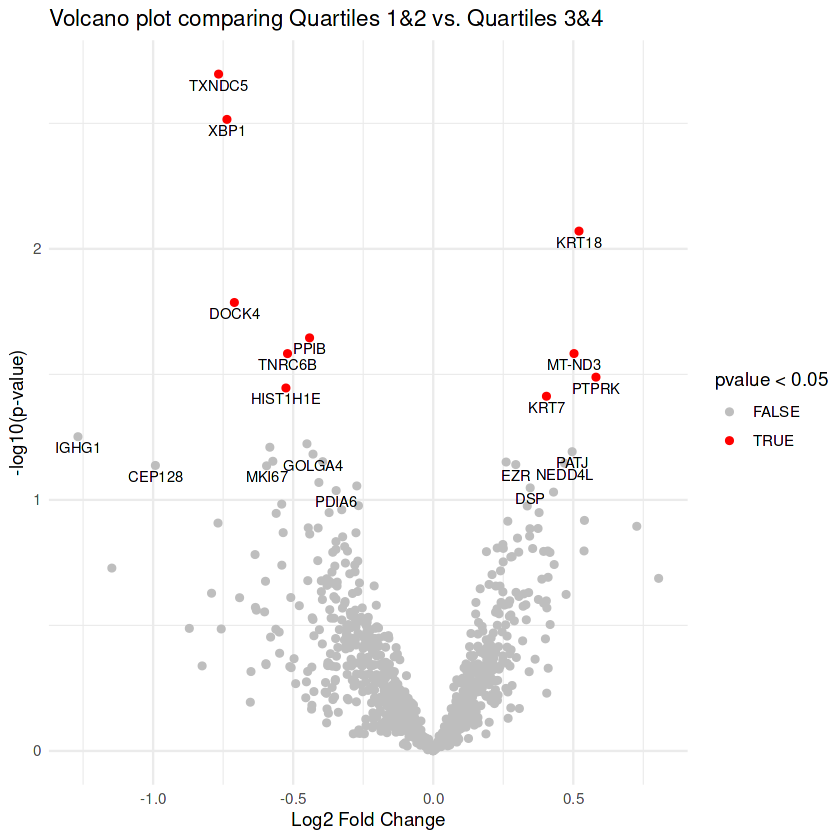

In [41]:
metadata <- myeloid@meta.data

metadata <- metadata %>%
  group_by(orig.ident) %>%
  mutate(Quartile = ntile(avAFM, 4))

# Put the updated metadata back into the Seurat object
#myeloid@meta.data <- metadata

# Optionally, check the updated metadata
head(myeloid@meta.data)
myeloid@meta.data$Quartile<- metadata$Quartile



# Create a new group column based on quartiles
metadata$group <- ifelse(metadata$Quartile %in% c(1, 2), 'Quartiles_1_2', 'Quartiles_3_4')

# Prepare the DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = metadata,
                              design = ~ group)

# Pre-filtering to speed up the analysis
keep <- rowSums(counts(dds) >= 10) >= 3
dds <- dds[keep,]

# Estimate size factors using positive counts only
dds <- estimateSizeFactors(dds, type='poscounts')

# Run DESeq
dds <- DESeq(dds)

# Extract results for the comparison between Quartiles 1&2 vs. Quartiles 3&4
results_data <- as.data.frame(results(dds, contrast=c("group", "Quartiles_3_4", "Quartiles_1_2")))

# Add gene names and transform p-values for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)

# Create a volcano plot
volcano_plot <- ggplot(results_data, aes(x=log2FoldChange, y=logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.10), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano plot comparing Quartiles 1&2 vs. Quartiles 3&4", x = "Log2 Fold Change", y = "-log10(p-value)")

# Print the plot
print(volcano_plot)


In [42]:
GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.1)
genes_f <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_afm_corr_subset")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.1)
genes_r <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_afm_corr_subset_neg")

In [44]:
myeloid@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mt
Du13_AAGGAGCGTTGGTGGA-1 Du13       10405      3860          2.767900 
Du13_GATGCTAGTACCGCTG-1 Du13        9018      3709          5.489022 
Du13_TGACAACAGAGTGAGA-1 Du13        8499      3598          5.247676 
Du13_TCAGCTCGTATAATGG-1 Du13        8262      3445          4.829339 
Du13_GTGCAGCGTCCAACTA-1 Du13        8148      3670          2.822779 
Du13_CACACTCCATGGTTGT-1 Du13        6883      2990          6.813889 
Du13_TTGCGTCCATGAACCT-1 Du13        6474      3032          3.722583 
Du13_ATCTGCCTCATCGATG-1 Du13        6059      2846          8.730814 
Du13_TCGGGACGTTAAGAAC-1 Du13        5531      2677          8.786838 
Du13_TCAGATGGTCCCTACT-1 Du13        5441      2764          6.506157 
Du13_CGGAGCTTCGTTGCCT-1 Du13        5418      2510         10.317460 
Du13_TACGGGCAGACGCAAC-1 Du13        5244      2389         17.028986 
Du13_TCGAGGCTCTGCGACG-1 Du13        4889      2383          6.606668 
Du13_GACTACATCACCTTAT-1 Du13        4751      2565          4.883182 
Du13_CCTAAAGAGTGTACGG-1 Du13        4744      2617          4.384486 
Du13_CAAGATCGTGGAAAGA-1 Du13        4310      2267          6.658933 
Du13_GTCATTTAGGTAAACT-1 Du13        4291      2194          5.942671 
Du13_ACCAGTACATTCTTAC-1 Du13        4156      2131          4.980751 
Du13_CACCTTGAGATAGTCA-1 Du13        3908      2035          8.853634 
Du13_CATCAAGCATGGTAGG-1 Du13        3793      1873          3.901925 
Du13_ATTGGTGCATCCGCGA-1 Du13        3578      1858          6.316378 
Du13_CAAGGCCGTCCAGTTA-1 Du13        3565      1804         15.007013 
Du13_CTTACCGTCACTTCAT-1 Du13        3126      1789          2.879079 
Du13_GGTGCGTTCTCTTGAT-1 Du13        3114      1677          1.188182 
Du13_CCTAAAGGTCTAGGTT-1 Du13        3107      1606         15.803025 
Du13_ACGGCCATCAGCTCTC-1 Du13        2951      1609          2.033209 
Du13_CCACCTATCATCTGCC-1 Du13        2752      1534         10.574128 
Du13_CACACTCTCCCTTGTG-1 Du13        2674      1402         15.931189 
Du13_GTGCATAAGACACTAA-1 Du13        2667      1518          7.161605 
Du13_AAAGTAGCAGGATTGG-1 Du13        2325      1503          1.419355 
⋮                       ⋮          ⋮          ⋮            ⋮         
Du27_AGGTCATTCTCAAACG-1 Du27       376        259          13.5638298
Du27_CGTAGGCAGATGTGTA-1 Du27       458        283           3.9301310
Du27_GTATTCTGTCCAGTAT-1 Du27       441        235          29.7052154
Du27_AGTAGTCCAGTTAACC-1 Du27       540        427           4.8148148
Du27_GGATTACAGCTCCTCT-1 Du27       496        363           2.8225806
Du27_CGATCGGAGATACACA-1 Du27       587        471          10.3918228
Du27_TGGTTCCCAAAGCAAT-1 Du27       371        253          22.6415094
Du27_GCATACACAGCTGGCT-1 Du27       543        345          21.1786372
Du27_ACGATGTTCGGTCTAA-1 Du27       325        218          24.0000000
Du27_CGTCAGGGTTCAGCGC-1 Du27       406        240          27.5862069
Du27_CACAGTATCAAGATCC-1 Du27       422        331           4.9763033
Du27_GTTCATTAGCCCGAAA-1 Du27       433        231          32.3325635
Du27_GCTGCAGTCGTACGGC-1 Du27       483        345          12.2153209
Du27_CTTTGCGGTTACTGAC-1 Du27       495        407           2.2222222
Du27_ACACTGACAGATCCAT-1 Du27       675        555           3.8518519
Du27_CGTCCATGTGCTGTAT-1 Du27       533        405           1.6885553
Du27_AGGTCCGTCGTGGACC-1 Du27       513        279          40.1559454
Du27_GGCAATTCATACAGCT-1 Du27       363        300           7.1625344
Du27_CAGCGACGTCTCTCTG-1 Du27       489        317           7.9754601
Du27_TTGGAACGTAAGTTCC-1 Du27       326        227          16.2576687
Du27_CACAAACCAGTGACAG-1 Du27       473        297          11.6279070
Du27_TCGCGTTTCGACCAGC-1 Du27       432        344           0.9259259
Du27_TGAAAGAGTGCCTGCA-1 Du27       424        261          30.1886792
Du27_TCTATTGGTTACCGAT-1 Du27       465        258          34.1935484
Du27_TGAGGGAAGGATGTAT-1 Du27       502        345          17.3306773
Du27_CGAATGTGTCCAGTGC-1 Du27      

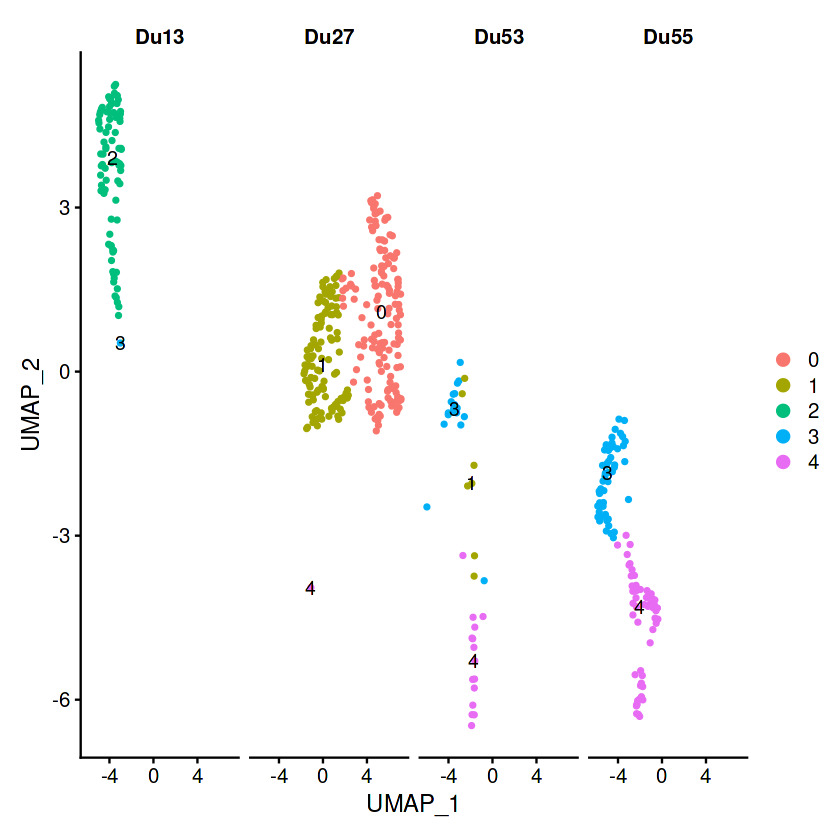

In [45]:
DimPlot(myeloid, reduction = "umap", label = TRUE, split.by = 'orig.ident' )


[1] "Correlation between Macrophage.11 and avAFM: -0.2057857792007"
[1] "Correlation between Macrophage.21 and avAFM: 0.0732847657606085"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


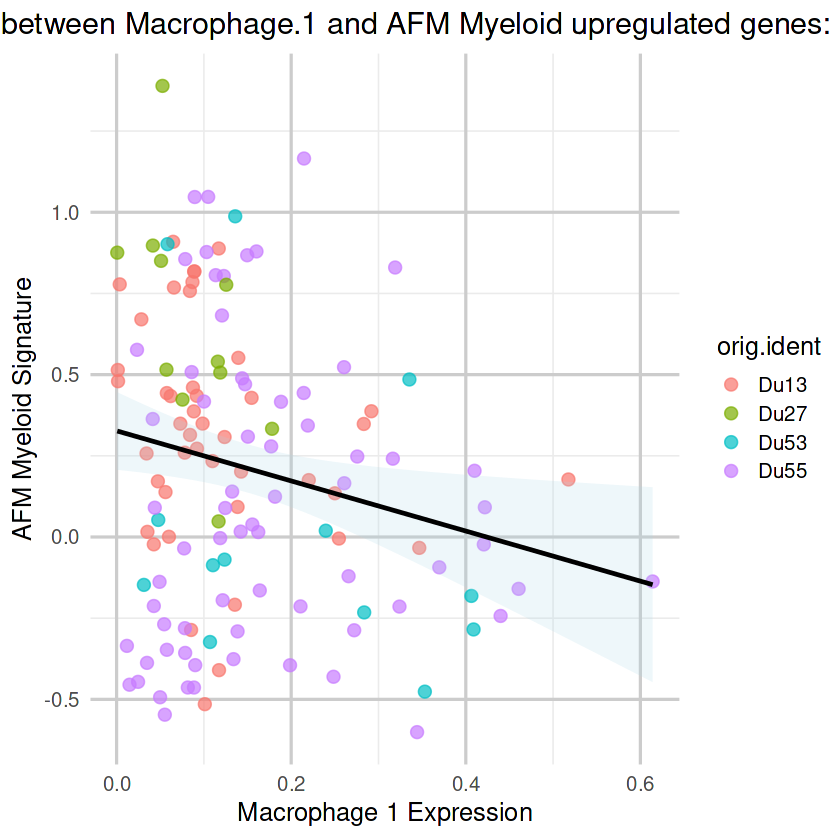

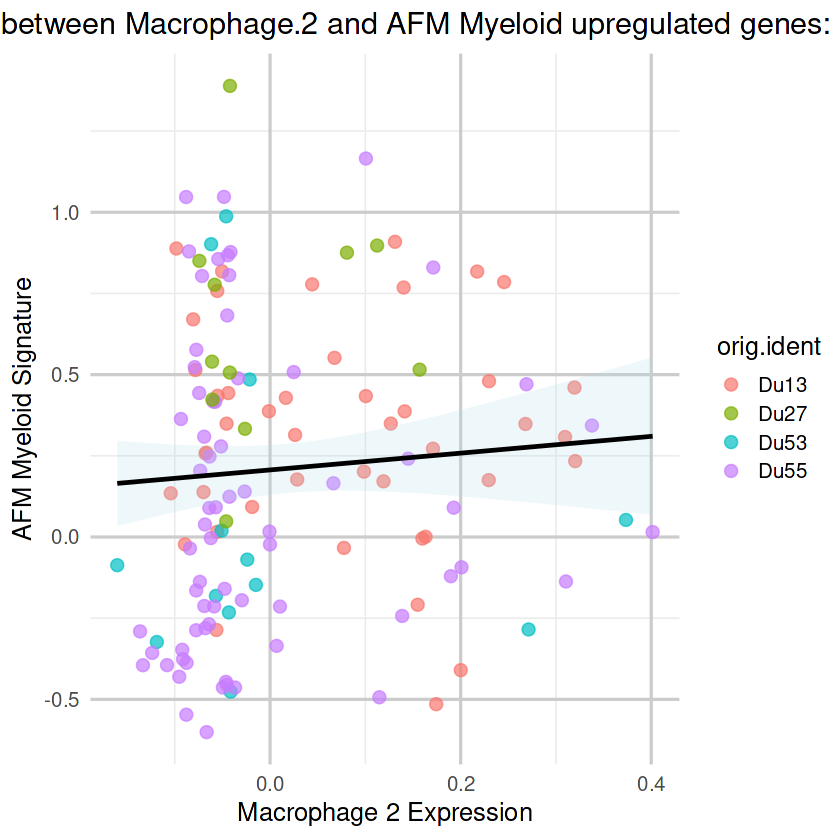

In [61]:
# Assuming your Seurat object is called 'seurat_obj'

# Extracting the relevant metadata columns
metadata <- myeloid@meta.data[, c('orig.ident',"Macrophage.11", "Macrophage.21", "myeloid_signature_afm_corr_subset1")]
metadata <- metadata[metadata$Macrophage.11 >0.0, ]

# Calculating correlations
cor_mac11 <- cor(metadata$Macrophage.11, metadata$myeloid_signature_afm_corr_subset1, use = "complete.obs")
cor_mac21 <- cor(metadata$Macrophage.21, metadata$myeloid_signature_afm_corr_subset1, use = "complete.obs")

# Print correlations
print(paste("Correlation between Macrophage.11 and avAFM:", cor_mac11))
print(paste("Correlation between Macrophage.21 and avAFM:", cor_mac21))

# Plotting the correlations
# Required libraries
library(ggplot2)

# Set a better color palette
color_mac11 <- "#1f78b4" # A soft blue
color_mac21 <- "#33a02c" # A soft green



plot_mac11 <- ggplot(metadata, aes(x = Macrophage.11, y = myeloid_signature_afm_corr_subset1, color = orig.ident)) +
  geom_point(size = 3, alpha = 0.7) +  # Larger points, slight transparency
  geom_smooth(method = "lm", col = "black", fill = "lightblue", alpha = 0.2) +  # Use a neutral color for the regression line
  ggtitle(paste("Correlation between Macrophage.1 and AFM Myeloid upregulated genes:", round(cor_mac11, 3))) +
  xlab("Macrophage 1 Expression") +  # More descriptive axis labels
  ylab("AFM Myeloid Signature") +
  theme_minimal(base_size = 15) +  # Slightly larger base text size for better readability
  theme(plot.title = element_text(hjust = 0.5),  # Center the title
        panel.grid.major = element_line(color = "grey80"))  

plot_mac21 <- ggplot(metadata, aes(x = Macrophage.21, y = myeloid_signature_afm_corr_subset1, color = orig.ident)) +
  geom_point(size = 3, alpha = 0.7) +  # Larger points, slight transparency
  geom_smooth(method = "lm", col = "black", fill = "lightblue", alpha = 0.2) +  # Use a neutral color for the regression line
  ggtitle(paste("Correlation between Macrophage.2 and AFM Myeloid upregulated genes:", round(cor_mac11, 3))) +
  xlab("Macrophage 2 Expression") +  # More descriptive axis labels
  ylab("AFM Myeloid Signature") +
  theme_minimal(base_size = 15) +  # Slightly larger base text size for better readability
  theme(plot.title = element_text(hjust = 0.5),  # Center the title
        panel.grid.major = element_line(color = "grey80"))  


# Display the plots
print(plot_mac11)
print(plot_mac21)


[1] "Correlation between Macrophage.11 and avAFM: 0.326320354008102"
[1] "Correlation between Macrophage.21 and avAFM: 0.111218074783403"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


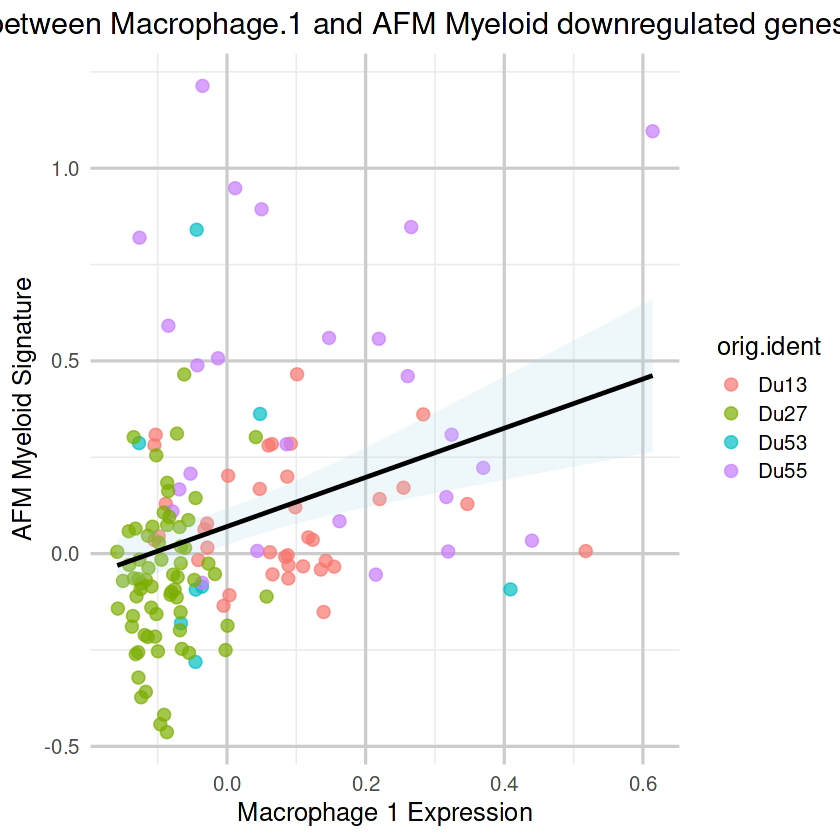

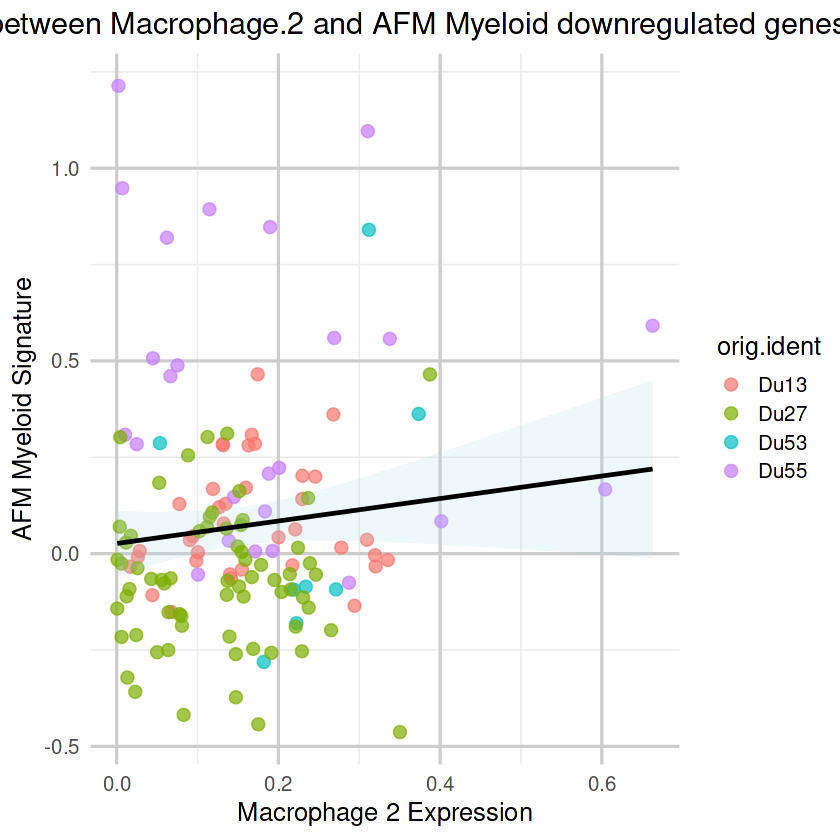

In [109]:
# Assuming your Seurat object is called 'seurat_obj'

# Extracting the relevant metadata columns
metadata <- myeloid@meta.data[, c('orig.ident',"Macrophage.11", "Macrophage.21", "myeloid_signature_afm_corr_subset_neg1")]
metadata <- metadata[metadata$Macrophage.21 >0.0, ]

# Calculating correlations
cor_mac11 <- cor(metadata$Macrophage.11, metadata$myeloid_signature_afm_corr_subset_neg1, use = "complete.obs")
cor_mac21 <- cor(metadata$Macrophage.21, metadata$myeloid_signature_afm_corr_subset_neg1, use = "complete.obs")

# Print correlations
print(paste("Correlation between Macrophage.11 and avAFM:", cor_mac11))
print(paste("Correlation between Macrophage.21 and avAFM:", cor_mac21))

# Plotting the correlations
library(ggplot2)

# Set a better color palette
color_mac11 <- "#1f78b4" # A soft blue
color_mac21 <- "#33a02c" # A soft green

# Plot for Macrophage.11 vs avAFM
plot_mac11 <- ggplot(metadata, aes(x = Macrophage.11, y = myeloid_signature_afm_corr_subset_neg1, color = orig.ident)) +
  geom_point(size = 3, alpha = 0.7) +  # Larger points, slight transparency
  geom_smooth(method = "lm", col = "black", fill = "lightblue", alpha = 0.2) +  # Use a neutral color for the regression line
  ggtitle(paste("Correlation between Macrophage.1 and AFM Myeloid downregulated genes:", round(cor_mac11, 3))) +
  xlab("Macrophage 1 Expression") +  # More descriptive axis labels
  ylab("AFM Myeloid Signature") +
  theme_minimal(base_size = 15) +  # Slightly larger base text size for better readability
  theme(plot.title = element_text(hjust = 0.5),  # Center the title
        panel.grid.major = element_line(color = "grey80"))  


plot_mac21 <- ggplot(metadata, aes(x = Macrophage.21, y = myeloid_signature_afm_corr_subset_neg1, color = orig.ident)) +
  geom_point(size = 3, alpha = 0.7) +  # Larger points, slight transparency
  geom_smooth(method = "lm", col = "black", fill = "lightblue", alpha = 0.2) +  # Use a neutral color for the regression line
  ggtitle(paste("Correlation between Macrophage.2 and AFM Myeloid downregulated genes:", round(cor_mac11, 3))) +
  xlab("Macrophage 2 Expression") +  # More descriptive axis labels
  ylab("AFM Myeloid Signature") +
  theme_minimal(base_size = 15) +  # Slightly larger base text size for better readability
  theme(plot.title = element_text(hjust = 0.5),  # Center the title
        panel.grid.major = element_line(color = "grey80"))  

# Display the plots
print(plot_mac11)
print(plot_mac21)



Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


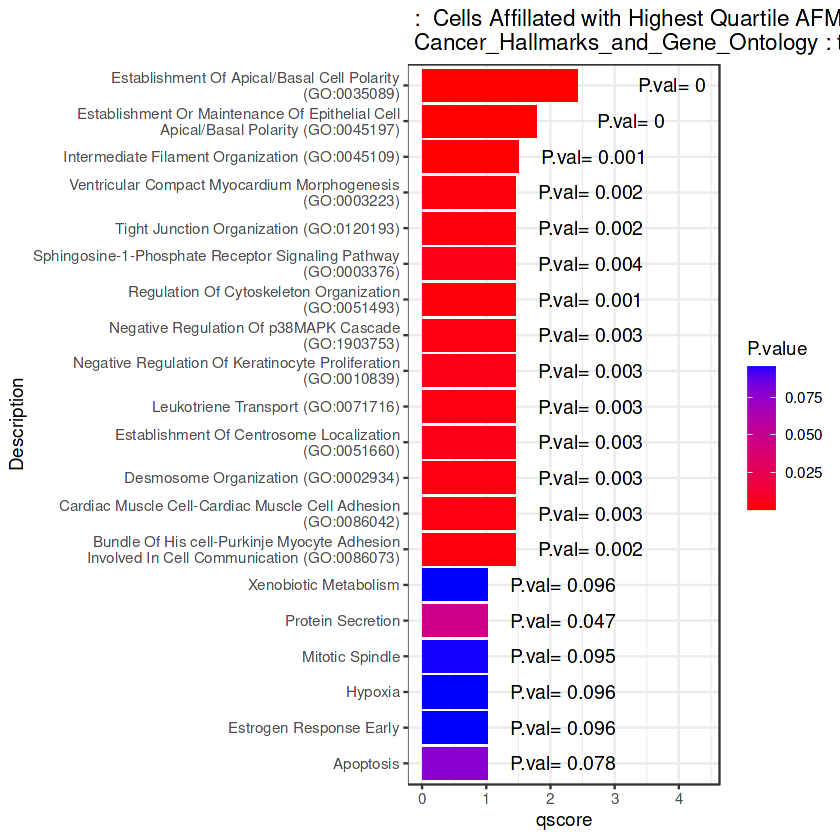

In [48]:
GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.10)

genes <- genes_f

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
#mut_enr <- subset(mut_enr, P.value	 < 0.05 & qscore > 5)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:20,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
myggp

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


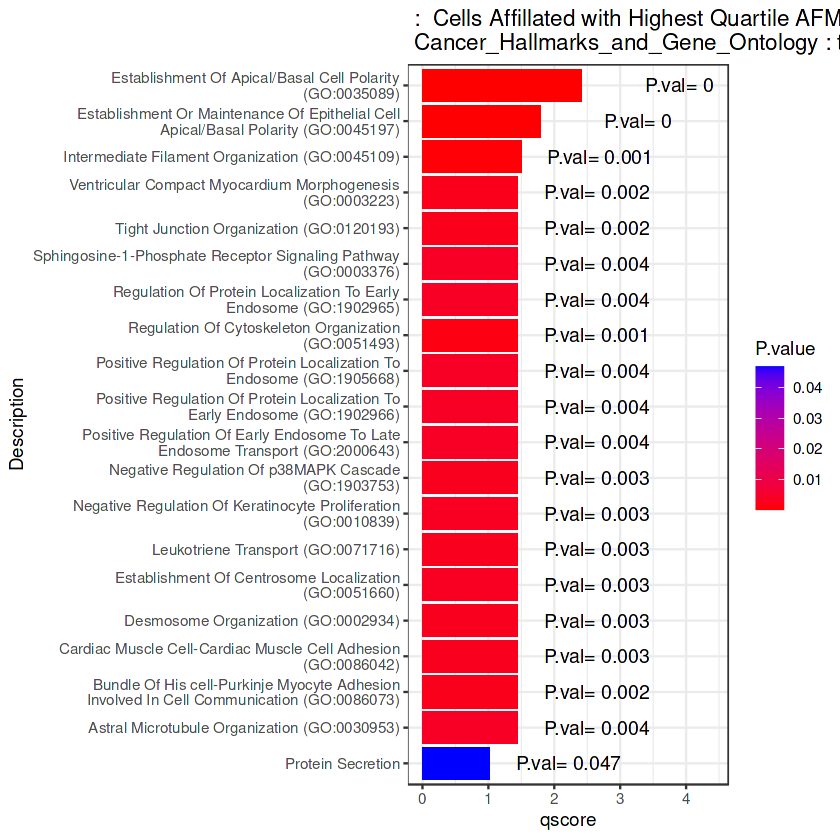

In [49]:
genes <- genes_r

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- subset(mut_enr, P.value	 < 0.05 & qscore > 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:20,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
myggp


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




orig.ident avAFM    Macrophage.11 Macrophage.21
1 Du13       2169.182 0.10977584     0.32021929  
2 Du13       2523.601 0.13944342     0.06762133  
3 Du13       2742.805 0.08849064     0.14125237  
4 Du13       1067.616 0.09852216     0.12672883  
5 Du13       2456.518 0.34671416     0.07753199  
6 Du13       2135.024 0.13856793    -0.01878479  
  myeloid_signature_afm_corr_subset1 myeloid_signature_afm_corr_subset_neg1
1  0.2337276                         -0.03295945                           
2  0.5517167                         -0.15140678                           
3  0.3868633                         -0.06448509                           
4  0.3492143                          0.12043025                           
5 -0.0335161                          0.12887459                           
6  0.0925390                         -0.07105769                           
  avAFM_scaled
1 0.4074480   
2 0.5029744   
3 0.5620563   
4 0.1105435   
5 0.4848934   
6 0.3982414

[1] "For orig.ident: Du13 - Correlation between Macrophage.11 and AFM: 0.012"
[1] "For orig.ident: Du13 - Correlation between Macrophage.21 and AFM: 0.148"


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


[1] "For orig.ident: Du27 - Correlation between Macrophage.11 and AFM: 0.12"
[1] "For orig.ident: Du27 - Correlation between Macrophage.21 and AFM: -0.073"
[1] "For orig.ident: Du53 - Correlation between Macrophage.11 and AFM: -0.169"
[1] "For orig.ident: Du53 - Correlation between Macrophage.21 and AFM: -0.115"
[1] "For orig.ident: Du55 - Correlation between Macrophage.11 and AFM: -0.099"
[1] "For orig.ident: Du55 - Correlation between Macrophage.21 and AFM: -0.152"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


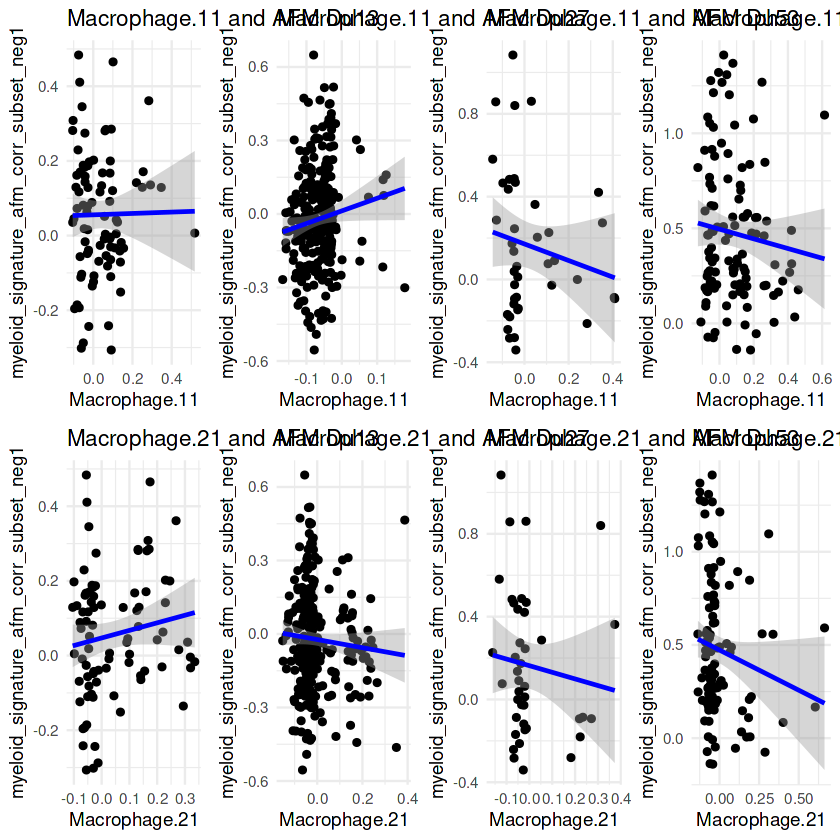

In [50]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(gridExtra)
library(dplyr)
library(scales)
# Function to plot for each orig.ident group
plot_correlation_by_ident <- function(df, macrophage_column, afm_column, title_prefix) {
  ggplot(df, aes_string(x = macrophage_column, y = afm_column)) +
    geom_point() +
    geom_smooth(method = "lm", col = "blue") +
    ggtitle(paste(title_prefix, df$orig.ident[1])) +
    theme_minimal()
}

# Extract the relevant metadata columns, including orig.ident
metadata <- myeloid@meta.data[, c("orig.ident","avAFM" ,"Macrophage.11", "Macrophage.21", "myeloid_signature_afm_corr_subset1", "myeloid_signature_afm_corr_subset_neg1")]
# Load necessary libraries


# Create a new column with scaled 'avAFM' values for each unique 'orig.ident'
metadata <- metadata %>%
  group_by(orig.ident) %>%
  mutate(avAFM_scaled = rescale(avAFM, to = c(0, 1)))

# Ungroup the data to return to the original structure
metadata <- ungroup(metadata)

# View the updated metadata
head(metadata)

# Split the data by unique orig.ident values
split_data <- split(metadata, metadata$orig.ident)

# Create separate lists to store Macrophage.11 and Macrophage.21 plots
plot_mac11_list <- list()
plot_mac21_list <- list()

# Loop through each unique orig.ident and create the plots
for (ident in names(split_data)) {
  df <- split_data[[ident]]
  
  # Calculate correlation for Macrophage.11
  cor_mac11 <- cor(df$Macrophage.11, df$myeloid_signature_afm_corr_subset_neg1, use = "complete.obs")
  
  # Calculate correlation for Macrophage.21
  cor_mac21 <- cor(df$Macrophage.21, df$myeloid_signature_afm_corr_subset_neg1, use = "complete.obs")
  
  # Print the correlations
  print(paste("For orig.ident:", ident, "- Correlation between Macrophage.11 and AFM:", round(cor_mac11, 3)))
  print(paste("For orig.ident:", ident, "- Correlation between Macrophage.21 and AFM:", round(cor_mac21, 3)))
  
  # Plot for Macrophage.11 vs AFM
  plot_mac11 <- plot_correlation_by_ident(df, "Macrophage.11", "myeloid_signature_afm_corr_subset_neg1", "Macrophage.11 and AFM")
  
  # Plot for Macrophage.21 vs AFM
  plot_mac21 <- plot_correlation_by_ident(df, "Macrophage.21", "myeloid_signature_afm_corr_subset_neg1", "Macrophage.21 and AFM")
  
  # Add the plots to their respective lists
  plot_mac11_list <- append(plot_mac11_list, list(plot_mac11))
  plot_mac21_list <- append(plot_mac21_list, list(plot_mac21))
}

# Arrange the plots with Macrophage.21 on top and Macrophage.11 on the bottom
grid.arrange(grobs = c(plot_mac11_list, plot_mac21_list ), nrow = 2, ncol = 4)


[1] "For orig.ident: Du13 - Correlation between Macrophage.11 and AFM: 0.092"
[1] "For orig.ident: Du13 - Correlation between Macrophage.21 and AFM: 0.015"
[1] "For orig.ident: Du27 - Correlation between Macrophage.11 and AFM: 0.094"
[1] "For orig.ident: Du27 - Correlation between Macrophage.21 and AFM: 0.038"
[1] "For orig.ident: Du53 - Correlation between Macrophage.11 and AFM: -0.113"
[1] "For orig.ident: Du53 - Correlation between Macrophage.21 and AFM: 0.137"
[1] "For orig.ident: Du55 - Correlation between Macrophage.11 and AFM: -0.052"
[1] "For orig.ident: Du55 - Correlation between Macrophage.21 and AFM: 0.027"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


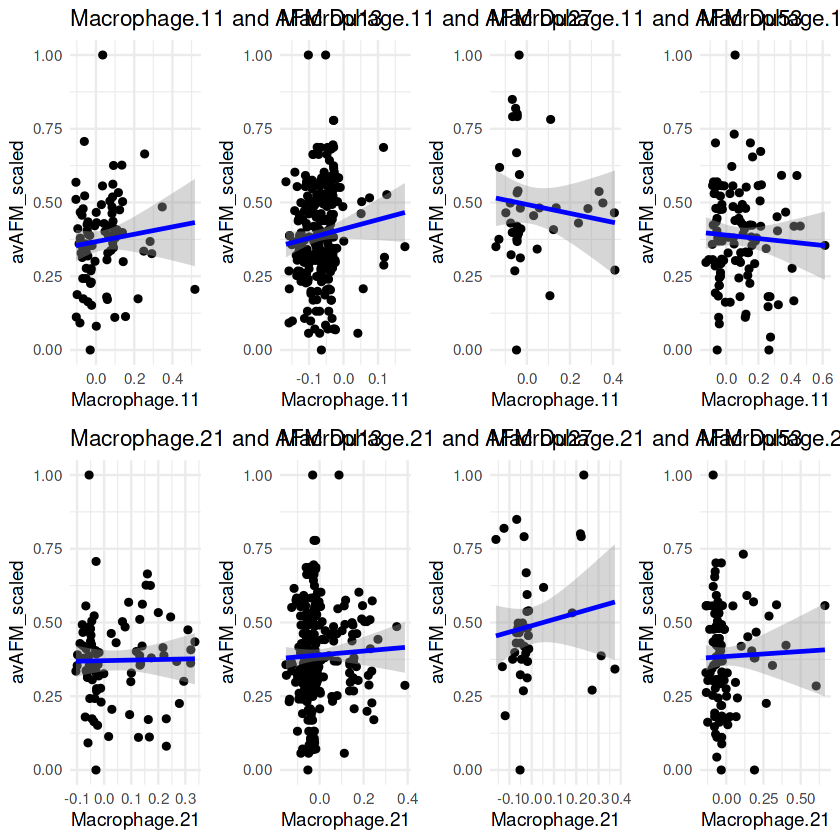

In [51]:

# Create separate lists to store Macrophage.11 and Macrophage.21 plots
plot_mac11_list <- list()
plot_mac21_list <- list()
# Loop through each unique orig.ident and create the plots
for (ident in names(split_data)) {
  df <- split_data[[ident]]
  
  # Calculate correlation for Macrophage.11
  cor_mac11 <- cor(df$Macrophage.11, df$avAFM_scaled, use = "complete.obs")
  
  # Calculate correlation for Macrophage.21
  cor_mac21 <- cor(df$Macrophage.21, df$avAFM_scaled, use = "complete.obs")
  
  # Print the correlations
  print(paste("For orig.ident:", ident, "- Correlation between Macrophage.11 and AFM:", round(cor_mac11, 3)))
  print(paste("For orig.ident:", ident, "- Correlation between Macrophage.21 and AFM:", round(cor_mac21, 3)))
  
  # Plot for Macrophage.11 vs AFM
  plot_mac11 <- plot_correlation_by_ident(df, "Macrophage.11", "avAFM_scaled", "Macrophage.11 and AFM")
  
  # Plot for Macrophage.21 vs AFM
  plot_mac21 <- plot_correlation_by_ident(df, "Macrophage.21", "avAFM_scaled", "Macrophage.21 and AFM")
  
  # Add the plots to their respective lists
  plot_mac11_list <- append(plot_mac11_list, list(plot_mac11))
  plot_mac21_list <- append(plot_mac21_list, list(plot_mac21))
}

# Arrange the plots with Macrophage.21 on top and Macrophage.11 on the bottom
grid.arrange(grobs = c(plot_mac11_list, plot_mac21_list ), nrow = 2, ncol = 4)

[1] "Correlation between Macrophage.11 and avAFM: 0.00714976193921687"
[1] "Correlation between Macrophage.21 and avAFM: 0.0335384031947766"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


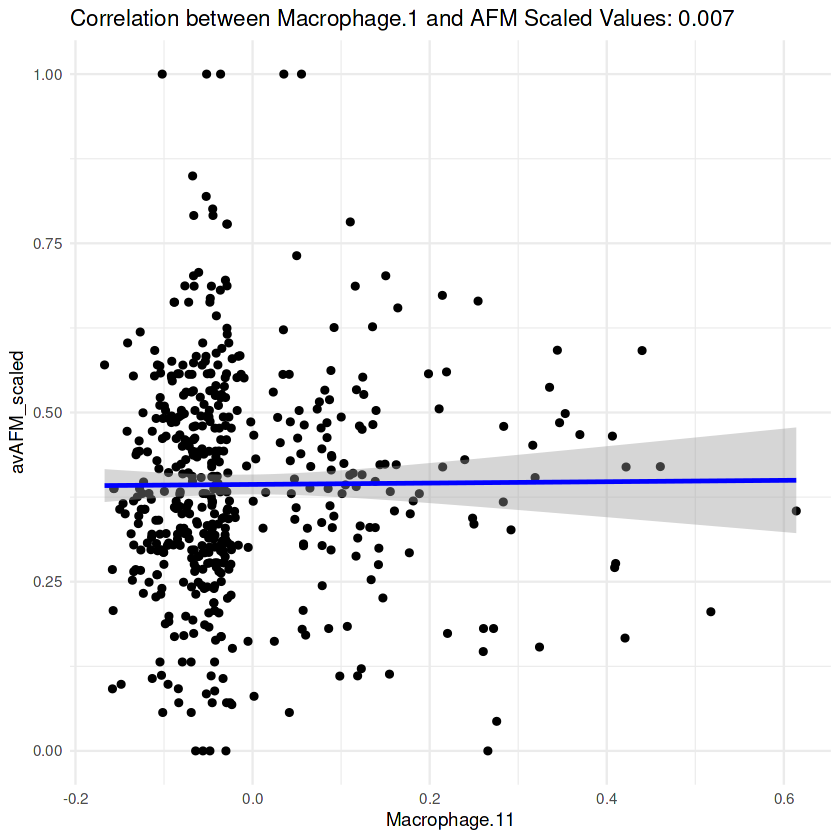

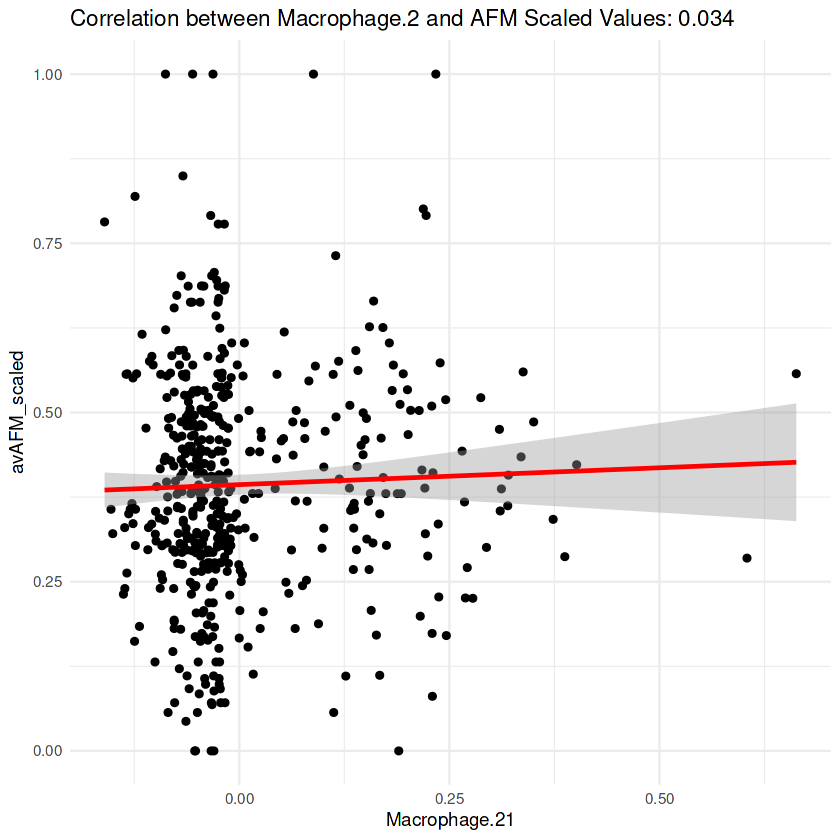

In [52]:
# Calculating correlations
cor_mac11 <- cor(metadata$Macrophage.11, metadata$avAFM_scaled, use = "complete.obs")
cor_mac21 <- cor(metadata$Macrophage.21, metadata$avAFM_scaled, use = "complete.obs")

# Print correlations
print(paste("Correlation between Macrophage.11 and avAFM:", cor_mac11))
print(paste("Correlation between Macrophage.21 and avAFM:", cor_mac21))

# Plotting the correlations
library(ggplot2)

# Plot for Macrophage.11 vs avAFM
plot_mac11 <- ggplot(metadata, aes(x = Macrophage.11, y = avAFM_scaled)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  ggtitle(paste("Correlation between Macrophage.1 and AFM Scaled Values:", round(cor_mac11, 3))) +
  theme_minimal()

# Plot for Macrophage.21 vs avAFM
plot_mac21 <- ggplot(metadata, aes(x = Macrophage.21, y = avAFM_scaled)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  ggtitle(paste("Correlation between Macrophage.2 and AFM Scaled Values:", round(cor_mac21, 3))) +
  theme_minimal()

# Display the plots
print(plot_mac11)
print(plot_mac21)

In [78]:
unique(durva_annotated@meta.data$orig.ident)
durva_annotated@meta.data
'Du13_AAGGAGCGTTGGTGGA-1' %in% rownames(durva_annotated@meta.data)

[1] "Du1_2"  "Du10"   "Du12"   "Du13"   "Du15"   "Du17_2" "Du18"   "Du20"  
 [9] "Du21"   "Du2"    "Du30"   "Du32"   "Du33"   "Du34"   "Du35"   "Du6"   
[17] "Du7"    "Du8"    "Du51"   "Du52"   "Du53"   "Du54"   "Du55"   "Du57"  
[25] "Du28"   "Du29"   "Du37"   "Du27"   "Du38"   "Du39"   "Du3"    "Du42"  
[33] "Du46"   "Du45"   "Du47"   "Du44"   "Du4"    "Du64_2" "Du23_1" "Du26"  
[41] "Du23_2"

orig.ident nCount_RNA nFeature_RNA percent.mt 
Du1_2_GGCTCGAAGCCAGGAT-1  Du1_2      21854      5898          3.9537633 
Du1_2_TCGCGAGCAACACGCC-1  Du1_2      14014      4409          4.2826408 
Du1_2_ACACCAACAGACGCAA-1  Du1_2      12604      4114          6.7649226 
Du1_2_GCAGCCACATGCATGT-1  Du1_2      11262      3927          8.0093942 
Du1_2_CCACTACCAAACAACA-1  Du1_2       9845      3275          2.7497527 
Du1_2_GGACGTCCATCCTTGC-1  Du1_2       9296      3686          1.4000849 
Du1_2_TTAGGCAAGACTGTAA-1  Du1_2       8275      3387          4.8195523 
Du1_2_AGGTCATAGCCTCGTG-1  Du1_2       8076      3218          5.0604673 
Du1_2_GACGGCTGTCAAGCGA-1  Du1_2       7922      3034          2.0655535 
Du1_2_ATCATCTGTGTTGGGA-1  Du1_2       7662      3230          2.9292929 
Du1_2_CGGAGCTTCGGCTTGG-1  Du1_2       7709      2647          1.1665171 
Du1_2_TCCACACGTCAATGTC-1  Du1_2       6566      3097         13.5841170 
Du1_2_CGGAGCTAGGTGTTAA-1  Du1_2       7395      2993          1.8331562 
Du1_2_CCTTACGAGTCTCGGC-1  Du1_2       6978      2953          5.3712905 
Du1_2_ACAGCTATCGTAGATC-1  Du1_2       6924      3114          5.5055874 
Du1_2_AGTCTTTGTCGCCATG-1  Du1_2       6534      2941          5.4733515 
Du1_2_CGAGAAGCATTCGACA-1  Du1_2       6947      3056          0.1437815 
Du1_2_ACTGATGCAAACGTGG-1  Du1_2       6608      2663          3.7705634 
Du1_2_GAAGCAGCATGTAAGA-1  Du1_2       6340      2762          6.1404800 
Du1_2_GACTGCGGTAAATGTG-1  Du1_2       6678      2491          0.1495439 
Du1_2_CTCACACTCCTCTAGC-1  Du1_2       6278      2724          2.7443725 
Du1_2_GGTATTGGTTCGCTAA-1  Du1_2       6471      2903          0.7061713 
Du1_2_CCAATCCGTAAACACA-1  Du1_2       5793      2705          8.0006337 
Du1_2_TCGGGACCATGCCCGA-1  Du1_2       6169      2769          1.5013576 
Du1_2_CAAGGCCAGACCGGAT-1  Du1_2       5761      2737          6.5300896 
Du1_2_GTCACGGTCCTGTACC-1  Du1_2       5788      2749          6.2378798 
Du1_2_TATCAGGGTTATGCGT-1  Du1_2       5630      2862          7.8723404 
Du1_2_CGAGCCACACAGGTTT-1  Du1_2       6093      2475          0.2619515 
Du1_2_AAAGCAAGTGCCTGCA-1  Du1_2       5824      2898          3.4471329 
Du1_2_CGATGGCTCTAACTTC-1  Du1_2       5926      2682          0.5660063 
⋮                         ⋮          ⋮          ⋮            ⋮          
Du23_2_GCCTCTAAGGTGGGTT-1 Du23_2     2365       1219          0.00000000
Du23_2_AGCTTGAGTCCGAAGA-1 Du23_2     2354       1298          0.00000000
Du23_2_CATGGCGTCAGAGGTG-1 Du23_2     2129       1352          0.60690943
Du23_2_TGAGGGAGTACGCTGC-1 Du23_2     1825       1205          1.72320948
Du23_2_GTCACGGCATCATCCC-1 Du23_2     1854       1174          0.74946467
Du23_2_TTCTCCTGTAGCTTGT-1 Du23_2     1722       1147          0.05803831
Du23_2_TCGGTAAGTGTAATGA-1 Du23_2     1540        888          9.70588235
Du23_2_CAAGTTGGTGTGAAAT-1 Du23_2     1675       1110          0.00000000
Du23_2_ACGGGTCGTATGGTTC-1 Du23_2     1647        939          0.00000000
Du23_2_AGACGTTGTTGTCTTT-1 Du23_2     1639        903          0.06097561
Du23_2_CCCAGTTCACCATGTA-1 Du23_2     1593        988          0.00000000
Du23_2_TCGCGAGCAACACGCC-1 Du23_2     1532        984          0.00000000
Du23_2_GTCGGGTCACAAGCCC-1 Du23_2     1380        910          3.15789474
Du23_2_CGGACACAGCTGAAAT-1 Du23_2     1155        608          8.98437500
Du23_2_ATGTGTGAGTGGGATC-1 Du23_2     1180        665          4.56730769
Du23_2_AGTGAGGTCTAAGCCA-1 Du23_2     1194        796          0.83056478
Du23_2_AGAGCTTTCTGCTTGC-1 Du23_2     1127        776          0.00000000
Du23_2_AACTGGTTCTGGTATG-1 Du23_2     1025        679          0.38872692
Du23_2_GGAGCAACAAAGGTGC-1 Du23_2     1009        716          0.00000000
Du23_2_TCTGGAATCACTTATC-1 Du23_2      994        772          0.30090271
Du23_2_TTAGTTCCAGCTCGAC-1 Du23_2      936        664          3.60453141
Du23_2_CGGACGTCATTACCTT-1 Du23_2      602        239         21.82741117
Du23_2_TCAACGATCAACGGCC-1 Du23_2      834        636          1.06761566
Du23_2_AGCG

[1] FALSE

In [79]:
subset(durva_annotated@meta.data, orig.ident == "Du13")

orig.ident nCount_RNA nFeature_RNA percent.mt
Du13_AAACCTGAGCGGATCA-1 Du13       5362       2721          3.6777897
Du13_TGGCGCAGTAAGAGAG-1 Du13       5207       2574          1.7719133
Du13_GACGTTAAGTATGACA-1 Du13       2653       1534          6.9507510
Du13_GAGCAGAAGAAACGAG-1 Du13       2473       1589         10.8828829
Du13_ATCATCTGTTAAGATG-1 Du13       2038       1231          4.5263649
Du13_GGTATTGCAAGAAGAG-1 Du13       2017       1326          4.2040624
Du13_AGGTCATTCGAGGTAG-1 Du13       1809       1142          8.2275267
Du13_GGTGTTACACTCAGGC-1 Du13       1778       1192          4.5405983
Du13_ACTGATGTCGACCAGC-1 Du13       1753       1184          3.5792952
Du13_CACCTTGTCTTTAGTC-1 Du13       1588       1055          2.6219512
Du13_CAAGAAACAATGGAAT-1 Du13       1456       1047          8.8916719
Du13_AACGTTGAGACAATAC-1 Du13       1497       1059          4.2811502
Du13_TACCTATAGTCATCCA-1 Du13       1488        972          2.2996058
Du13_AACTCTTTCAGTCCCT-1 Du13       1344        982          7.2413793
Du13_CCACGGACAGAAGCAC-1 Du13       1373        977          3.5087719
Du13_CCTACACAGAGGTTGC-1 Du13       1258        990          0.4731861
Du13_TGTTCCGAGTGTCCAT-1 Du13       1219        897          2.9435163
Du13_AAACCTGTCAACTCTT-1 Du13       1117        814          8.5245902
Du13_CGAATGTAGATAGGAG-1 Du13       1160        824          5.0529747
Du13_CTGTGCTAGAAACCTA-1 Du13       1076        772          4.9469965
Du13_CTTAGGAGTTGTCTTT-1 Du13       1144        811          0.0000000
Du13_GCTGCAGCACCAGGCT-1 Du13        972        688         14.4991213
Du13_CAGCTAAGTCTCTTTA-1 Du13       1101        785          1.6964286
Du13_AAGGCAGTCACATGCA-1 Du13        975        712         10.7861060
Du13_CTCGAGGCACACATGT-1 Du13       1095        832          0.5444646
Du13_CGTAGGCAGGCATGGT-1 Du13       1087        853          0.2749771
Du13_CCACGGACAAAGCAAT-1 Du13       1035        645          5.2775250
Du13_ACCAGTAGTAGCCTAT-1 Du13       1037        701          3.3210332
Du13_TCGCGAGAGCCATCGC-1 Du13       1033        791          0.6717850
Du13_CGGCTAGCAATACGCT-1 Du13        907        665         10.0397614
⋮                       ⋮          ⋮          ⋮            ⋮         
Du13_CCGGTAGAGTGCGATG-1 Du13       387        339           0.0000000
Du13_GCAATCAAGCCAGTAG-1 Du13       352        300           4.8780488
Du13_ATTATCCGTACACCGC-1 Du13       351        291           0.8474576
Du13_GATCTAGGTGCATCTA-1 Du13       359        303           0.5540166
Du13_TGTCCCAGTGTGACCC-1 Du13       375        309           0.2659574
Du13_AGCCTAAAGCGATCCC-1 Du13       359        312           0.5524862
Du13_CTACACCTCCTCGCAT-1 Du13       337        293           2.6011561
Du13_CTCGTCACATGCCCGA-1 Du13       335        280           2.6162791
Du13_GTGCAGCTCTTAGCCC-1 Du13       318        266           5.6379822
Du13_CATGACAGTCCAGTGC-1 Du13       329        284           0.6042296
Du13_TGTGTTTAGCCAGTTT-1 Du13       322        270           0.0000000
Du13_AGTGAGGGTACATGTC-1 Du13       294        238          10.6707317
Du13_GGGACCTGTAGGAGTC-1 Du13       318        284           0.0000000
Du13_GTACTCCGTTAAGAAC-1 Du13       320        272           0.9287926
Du13_TGAGCATTCAGGCCCA-1 Du13       327        281           1.2048193
Du13_GATGAAAGTTAAGATG-1 Du13       282        248           0.7042254
Du13_CCTACACGTGGTAACG-1 Du13       292        245           0.6802721
Du13_TGACGGCCAAGCGTAG-1 Du13       289        251           0.0000000
Du13_CTCGTACAGGCAGTCA-1 Du13       292        252           0.3412969
Du13_AGCGTATCATGCTGGC-1 Du13       275        229           5.1724138
Du13_AAATGCCAGAGTGACC-1 Du13       253        230           0.0000000
Du13_TGAGCCGAGTTCCACA-1 Du13       270        234           2.8776978
Du13_TCAACGAAGGTCATCT-1 Du13       270        232           0.0000000
Du13_TTGGCAATCCTCAACC-1 Du13       261        218           1.8796992
Du13_CCGTTCAGTCCGTTAA-1 Du13       259        226           0.0000000
Du13_TCTTCGGTCTCTAAGG-1 Du13      

orig.ident nCount_RNA nFeature_RNA percent.mt
Du13_AAGGAGCGTTGGTGGA-1 Du13       10405      3860          2.767900 
Du13_GATGCTAGTACCGCTG-1 Du13        9018      3709          5.489022 
Du13_TGACAACAGAGTGAGA-1 Du13        8499      3598          5.247676 
Du13_TCAGCTCGTATAATGG-1 Du13        8262      3445          4.829339 
Du13_GTGCAGCGTCCAACTA-1 Du13        8148      3670          2.822779 
Du13_CACACTCCATGGTTGT-1 Du13        6883      2990          6.813889 
Du13_TTGCGTCCATGAACCT-1 Du13        6474      3032          3.722583 
Du13_ATCTGCCTCATCGATG-1 Du13        6059      2846          8.730814 
Du13_TCGGGACGTTAAGAAC-1 Du13        5531      2677          8.786838 
Du13_TCAGATGGTCCCTACT-1 Du13        5441      2764          6.506157 
Du13_CGGAGCTTCGTTGCCT-1 Du13        5418      2510         10.317460 
Du13_TACGGGCAGACGCAAC-1 Du13        5244      2389         17.028986 
Du13_TCGAGGCTCTGCGACG-1 Du13        4889      2383          6.606668 
Du13_GACTACATCACCTTAT-1 Du13        4751      2565          4.883182 
Du13_CCTAAAGAGTGTACGG-1 Du13        4744      2617          4.384486 
Du13_CAAGATCGTGGAAAGA-1 Du13        4310      2267          6.658933 
Du13_GTCATTTAGGTAAACT-1 Du13        4291      2194          5.942671 
Du13_ACCAGTACATTCTTAC-1 Du13        4156      2131          4.980751 
Du13_CACCTTGAGATAGTCA-1 Du13        3908      2035          8.853634 
Du13_CATCAAGCATGGTAGG-1 Du13        3793      1873          3.901925 
Du13_ATTGGTGCATCCGCGA-1 Du13        3578      1858          6.316378 
Du13_CAAGGCCGTCCAGTTA-1 Du13        3565      1804         15.007013 
Du13_CTTACCGTCACTTCAT-1 Du13        3126      1789          2.879079 
Du13_GGTGCGTTCTCTTGAT-1 Du13        3114      1677          1.188182 
Du13_CCTAAAGGTCTAGGTT-1 Du13        3107      1606         15.803025 
Du13_ACGGCCATCAGCTCTC-1 Du13        2951      1609          2.033209 
Du13_CCACCTATCATCTGCC-1 Du13        2752      1534         10.574128 
Du13_CACACTCTCCCTTGTG-1 Du13        2674      1402         15.931189 
Du13_GTGCATAAGACACTAA-1 Du13        2667      1518          7.161605 
Du13_AAAGTAGCAGGATTGG-1 Du13        2325      1503          1.419355 
⋮                       ⋮          ⋮          ⋮            ⋮         
Du13_TAGCCGGTCTAAGCCA-1 Du13       1328       745           0.3765060
Du13_GATCGCGAGGCTCAGA-1 Du13       1300       828          14.1538462
Du13_AAGCCGCCAAGGCTCC-1 Du13       1253       850           1.5961692
Du13_GTCATTTCACCAGGCT-1 Du13       1230       830           2.8455285
Du13_CTCGGAGAGCAGCCTC-1 Du13       1165       739          15.1931330
Du13_TGATTTCAGTCAAGGC-1 Du13       1154       717          17.6776430
Du13_TGCCAAACAGACGCTC-1 Du13       1131       800           5.2166225
Du13_TACTTGTTCGGCATCG-1 Du13       1132       683          18.5512367
Du13_ACCGTAACAAGACGTG-1 Du13       1130       659           6.0176991
Du13_GTTTCTATCTCAAACG-1 Du13       1055       510          14.9763033
Du13_GTGTGCGCACATCTTT-1 Du13       1057       731           4.5411542
Du13_TGCCCATGTAGCCTAT-1 Du13        872       570           1.0321101
Du13_ACGTCAACATGAAGTA-1 Du13        848       515           6.0141509
Du13_AGGTCCGAGGCAATTA-1 Du13        786       589           1.2722646
Du13_GTGAAGGTCTGGTTCC-1 Du13        752       520           7.0478723
Du13_CATTCGCGTACAGTGG-1 Du13        706       507           0.2832861
Du13_CCTACCATCTCGTTTA-1 Du13        636       460           6.2893082
Du13_TTAGTTCAGGATGTAT-1 Du13        474       362          11.6033755
Du13_TCGGGACAGTATCTCG-1 Du13        508       341          11.6141732
Du13_CGACCTTTCCAACCAA-1 Du13        460       345           6.0869565
Du13_GTCGTAAGTTGGTAAA-1 Du13        424       330           5.6603774
Du13_CTAGTGACATTCCTCG-1 Du13        403       330           7.6923077
Du13_TAGCCGGTCGTCCAGG-1 Du13        387       262          15.2454780
Du13_ACACCGGTCCTCTAGC-1 Du13        403       284           3.9702233
Du13_ATCGAGTAGATAGTCA-1 Du13        384       273           5.9895833
Du13_TTAACTCAGTCGCCGT-1 Du13      

In [72]:
# Assuming both 'durva_annotated' and 'myeloid' are Seurat objects

# Extract rownames shared between both objects
shared_rownames <- intersect(rownames(durva_annotated@meta.data), rownames(myeloid@meta.data))

# Copy the Myeloid_groups column from durva_annotated to myeloid for the shared rownames
myeloid@meta.data[shared_rownames, "Myeloid_groups"] <- durva_annotated@meta.data[shared_rownames, "Myeloid_groups"]
myeloid@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mt
Du13_AAGGAGCGTTGGTGGA-1 Du13       10405      3860          2.767900 
Du13_GATGCTAGTACCGCTG-1 Du13        9018      3709          5.489022 
Du13_TGACAACAGAGTGAGA-1 Du13        8499      3598          5.247676 
Du13_TCAGCTCGTATAATGG-1 Du13        8262      3445          4.829339 
Du13_GTGCAGCGTCCAACTA-1 Du13        8148      3670          2.822779 
Du13_CACACTCCATGGTTGT-1 Du13        6883      2990          6.813889 
Du13_TTGCGTCCATGAACCT-1 Du13        6474      3032          3.722583 
Du13_ATCTGCCTCATCGATG-1 Du13        6059      2846          8.730814 
Du13_TCGGGACGTTAAGAAC-1 Du13        5531      2677          8.786838 
Du13_TCAGATGGTCCCTACT-1 Du13        5441      2764          6.506157 
Du13_CGGAGCTTCGTTGCCT-1 Du13        5418      2510         10.317460 
Du13_TACGGGCAGACGCAAC-1 Du13        5244      2389         17.028986 
Du13_TCGAGGCTCTGCGACG-1 Du13        4889      2383          6.606668 
Du13_GACTACATCACCTTAT-1 Du13        4751      2565          4.883182 
Du13_CCTAAAGAGTGTACGG-1 Du13        4744      2617          4.384486 
Du13_CAAGATCGTGGAAAGA-1 Du13        4310      2267          6.658933 
Du13_GTCATTTAGGTAAACT-1 Du13        4291      2194          5.942671 
Du13_ACCAGTACATTCTTAC-1 Du13        4156      2131          4.980751 
Du13_CACCTTGAGATAGTCA-1 Du13        3908      2035          8.853634 
Du13_CATCAAGCATGGTAGG-1 Du13        3793      1873          3.901925 
Du13_ATTGGTGCATCCGCGA-1 Du13        3578      1858          6.316378 
Du13_CAAGGCCGTCCAGTTA-1 Du13        3565      1804         15.007013 
Du13_CTTACCGTCACTTCAT-1 Du13        3126      1789          2.879079 
Du13_GGTGCGTTCTCTTGAT-1 Du13        3114      1677          1.188182 
Du13_CCTAAAGGTCTAGGTT-1 Du13        3107      1606         15.803025 
Du13_ACGGCCATCAGCTCTC-1 Du13        2951      1609          2.033209 
Du13_CCACCTATCATCTGCC-1 Du13        2752      1534         10.574128 
Du13_CACACTCTCCCTTGTG-1 Du13        2674      1402         15.931189 
Du13_GTGCATAAGACACTAA-1 Du13        2667      1518          7.161605 
Du13_AAAGTAGCAGGATTGG-1 Du13        2325      1503          1.419355 
⋮                       ⋮          ⋮          ⋮            ⋮         
Du27_AGGTCATTCTCAAACG-1 Du27       376        259          13.5638298
Du27_CGTAGGCAGATGTGTA-1 Du27       458        283           3.9301310
Du27_GTATTCTGTCCAGTAT-1 Du27       441        235          29.7052154
Du27_AGTAGTCCAGTTAACC-1 Du27       540        427           4.8148148
Du27_GGATTACAGCTCCTCT-1 Du27       496        363           2.8225806
Du27_CGATCGGAGATACACA-1 Du27       587        471          10.3918228
Du27_TGGTTCCCAAAGCAAT-1 Du27       371        253          22.6415094
Du27_GCATACACAGCTGGCT-1 Du27       543        345          21.1786372
Du27_ACGATGTTCGGTCTAA-1 Du27       325        218          24.0000000
Du27_CGTCAGGGTTCAGCGC-1 Du27       406        240          27.5862069
Du27_CACAGTATCAAGATCC-1 Du27       422        331           4.9763033
Du27_GTTCATTAGCCCGAAA-1 Du27       433        231          32.3325635
Du27_GCTGCAGTCGTACGGC-1 Du27       483        345          12.2153209
Du27_CTTTGCGGTTACTGAC-1 Du27       495        407           2.2222222
Du27_ACACTGACAGATCCAT-1 Du27       675        555           3.8518519
Du27_CGTCCATGTGCTGTAT-1 Du27       533        405           1.6885553
Du27_AGGTCCGTCGTGGACC-1 Du27       513        279          40.1559454
Du27_GGCAATTCATACAGCT-1 Du27       363        300           7.1625344
Du27_CAGCGACGTCTCTCTG-1 Du27       489        317           7.9754601
Du27_TTGGAACGTAAGTTCC-1 Du27       326        227          16.2576687
Du27_CACAAACCAGTGACAG-1 Du27       473        297          11.6279070
Du27_TCGCGTTTCGACCAGC-1 Du27       432        344           0.9259259
Du27_TGAAAGAGTGCCTGCA-1 Du27       424        261          30.1886792
Du27_TCTATTGGTTACCGAT-1 Du27       465        258          34.1935484
Du27_TGAGGGAAGGATGTAT-1 Du27       502        345          17.3306773
Du27_CGAATGTGTCCAGTGC-1 Du27      

In [73]:
shared_rownames

character(0)

In [83]:
all_cell_types <- read.csv("../data_storage/durva_rt_integrated_metadata_v3.3.1.csv")


[1] "2"      "3"      "18"     "39"     "45"     "48"     "51"     "68"    
   [9] "87"     "113"    "114"    "116"    "128"    "143"    "151"    "154"   
  [17] "177"    "191"    "207"    "232"    "240"    "251"    "254"    "263"   
  [25] "279"    "285"    "286"    "292"    "297"    "327"    "331"    "370"   
  [33] "401"    "432"    "437"    "442"    "449"    "457"    "500"    "525"   
  [41] "527"    "552"    "553"    "561"    "562"    "575"    "577"    "580"   
  [49] "585"    "628"    "633"    "646"    "649"    "661"    "701"    "720"   
  [57] "748"    "752"    "756"    "759"    "765"    "766"    "772"    "780"   
  [65] "857"    "865"    "878"    "900"    "954"    "1005"   "1017"   "1024"  
  [73] "1063"   "1082"   "1104"   "1135"   "1162"   "1229"   "1241"   "1244"  
  [81] "1255"   "1264"   "1282"   "1364"   "1411"   "1518"   "1540"   "1592"  
  [89] "1611"   "1619"   "1624"   "1627"   "1636"   "1686"   "1701"   "1731"  
  [97] "1740"   "1782"   "1832"   "1834"   "1861"   "1873"   "1884"   "1920"  
 [105] "1928"   "2056"   "2074"   "2093"   "2107"   "2122"   "2148"   "2159"  
 [113] "2160"   "2244"   "2331"   "2374"   "2401"   "2460"   "2467"   "2487"  
 [121] "2509"   "2551"   "2581"   "2604"   "2654"   "2677"   "2804"   "2810"  
 [129] "2813"   "2822"   "2862"   "2882"   "2892"   "2988"   "3024"   "3046"  
 [137] "3100"   "3170"   "3228"   "3262"   "3272"   "3359"   "3365"   "3420"  
 [145] "3490"   "3698"   "3822"   "3876"   "3900"   "4006"   "4021"   "4029"  
 [153] "4039"   "4071"   "4075"   "4090"   "4197"   "4226"   "4251"   "4309"  
 [161] "4313"   "4379"   "4382"   "4402"   "4524"   "4533"   "4539"   "4583"  
 [169] "4627"   "4637"   "4644"   "4657"   "4759"   "4763"   "4786"   "4802"  
 [177] "4822"   "4843"   "4889"   "4903"   "4907"   "4914"   "4941"   "4985"  
 [185] "5021"   "5071"   "5099"   "5117"   "5169"   "5173"   "5181"   "5219"  
 [193] "5248"   "5249"   "5256"   "5413"   "5421"   "5430"   "5465"   "5472"  
 [201] "5488"   "5493"   "5562"   "5595"   "5622"   "5632"   "5644"   "5674"  
 [209] "5677"   "5679"   "5691"   "5744"   "5783"   "5903"   "5926"   "5936"  
 [217] "5942"   "5970"   "5983"   "6037"   "6043"   "6061"   "6065"   "6096"  
 [225] "6104"   "6106"   "6115"   "6141"   "6145"   "6186"   "6195"   "6199"  
 [233] "6215"   "6227"   "6240"   "6246"   "6271"   "6303"   "6381"   "6419"  
 [241] "6425"   "6480"   "6497"   "6498"   "6509"   "6517"   "6540"   "6549"  
 [249] "6573"   "6581"   "6585"   "6587"   "6594"   "6608"   "6682"   "6689"  
 [257] "6698"   "6718"   "6759"   "6763"   "6780"   "6791"   "6797"   "6811"  
 [265] "6823"   "6836"   "6837"   "6839"   "6849"   "6865"   "6889"   "6932"  
 [273] "6954"   "6985"   "6995"   "7022"   "7023"   "7025"   "7029"   "7051"  
 [281] "7067"   "7070"   "7078"   "7081"   "7083"   "7084"   "7095"   "7099"  
 [289] "7107"   "7110"   "7115"   "7116"   "7126"   "7147"   "7162"   "7165"  
 [297] "7173"   "7186"   "7190"   "7196"   "7197"   "7206"   "7207"   "7218"  
 [305] "7220"   "7226"   "7241"   "7245"   "7257"   "7261"   "7262"   "7269"  
 [313] "7277"   "7303"   "7322"   "7324"   "7327"   "7331"   "7347"   "7354"  
 [321] "7360"   "7364"   "7370"   "7373"   "7375"   "7376"   "7381"   "7389"  
 [329] "7392"   "7396"   "7403"   "7405"   "7411"   "7413"   "7419"   "7426"  
 [337] "7432"   "7437"   "7438"   "7440"   "7452"   "7460"   "7469"   "7471"  
 [345] "7482"   "7483"   "7487"   "7491"   "7507"   "7518"   "7521"   "7525"  
 [353] "7530"   "7551"   "7561"   "7566"   "7569"   "7573"   "7585"   "7586"  
 [361] "7592"   "7610"   "7624"   "7629"   "7630"   "7642"   "7645"   "7662"  
 [369] "7668"   "7678"   "7685"   "7703"   "7704"   "7707"   "7708"   "7714"  
 [377] "7725"   "7736"   "7738"   "7742"   "7752"   "7809"   "7810"   "7817"  
 [385] "7822"   "7827"   "7834"   "7835"   "7841"   "7846"   "7864"   "7870"  
 [393] "7874"   "7889"   "7919"   "7923"   "7931"   "7964"   "7965"   "7978"  
 [401] "7979"   "8002"   "8004"   "8013"   "8037"   "

In [86]:
rownames(subset(myeloid@meta.data, orig.ident == "Du13"))

[1] "Du13_AAGGAGCGTTGGTGGA-1" "Du13_GATGCTAGTACCGCTG-1"
 [3] "Du13_TGACAACAGAGTGAGA-1" "Du13_TCAGCTCGTATAATGG-1"
 [5] "Du13_GTGCAGCGTCCAACTA-1" "Du13_CACACTCCATGGTTGT-1"
 [7] "Du13_TTGCGTCCATGAACCT-1" "Du13_ATCTGCCTCATCGATG-1"
 [9] "Du13_TCGGGACGTTAAGAAC-1" "Du13_TCAGATGGTCCCTACT-1"
[11] "Du13_CGGAGCTTCGTTGCCT-1" "Du13_TACGGGCAGACGCAAC-1"
[13] "Du13_TCGAGGCTCTGCGACG-1" "Du13_GACTACATCACCTTAT-1"
[15] "Du13_CCTAAAGAGTGTACGG-1" "Du13_CAAGATCGTGGAAAGA-1"
[17] "Du13_GTCATTTAGGTAAACT-1" "Du13_ACCAGTACATTCTTAC-1"
[19] "Du13_CACCTTGAGATAGTCA-1" "Du13_CATCAAGCATGGTAGG-1"
[21] "Du13_ATTGGTGCATCCGCGA-1" "Du13_CAAGGCCGTCCAGTTA-1"
[23] "Du13_CTTACCGTCACTTCAT-1" "Du13_GGTGCGTTCTCTTGAT-1"
[25] "Du13_CCTAAAGGTCTAGGTT-1" "Du13_ACGGCCATCAGCTCTC-1"
[27] "Du13_CCACCTATCATCTGCC-1" "Du13_CACACTCTCCCTTGTG-1"
[29] "Du13_GTGCATAAGACACTAA-1" "Du13_AAAGTAGCAGGATTGG-1"
[31] "Du13_GGACAGAAGAATGTTG-1" "Du13_CTAACTTTCGCTGATA-1"
[33] "Du13_GGGCATCCACACTGCG-1" "Du13_CATGACACATTAGCCA-1"
[35] "Du13_CTCGTACTCCAAACTG-1" "Du13_CAAGAAACAATCGAAA-1"
[37] "Du13_TGCCCTAAGGTAGCTG-1" "Du13_TTCTCAATCACGAAGG-1"
[39] "Du13_CATCCACGTGTGCGTC-1" "Du13_CTAGCCTAGTACTTGC-1"
[41] "Du13_ATAGACCTCCAGAAGG-1" "Du13_TAGACCAAGAGGACGG-1"
[43] "Du13_AATCCAGTCTCGCTTG-1" "Du13_TACGGGCAGAGTGAGA-1"
[45] "Du13_CCAGCGAAGCTTATCG-1" "Du13_GCGCCAACAAGCGTAG-1"
[47] "Du13_TAAGAGAGTTGTCGCG-1" "Du13_CAGATCATCTTCGGTC-1"
[49] "Du13_CGATGGCAGCTTTGGT-1" "Du13_ACGGGCTTCAGCATGT-1"
[51] "Du13_GAAATGAAGTTACCCA-1" "Du13_AACTCCCTCTATCGCC-1"
[53] "Du13_TATGCCCAGTACGACG-1" "Du13_CAAGAAAGTCCAGTAT-1"
[55] "Du13_GATTCAGTCGTTTGCC-1" "Du13_TAGCCGGTCTAAGCCA-1"
[57] "Du13_GATCGCGAGGCTCAGA-1" "Du13_AAGCCGCCAAGGCTCC-1"
[59] "Du13_GTCATTTCACCAGGCT-1" "Du13_CTCGGAGAGCAGCCTC-1"
[61] "Du13_TGATTTCAGTCAAGGC-1" "Du13_TGCCAAACAGACGCTC-1"
[63] "Du13_TACTTGTTCGGCATCG-1" "Du13_ACCGTAACAAGACGTG-1"
[65] "Du13_GTTTCTATCTCAAACG-1" "Du13_GTGTGCGCACATCTTT-1"
[67] "Du13_TGCCCATGTAGCCTAT-1" "Du13_ACGTCAACATGAAGTA-1"
[69] "Du13_AGGTCCGAGGCAATTA-1" "Du13_GTGAAGGTCTGGTTCC-1"
[71] "Du13_CATTCGCGTACAGTGG-1" "Du13_CCTACCATCTCGTTTA-1"
[73] "Du13_TTAGTTCAGGATGTAT-1" "Du13_TCGGGACAGTATCTCG-1"
[75] "Du13_CGACCTTTCCAACCAA-1" "Du13_GTCGTAAGTTGGTAAA-1"
[77] "Du13_CTAGTGACATTCCTCG-1" "Du13_TAGCCGGTCGTCCAGG-1"
[79] "Du13_ACACCGGTCCTCTAGC-1" "Du13_ATCGAGTAGATAGTCA-1"
[81] "Du13_TTAACTCAGTCGCCGT-1" "Du13_AGTTGGTCATGGGACA-1"
[83] "Du13_GGGACCTCACGCGAAA-1" "Du13_TGACAACTCCATGAAC-1"
[85] "Du13_CTAACTTTCGGATGGA-1"

In [85]:
intersect(rownames(durva_annotated@meta.data), subset(all_cell_types, MajorGroups_v2 == "Myeloid")$X)

character(0)

In [90]:
intersect(rownames(durva_annotated@meta.data), all_cell_types$X)



[1] "Du1_2_GGCTCGAAGCCAGGAT-1"  "Du1_2_TCGCGAGCAACACGCC-1" 
   [3] "Du1_2_ACACCAACAGACGCAA-1"  "Du1_2_GCAGCCACATGCATGT-1" 
   [5] "Du1_2_CCACTACCAAACAACA-1"  "Du1_2_GGACGTCCATCCTTGC-1" 
   [7] "Du1_2_TTAGGCAAGACTGTAA-1"  "Du1_2_AGGTCATAGCCTCGTG-1" 
   [9] "Du1_2_GACGGCTGTCAAGCGA-1"  "Du1_2_ATCATCTGTGTTGGGA-1" 
  [11] "Du1_2_CGGAGCTTCGGCTTGG-1"  "Du1_2_TCCACACGTCAATGTC-1" 
  [13] "Du1_2_CGGAGCTAGGTGTTAA-1"  "Du1_2_CCTTACGAGTCTCGGC-1" 
  [15] "Du1_2_ACAGCTATCGTAGATC-1"  "Du1_2_AGTCTTTGTCGCCATG-1" 
  [17] "Du1_2_CGAGAAGCATTCGACA-1"  "Du1_2_ACTGATGCAAACGTGG-1" 
  [19] "Du1_2_GAAGCAGCATGTAAGA-1"  "Du1_2_GACTGCGGTAAATGTG-1" 
  [21] "Du1_2_CTCACACTCCTCTAGC-1"  "Du1_2_GGTATTGGTTCGCTAA-1" 
  [23] "Du1_2_CCAATCCGTAAACACA-1"  "Du1_2_TCGGGACCATGCCCGA-1" 
  [25] "Du1_2_CAAGGCCAGACCGGAT-1"  "Du1_2_GTCACGGTCCTGTACC-1" 
  [27] "Du1_2_TATCAGGGTTATGCGT-1"  "Du1_2_CGAGCCACACAGGTTT-1" 
  [29] "Du1_2_AAAGCAAGTGCCTGCA-1"  "Du1_2_CGATGGCTCTAACTTC-1" 
  [31] "Du1_2_CAACCAAGTTTCGCTC-1"  "Du1_2_CGGGTCATCTGTGCAA-1" 
  [33] "Du1_2_AGAGCTTTCAGAGACG-1"  "Du1_2_AACGTTGCACGTGAGA-1" 
  [35] "Du1_2_TCTGAGACACAACGCC-1"  "Du1_2_CACACTCCAGCTCCGA-1" 
  [37] "Du1_2_AATCGGTGTGTGTGCC-1"  "Du1_2_GGCGACTTCAGGTAAA-1" 
  [39] "Du1_2_GCTGCAGCAATAGCGG-1"  "Du1_2_GTCTCGTAGTCGCCGT-1" 
  [41] "Du1_2_GACGGCTTCATGCTCC-1"  "Du1_2_ATTCTACGTTACGACT-1" 
  [43] "Du1_2_CTGCGGACATTAGGCT-1"  "Du1_2_TGTGGTAAGTGAAGAG-1" 
  [45] "Du1_2_TGGCCAGAGCAAATCA-1"  "Du1_2_ACTTACTCATACGCTA-1" 
  [47] "Du1_2_TACAGTGTCCAGTAGT-1"  "Du1_2_GAAGCAGCACAAGTAA-1" 
  [49] "Du1_2_GGAAAGCTCGCATGGC-1"  "Du1_2_GCATGATCAGGGTACA-1" 
  [51] "Du1_2_CAGCCGACAACACCCG-1"  "Du1_2_ACACTGAGTCCTGCTT-1" 
  [53] "Du1_2_ACGGGTCTCTGAGGGA-1"  "Du1_2_TCGTACCAGCGATCCC-1" 
  [55] "Du1_2_GCTGCAGGTACTCAAC-1"  "Du1_2_GTACGTAGTCCAAGTT-1" 
  [57] "Du1_2_TTGCGTCCAGACAGGT-1"  "Du1_2_CGTCACTAGTATCGAA-1" 
  [59] "Du1_2_TCACGAAAGTGATCGG-1"  "Du1_2_CGTGAGCCAAGCCATT-1" 
  [61] "Du1_2_GTTCGGGCATGGATGG-1"  "Du1_2_AGGGAGTCAGCTGTAT-1" 
  [63] "Du1_2_GTCGGGTTCTCTAAGG-1"  "Du1_2_CACTCCAAGGTGTGGT-1" 
  [65] "Du1_2_TTGCCGTGTGTGCGTC-1"  "Du1_2_TTTGCGCAGTCTCGGC-1" 
  [67] "Du1_2_AAGCCGCGTCAGATAA-1"  "Du1_2_CTAGTGATCATCGCTC-1" 
  [69] "Du1_2_GTTCTCGCAAGCTGGA-1"  "Du1_2_CTTCTCTGTAAGTGTA-1" 
  [71] "Du1_2_GATCGCGTCAACACTG-1"  "Du1_2_GTACTCCAGTCACGCC-1" 
  [73] "Du1_2_CGATTGACAACACCCG-1"  "Du1_2_TCGGGACGTAAAGGAG-1" 
  [75] "Du1_2_CACAAACAGTTATCGC-1"  "Du1_2_TACGGGCTCAACGGGA-1" 
  [77] "Du1_2_GTAACTGTCCGGCACA-1"  "Du1_2_CGTCAGGGTCTAGCCG-1" 
  [79] "Du1_2_CAGCCGATCTTTACAC-1"  "Du1_2_GTAGGCCAGTAGATGT-1" 
  [81] "Du1_2_GAACGGATCAGTTCGA-1"  "Du1_2_TTGGCAAAGCCCTAAT-1" 
  [83] "Du1_2_CGATGTACACAGCGTC-1"  "Du1_2_CCTAAAGCAGCTCCGA-1" 
  [85] "Du1_2_CTCACACGTCAGAGGT-1"  "Du1_2_TCAATCTCACGAAACG-1" 
  [87] "Du1_2_TTGGAACCACGACGAA-1"  "Du1_2_TCACAAGAGGGAGTAA-1" 
  [89] "Du1_2_TGACAACGTCCGTTAA-1"  "Du1_2_AACTCCCAGTAGGTGC-1" 
  [91] "Du1_2_CTAGAGTCAAAGGCGT-1"  "Du1_2_GGAATAAGTCGCTTCT-1" 
  [93] "Du1_2_AGTGAGGAGACGCTTT-1"  "Du1_2_CGTCAGGTCGGAAACG-1" 
  [95] "Du1_2_AGGGTGAGTTGATTCG-1"  "Du1_2_CAAGATCTCTCCAACC-1" 
  [97] "Du1_2_GAAATGATCTTACCTA-1"  "Du1_2_TCGGTAAGTGGTAACG-1" 
  [99] "Du1_2_AAAGCAATCGGTTAAC-1"  "Du1_2_TAAGTGCAGTGGGCTA-1" 
 [101] "Du1_2_TCACAAGGTTGGGACA-1"  "Du1_2_GCGACCAGTCATATGC-1" 
 [103] "Du1_2_CTCATTAGTTGTTTGG-1"  "Du1_2_GATCGTAGTTCAACCA-1" 
 [105] "Du1_2_ATGTGTGGTCCGCTGA-1"  "Du1_2_TACTTGTTCTTGTTTG-1" 
 [107] "Du1_2_CTCTACGTCGCGGATC-1"  "Du1_2_ATTTCTGAGATGCCTT-1" 
 [109] "Du1_2_TAAGAGACACAGGAGT-1"  "Du1_2_TAAGTGCGTAAGTGGC-1" 
 [111] "Du1_2_CCAGCGATCTGCTGTC-1"  "Du1_2_CGGAGTCGTACGAAAT-1" 
 [113] "Du1_2_GTTACAGTCATGGTCA-1"  "Du1_2_TGGACGCCACAGGAGT-1" 
 [115] "Du1_2_GGACAAGGTTGATTCG-1"  "Du1_2_TCTTCGGTCCTTCAAT-1" 
 [117] "Du1_2_GAACATCGTATTCTCT-1"  "Du1_2_CCATGTCTCCAGTATG-1" 
 [119] "Du1_2_CAGCTAAGTGCACGAA-1"  "Du1_2_AGCATACGTGAGCGAT-1" 
 [121] "Du1_2_AGGTCCGTCTTTAGGG-1"  "Du1_2_GCAGCCATCCCTCAGT-1" 
 [123] "Du1_2_CCACTACAGATACACA-1"  "Du1_2_CGGGTCAAGCACCGTC-1" 
 [125] "Du1_2_TGAAAGAGTAAGTGTA-1"  "Du1_2_TTCGAAGTCCGCAGTG-1" 
 [127] "Du1_2_CGGCTAGGTGATGCCC-1" 

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


X orig.ident nCount_RNA nFeature_RNA percent.mt percent.rps percent.rpl
     percent.rp predicted_doublets doublet_scores ⋯
     Path_Response_Classification Most_Recent_Disease_Status Recurrence
     Malignant_NonMalignant_v2 MajorGroups_v2 stress_marsh_1 stress_module_1
     stress_denisenko_1 stress_brink_1 stress_vanhove_1

In [96]:
durva_myeloid_annotated <- readRDS("durva.Myeloid.v2.4.1.rds")
write.csv(subset(all_cell_types, X %in% rownames(durva_myeloid_annotated@meta.data)),  "myeloid_AFM_subset.csv")

In [97]:
full_durva <- readRDS("../data_storage/durva_rt_integrated_v3.2.rds")

In [103]:
full_durva@meta.data$X <- rownames(full_durva@meta.data)

In [100]:
unique(full_durva@meta.data$Curated_celltypes_major)

[1] "Malignant"   "Other"       "Myeloid"     "B_cells"     "T_cells"    
[6] "Fibroblasts" "Endothelial"

In [101]:
myeloid_full <- subset(full_durva@meta.data, Curated_celltypes_major == "Myeloid")

In [102]:
myeloid_full

orig.ident nCount_RNA nFeature_RNA percent.mt 
Du1_2_GGCTCGAAGCCAGGAT-1  Du1_2      22839      5934          3.9537633 
Du1_2_TCGCGAGCAACACGCC-1  Du1_2      14874      4445          4.2826408 
Du1_2_ACACCAACAGACGCAA-1  Du1_2      13570      4145          6.7649226 
Du1_2_GCAGCCACATGCATGT-1  Du1_2      12348      3958          8.0093942 
Du1_2_CCACTACCAAACAACA-1  Du1_2      10110      3288          2.7497527 
Du1_2_GGACGTCCATCCTTGC-1  Du1_2       9428      3698          1.4000849 
Du1_2_TTAGGCAAGACTGTAA-1  Du1_2       8756      3419          4.8195523 
Du1_2_AGGTCATAGCCTCGTG-1  Du1_2       8517      3238          5.0604673 
Du1_2_GACGGCTGTCAAGCGA-1  Du1_2       8085      3046          2.0655535 
Du1_2_ATCATCTGTGTTGGGA-1  Du1_2       7920      3257          2.9292929 
Du1_2_CGGAGCTTCGGCTTGG-1  Du1_2       7801      2660          1.1665171 
Du1_2_TCCACACGTCAATGTC-1  Du1_2       7656      3127         13.5841170 
Du1_2_CGGAGCTAGGTGTTAA-1  Du1_2       7528      3006          1.8331562 
Du1_2_CCTTACGAGTCTCGGC-1  Du1_2       7447      2986          5.3712905 
Du1_2_ACAGCTATCGTAGATC-1  Du1_2       7338      3135          5.5055874 
Du1_2_AGTCTTTGTCGCCATG-1  Du1_2       6961      2971          5.4733515 
Du1_2_CGAGAAGCATTCGACA-1  Du1_2       6955      3062          0.1437815 
Du1_2_ACTGATGCAAACGTGG-1  Du1_2       6869      2680          3.7705634 
Du1_2_GAAGCAGCATGTAAGA-1  Du1_2       6791      2790          6.1404800 
Du1_2_GACTGCGGTAAATGTG-1  Du1_2       6687      2496          0.1495439 
Du1_2_CTCACACTCCTCTAGC-1  Du1_2       6486      2752          2.7443725 
Du1_2_GGTATTGGTTCGCTAA-1  Du1_2       6514      2914          0.7061713 
Du1_2_CCAATCCGTAAACACA-1  Du1_2       6312      2728          8.0006337 
Du1_2_TCGGGACCATGCCCGA-1  Du1_2       6261      2782          1.5013576 
Du1_2_CAAGGCCAGACCGGAT-1  Du1_2       6248      2771          6.5300896 
Du1_2_GTCACGGTCCTGTACC-1  Du1_2       6188      2768          6.2378798 
Du1_2_TATCAGGGTTATGCGT-1  Du1_2       6110      2883          7.8723404 
Du1_2_CGAGCCACACAGGTTT-1  Du1_2       6108      2483          0.2619515 
Du1_2_AAAGCAAGTGCCTGCA-1  Du1_2       6034      2912          3.4471329 
Du1_2_CGATGGCTCTAACTTC-1  Du1_2       6007      2706          0.5660063 
⋮                         ⋮          ⋮          ⋮            ⋮          
Du23_2_GCCTCTAAGGTGGGTT-1 Du23_2     2365       1219          0.00000000
Du23_2_AGCTTGAGTCCGAAGA-1 Du23_2     2354       1298          0.00000000
Du23_2_CATGGCGTCAGAGGTG-1 Du23_2     2142       1357          0.60690943
Du23_2_TGAGGGAGTACGCTGC-1 Du23_2     1857       1214          1.72320948
Du23_2_GTCACGGCATCATCCC-1 Du23_2     1868       1179          0.74946467
Du23_2_TTCTCCTGTAGCTTGT-1 Du23_2     1723       1148          0.05803831
Du23_2_TCGGTAAGTGTAATGA-1 Du23_2     1700        900          9.70588235
Du23_2_CAAGTTGGTGTGAAAT-1 Du23_2     1675       1110          0.00000000
Du23_2_ACGGGTCGTATGGTTC-1 Du23_2     1647        939          0.00000000
Du23_2_AGACGTTGTTGTCTTT-1 Du23_2     1640        904          0.06097561
Du23_2_CCCAGTTCACCATGTA-1 Du23_2     1593        988          0.00000000
Du23_2_TCGCGAGCAACACGCC-1 Du23_2     1532        984          0.00000000
Du23_2_GTCGGGTCACAAGCCC-1 Du23_2     1425        920          3.15789474
Du23_2_CGGACACAGCTGAAAT-1 Du23_2     1280        630          8.98437500
Du23_2_ATGTGTGAGTGGGATC-1 Du23_2     1248        687          4.56730769
Du23_2_AGTGAGGTCTAAGCCA-1 Du23_2     1204        800          0.83056478
Du23_2_AGAGCTTTCTGCTTGC-1 Du23_2     1128        777          0.00000000
Du23_2_AACTGGTTCTGGTATG-1 Du23_2     1029        681          0.38872692
Du23_2_GGAGCAACAAAGGTGC-1 Du23_2     1009        716          0.00000000
Du23_2_TCTGGAATCACTTATC-1 Du23_2      997        774          0.30090271
Du23_2_TTAGTTCCAGCTCGAC-1 Du23_2      971        673          3.60453141
Du23_2_CGGACGTCATTACCTT-1 Du23_2      788        260         21.82741117
Du23_2_TCAACGATCAACGGCC-1 Du23_2      843        639          1.06761566
Du23_2_AGCG

In [105]:
subset(full_durva@meta.data, X %in% rownames(durva_myeloid_annotated@meta.data))

orig.ident nCount_RNA nFeature_RNA percent.mt 
Du1_2_GGCTCGAAGCCAGGAT-1  Du1_2      22839      5934          3.9537633 
Du1_2_TCGCGAGCAACACGCC-1  Du1_2      14874      4445          4.2826408 
Du1_2_ACACCAACAGACGCAA-1  Du1_2      13570      4145          6.7649226 
Du1_2_GCAGCCACATGCATGT-1  Du1_2      12348      3958          8.0093942 
Du1_2_CCACTACCAAACAACA-1  Du1_2      10110      3288          2.7497527 
Du1_2_GGACGTCCATCCTTGC-1  Du1_2       9428      3698          1.4000849 
Du1_2_TTAGGCAAGACTGTAA-1  Du1_2       8756      3419          4.8195523 
Du1_2_AGGTCATAGCCTCGTG-1  Du1_2       8517      3238          5.0604673 
Du1_2_GACGGCTGTCAAGCGA-1  Du1_2       8085      3046          2.0655535 
Du1_2_ATCATCTGTGTTGGGA-1  Du1_2       7920      3257          2.9292929 
Du1_2_CGGAGCTTCGGCTTGG-1  Du1_2       7801      2660          1.1665171 
Du1_2_TCCACACGTCAATGTC-1  Du1_2       7656      3127         13.5841170 
Du1_2_CGGAGCTAGGTGTTAA-1  Du1_2       7528      3006          1.8331562 
Du1_2_CCTTACGAGTCTCGGC-1  Du1_2       7447      2986          5.3712905 
Du1_2_ACAGCTATCGTAGATC-1  Du1_2       7338      3135          5.5055874 
Du1_2_AGTCTTTGTCGCCATG-1  Du1_2       6961      2971          5.4733515 
Du1_2_CGAGAAGCATTCGACA-1  Du1_2       6955      3062          0.1437815 
Du1_2_ACTGATGCAAACGTGG-1  Du1_2       6869      2680          3.7705634 
Du1_2_GAAGCAGCATGTAAGA-1  Du1_2       6791      2790          6.1404800 
Du1_2_GACTGCGGTAAATGTG-1  Du1_2       6687      2496          0.1495439 
Du1_2_CTCACACTCCTCTAGC-1  Du1_2       6486      2752          2.7443725 
Du1_2_GGTATTGGTTCGCTAA-1  Du1_2       6514      2914          0.7061713 
Du1_2_CCAATCCGTAAACACA-1  Du1_2       6312      2728          8.0006337 
Du1_2_TCGGGACCATGCCCGA-1  Du1_2       6261      2782          1.5013576 
Du1_2_CAAGGCCAGACCGGAT-1  Du1_2       6248      2771          6.5300896 
Du1_2_GTCACGGTCCTGTACC-1  Du1_2       6188      2768          6.2378798 
Du1_2_TATCAGGGTTATGCGT-1  Du1_2       6110      2883          7.8723404 
Du1_2_CGAGCCACACAGGTTT-1  Du1_2       6108      2483          0.2619515 
Du1_2_AAAGCAAGTGCCTGCA-1  Du1_2       6034      2912          3.4471329 
Du1_2_CGATGGCTCTAACTTC-1  Du1_2       6007      2706          0.5660063 
⋮                         ⋮          ⋮          ⋮            ⋮          
Du23_2_GCCTCTAAGGTGGGTT-1 Du23_2     2365       1219          0.00000000
Du23_2_AGCTTGAGTCCGAAGA-1 Du23_2     2354       1298          0.00000000
Du23_2_CATGGCGTCAGAGGTG-1 Du23_2     2142       1357          0.60690943
Du23_2_TGAGGGAGTACGCTGC-1 Du23_2     1857       1214          1.72320948
Du23_2_GTCACGGCATCATCCC-1 Du23_2     1868       1179          0.74946467
Du23_2_TTCTCCTGTAGCTTGT-1 Du23_2     1723       1148          0.05803831
Du23_2_TCGGTAAGTGTAATGA-1 Du23_2     1700        900          9.70588235
Du23_2_CAAGTTGGTGTGAAAT-1 Du23_2     1675       1110          0.00000000
Du23_2_ACGGGTCGTATGGTTC-1 Du23_2     1647        939          0.00000000
Du23_2_AGACGTTGTTGTCTTT-1 Du23_2     1640        904          0.06097561
Du23_2_CCCAGTTCACCATGTA-1 Du23_2     1593        988          0.00000000
Du23_2_TCGCGAGCAACACGCC-1 Du23_2     1532        984          0.00000000
Du23_2_GTCGGGTCACAAGCCC-1 Du23_2     1425        920          3.15789474
Du23_2_CGGACACAGCTGAAAT-1 Du23_2     1280        630          8.98437500
Du23_2_ATGTGTGAGTGGGATC-1 Du23_2     1248        687          4.56730769
Du23_2_AGTGAGGTCTAAGCCA-1 Du23_2     1204        800          0.83056478
Du23_2_AGAGCTTTCTGCTTGC-1 Du23_2     1128        777          0.00000000
Du23_2_AACTGGTTCTGGTATG-1 Du23_2     1029        681          0.38872692
Du23_2_GGAGCAACAAAGGTGC-1 Du23_2     1009        716          0.00000000
Du23_2_TCTGGAATCACTTATC-1 Du23_2      997        774          0.30090271
Du23_2_TTAGTTCCAGCTCGAC-1 Du23_2      971        673          3.60453141
Du23_2_CGGACGTCATTACCTT-1 Du23_2      788        260         21.82741117
Du23_2_TCAACGATCAACGGCC-1 Du23_2      843        639          1.06761566
Du23_2_AGCG

In [106]:
durva_myeloid_annotated

An object of class Seurat 
65957 features across 5085 samples within 23 assays 
Active assay: integrated (1961 features, 1961 variable features)
 22 other assays present: RNA, SCT, myeloids.cDC1_, myeloids.DC2_, myeloids.Cycling.Myleoid_, myeloids.DC3_, myeloids.Developing.granulocytes.neutrophils_, myeloids.Macrophage.1_, myeloids.Macrophage.2_, myeloids.Mast.cells_, myeloids.Microglia_, myeloids.Monocytes.MDM_, myeloids.Langerhans.like.cells_, myeloids.Myeloid.derived.suppressor.cells_, myeloids.Dendritic.cells_, myeloids.Migratory.DC_, myeloids.Transitional.DC_, myeloids.DC.precursor_, myeloids.Granulocytes_, myeloids.Neutrophils_, myeloids.Neutrophil.myeloid.progenitor_, myeloids.Intermediate.macrophages_
 2 dimensional reductions calculated: pca, umap

In [108]:
colnames(read.csv("../data_storage/durva_rt_integrated_metadata_v3.3.1.csv"))

[1] "X"                             "orig.ident"                   
 [3] "nCount_RNA"                    "nFeature_RNA"                 
 [5] "percent.mt"                    "percent.rps"                  
 [7] "percent.rpl"                   "percent.rp"                   
 [9] "predicted_doublets"            "doublet_scores"               
[11] "nCount_SCT"                    "nFeature_SCT"                 
[13] "SCT_snn_res.0.3"               "seurat_clusters"              
[15] "celltype_bped_main"            "celltype_bped_fine"           
[17] "malignant_nonmalignant"        "integrated_snn_res.0.5"       
[19] "Curated_celltypes_fine"        "Curated_celltypes_major"      
[21] "Treatment_Arm"                 "EGFR_Status"                  
[23] "Percent_Tumor_PDL1_Expression" "Path_Response_Classification" 
[25] "Most_Recent_Disease_Status"    "Recurrence"                   
[27] "Malignant_NonMalignant_v2"     "MajorGroups_v2"               
[29] "stress_marsh_1"                "stress_module_1"              
[31] "stress_denisenko_1"            "stress_brink_1"               
[33] "stress_vanhove_1"